In [100]:
"""Bloons TD 6 AI, Created by Jeff Zhang"""

"""
This program is only designed to play CHIMPS mode, which stands for "No Continues, no Hearts Lost, no Income, no Monkey Knowledge, no Powers, and no Selling". 
CHIMPS is considered to be one of the most difficult modes in BTD 6, requiring the player to beat Round 100.

Notes: This program requires Faster Forward mod to be installed in Bloons to work.
This has not been tested on other computers or alternative installations, so the pointers provided may not be valid.
"""

import pandas as pd
import random
import os 
import mouse
import pymem
from pymem import *
import time
import pyautogui as pya
import keyboard
import pprint
import pymem.process 
import psutil
import sys
import numpy as np
import copy
import statistics
import pickle
import json
from IPython.display import clear_output
import seaborn as sns
import matplotlib.pyplot as plt
import math
import plotly.express as px
from IPython.display import display, HTML
import smtplib, ssl
from email.mime.text import MIMEText
from notebook.services.config import ConfigManager
import plotly.graph_objects as go
from xhtml2pdf import pisa  

# Set settings
cm = ConfigManager().update('notebook', {'limit_output': 100000}) # Limit output lines

sns.set_style(style="white")
sns.set(rc = {'figure.figsize':(13,6)})
sns.set(font_scale = 1.6)
plt.rc('legend',fontsize=12) # using a size in points

display(HTML("<style>.container { width:100% !important; }</style>"))
np.set_printoptions(suppress=True)
pd.options.display.max_colwidth = 80 # Increase max dataframe column width


In [26]:
"""
Price and hotkey information

"""

# Remove "MonkeySub", "Buccaneer", on non-water maps
PossibleTowers = ["Hero","Dart","Boomerang", "Sniper", "Bomb",
                 "Tack", "Glue", "IceMonkey", "MonkeySub", "Buccaneer",
                 "MonkeyAce", "Mortar", "Wizard","SuperMonkey", 
                  "Ninja", "Alchemist","Druid", "Engineer", "Spike",
                  "Heli", "Village", "Dartling"] 


Difficulty = "Hard"

Prices= {
    "Hard": {
        
        "Hero": {
                "Initial Price": 650, # Change based on hero used. Sauda is 650, Etienne is 920
        },
        
        "Dart": {
                "Initial Price": 215,
                "Path 1": [150,235,325,1945,16200],
                "Path 2": [112,205,430,8640,48600],
                "Path 3": [95,215,675,2160,25380]
        },
        
        "Boomerang": {
                "Initial Price": 350,
                "Path 1": [215,300,1405,3240,34990],
                "Path 2": [190,270,1565,4535,37800],
                "Path 3": [110,325,1405,2375,54000]
        },
        
        "Sniper": {
                "Initial Price": 380,
                "Path 1": [380,1620,3240,5400,36720],
                "Path 2": [325,485,3455,7775,14040],
                "Path 3": [430,430,3780,4590,15120]
        },
        
        "Bomb": {
                "Initial Price": 565,
                "Path 1": [380,700,1295,3890,59400],
                "Path 2": [270,430,1190,3455,27000],
                "Path 3": [215,325,865,3025,37800]
        },
        
        "Tack": {
                "Initial Price": 300,
                "Path 1": [160,325,650,3780,49140],
                "Path 2": [110,245,595,2915,16200],
                "Path 3": [110,110,485,3455,21600]
        },
        "IceMonkey": {
                "Initial Price": 540,
                "Path 1": [110,380,1620,2375,30240],
                "Path 2": [245,380,3130,3240,21600],
                "Path 3": [190,245,2105,2970,32400]
        },
        "Glue": {
                "Initial Price": 295,
                "Path 1": [215,325,2700,5400,23760],
                "Path 2": [110,1945,5310,3780,16200],
                "Path 3": [130,430,3670,3240,30240]
        },
        "MonkeySub": {
                "Initial Price": 350,
                "Path 1": [140,540,540,2700,34560],
                "Path 2": [485,325,1510,14040,34560],
                "Path 3": [485,1080,1190,3240,27000]
        },
        "Buccaneer": {
                "Initial Price": 540,
                "Path 1": [380,595,3185,7775,27000],
                "Path 2": [595,540,970,4860,22680],
                "Path 3": [195,430,2485,5940,24840]
        },
        "MonkeyAce": {
                "Initial Price": 865,
                "Path 1": [700,700,1080,3240,43200],
                "Path 2": [215,380,970,19440,32400],
                "Path 3": [540,325,2375,25920,91800]
        },
        "Heli": {
                "Initial Price": 1730,
                "Path 1": [865,540,1890,21170,48600],
                "Path 2": [325,650,3240,12960,32400],
                "Path 3": [270,380,3780,9180,37800]
        },
        "Mortar": {
                "Initial Price": 810,
                "Path 1": [865,540,1890,21170,48600],
                "Path 2": [325,650,3240,12960,32400],
                "Path 3": [215,540,755,11880,43200]
        },
        "Wizard": {
                "Initial Price": 405,
                "Path 1": [160,650,1405,10800,34560],
                "Path 2": [325,1025,3240,4320,58320],
                "Path 3": [325,325,1835,3025,25920]
        },
        "SuperMonkey": {
                "Initial Price": 2700,
                "Path 1": [2700, 3240,21600,108000, 540000],
                "Path 2": [1080,1510,8640,20520, 97200],
                "Path 3": [3240,1295,6050,64800,216000]
        },
        "Ninja": {
                "Initial Price": 540,
                "Path 1": [325,380,920,2970,37800],
                "Path 2": [380,540,970,5615,23760],
                "Path 3": [270,430,2970,4860,43200]
        },
        "Alchemist": {
                "Initial Price": 595,
                "Path 1": [270,380,1350,3240,64800],
                "Path 2": [270,515,3240,4860,48600],
                "Path 3": [700,485,1080,2970,43200]
        },
        "Druid": {
                "Initial Price": 430,
                "Path 1": [270,1080,1780,4860,70200],
                "Path 2": [270,380,1025,5400,37800],
                "Path 3": [110,325,650,2700,48600]
        },
        "Spike": {
                "Initial Price": 1080,
                "Path 1": [865,650,2485,10260,162000],
                "Path 2": [650,865,2700,5400,43200],
                "Path 3": [160,430,1510,3780,32400]
        },
        "Village": {
                "Initial Price": 1295,
                "Path 1": [430,1620,865,2700,27000],
                "Path 2": [270,2160,8100,21600,43200],
                "Path 3": [540,540,10800,3240,5400]
        },
        "Engineer": {
                "Initial Price": 430,
                "Path 1": [540,430,620,2700,34560],
                "Path 2": [270,380,865,14580,129600],
                "Path 3": [485,235,540,3780,58320]
        },
        "Dartling": {
                "Initial Price": 920,
                "Path 1": [325,970,4590,11880,86400],
                "Path 2": [270,1025,5670,5510,64800],
                "Path 3": [160,1295,3670,12960,62640]
        },
        
    }
    
}

Hotkeys = {
    "Hero": ('u'),
    "Dart": ('q'),
    "Boomerang": ('w'),
    "Sniper": ('z'),
    "Bomb": ('e'),
    "Tack": ('r'),
    "MonkeySub": ('x'),
    "Buccaneer": ('c'),
    "MonkeyAce": ('v'),
    "Heli": ('b'),
    "Mortar": ('n'),
    "Dartling": ('m'),
    "Wizard": ('a'),
    "SuperMonkey": ('s'),
    "Ninja": ('d'),
    "Alchemist": ('f'),
    "Druid": ('g'),
    "Engineer": ('l'),
    "Spike": ('j'),
    "Monkey Village": ('k'),
    "Glue": ('y'),
    "IceMonkey": ('t'),
    "Village": ('k'),
}

tempsave = [] # Recovery list if generation list is deleted

In [27]:
"""
The purpose of these functions is to read four values in the Bloons TD game process: Lives, TowerCount, Gold, and Round.

"""
GoldAddress = 0

"""Create functions to scan the memory of a given process"""
def scan_int(address):
    return pymem.memory.read_int(mem.process_handle, address)

def scan_double(address):
    return pymem.memory.read_double(mem.process_handle, address)

def scan_4byte(address):
    return pymem.memory.read_long(mem.process_handle, address)

def scan_8byte(address):
    return pymem.memory.read_longlong(mem.process_handle, address)

mem = pymem.Pymem("BloonsTD6.exe") # Use Bloons program memory

# Create a function that retrieves the pointer address
def get_pointer_address(base, offsets):
    addr = scan_8byte(base)
    for offset in offsets:
        if offset != offsets[-1]:
            addr = scan_8byte(addr + offset)
    addr = addr + offsets[-1]
    return addr


# Find the number of lives
def update_lives_count(specimen):
    base = pymem.process.module_from_name(mem.process_handle, "GameAssembly.dll").lpBaseOfDll
    try:
        LivesPointer = get_pointer_address(base+0x0225B500, [0xB8, 0x0, 0xB0, 0x10, 0x2C0, 0x28])
        global Lives
        Lives = scan_double(LivesPointer)
    except pymem.exception.WinAPIError:
        Lives = 0
        print("No valid address found. The program will restart the map")
        restart_game(specimen)

# Find the number of towers
def update_tower_count(specimen):
    base = pymem.process.module_from_name(mem.process_handle, "UnityPlayer.dll").lpBaseOfDll
    global TowerCount
    try:
        TowerPointer = get_pointer_address(base+0x019CE988, [0x10])
        TowerCount = scan_8byte(TowerPointer)
    except pymem.exception.WinAPIError:
        TowerCount = 0
        print("No valid address found. The program will restart the map")
        restart_game(specimen)
    

# Find the current memory address for gold. This function is required because this pointer tends to be unstable and may require multiple tries to work.
def find_gold_address(specimen):
    # Some other pointers that may work:
    # GoldAddress = get_pointer_address(base+0x0238C328, [0x50,0xB8,0x2A8,0x18,0x30, 0x10, 0x28])
    # GoldAddress = get_pointer_address(base+0x02377D60, [0x590,0xB8,0x2A8,0x18,0x30, 0x10, 0x28])
    # GoldAddress = get_pointer_address(base+0x02377D40, [0x50,0x158,0x2A8,0x18,0x30, 0x10, 0x28])
    
    works = False
    base = pymem.process.module_from_name(mem.process_handle, "GameAssembly.dll").lpBaseOfDll
    
    if works == False:
        global GoldAddress 
        try:
            GoldAddress = get_pointer_address(base+0x0225B500, [0x40,0xB8,0x0,0xB0,0x10, 0x2A8, 0x18, 0x30, 0x10, 0x28])
            works = True
        except pymem.exception.WinAPIError:
            pass
        
    if works == False:
        try:
            GoldAddress = get_pointer_address(base+0x0225B500, [0x78,0xB8,0x0,0xB0,0x10, 0x2A8, 0x18, 0x30, 0x10, 0x28])
            works = True
        except pymem.exception.WinAPIError:
            pass
        
    if works == False:
        try:
            GoldAddress = get_pointer_address(base+0x02194848, [0xB8,0x20,0xB0,0x10,0x2F0, 0x78, 0x30, 0x10, 0x28])
            works = True
        except pymem.exception.WinAPIError:
            pass
        
    if works == False:
        try:
            GoldAddress = get_pointer_address(base+0x02194848, [0xB8,0x20,0xB0,0x10,0x2F0, 0x78, 0x30, 0x10, 0x28])
            works = True
        except pymem.exception.WinAPIError:
            pass
        
    if works == False:
        try:
            GoldAddress = get_pointer_address(base+0x0238C328, [0x50,0xB8,0x2A8,0x18,0x30, 0x10, 0x28])
            works = True
        except pymem.exception.WinAPIError:
            pass
        
    if works == False:
        try:
            GoldAddress = get_pointer_address(base+0x02377D60, [0x590,0xB8,0x2A8,0x18,0x30, 0x10, 0x28])
            works = True
        except pymem.exception.WinAPIError:
            pass
        
    if works == False:
        try:
            GoldAddress = get_pointer_address(base+0x02377D40, [0x50,0x158,0x2A8,0x18,0x30, 0x10, 0x28])
            works = True
        except pymem.exception.WinAPIError:
            pass
    
    if works == False:
        print("No valid address found for gold. The program will restart the map")
        restart_game(specimen)

# Check the gold after each round
def update_gold_count(specimen):
    global Gold
    Gold = scan_double(GoldAddress)

# Find the number of the current round 
def find_round_address(specimen):
    base = pymem.process.module_from_name(mem.process_handle, "GameAssembly.dll").lpBaseOfDll
    works = False
    global RoundAddress
    try:
        RoundAddress = get_pointer_address(base+0x0225B500, [0xB8,0x0,0xB0,0x10, 0x2D0, 0x90, 0xE8,0x10, 0x20])
        works = True
    except pymem.exception.WinAPIError:
        pass
    
    try:
        RoundAddress = get_pointer_address(base+0x02194848, [0xB8,0x20,0xB0,0x10,0x2D0,0x90,0xE8,0x10,0x20])
        works = True
    except pymem.exception.WinAPIError:
        pass

    if works == False:
        print("No valid address found for round.")
        restart_game(specimen)

def update_round(specimen):
    global Round
    Round = scan_4byte(RoundAddress)


In [28]:
"""
Define the specimen class for genetic algorithm.
"""    
class Specimen:
    def __init__(self):
        
        # Set the max number of tower for each type
        self.max_towers = 8
        # Create weights for choosing towers 
        self.tower_weights = {}
        
        total_count = len(PossibleTowers) * self.max_towers # Count the total amount of towers which require weights
                
        """Create the weight system. Towers with lower weights are purchased first."""
        
        # Create tower weights
        for tower in PossibleTowers:
            if tower != "Hero":
                for i in range(0,self.max_towers):
                    self.tower_weights[f"{tower} {i+1}"] = np.random.uniform(0,100) # EDIT THIS!
            else:
                 self.tower_weights[f"{tower} 1"] = np.random.uniform(-5,10) # Hero weight
                    
        normalize(self) # Normalize the weights
        
        # Create weights for upgrading towers
        self.upgrade_weights = {}
        for tower_id in self.tower_weights:
            kind = tower_id.split()[0]
            if tower_id != "Hero 1":
                self.upgrade_weights[tower_id] = {}
                for path in ["Path 1", "Path 2", "Path 3"]:
                    self.upgrade_weights[tower_id][path] = np.array([[Prices[Difficulty][kind][path][0]/2000, Prices[Difficulty][kind][path][1]/2000,
                                                                     Prices[Difficulty][kind][path][2]/2000, Prices[Difficulty][kind][path][3]/2000,
                                                                    Prices[Difficulty][kind][path][4]/2000]])
        # Create the final weight list by calculating the cumulative sum of weights
        self.final_upgrade_weights = {}
        
        # Create adjusted weights, which will be dependent on the current tower weights
        self.adjusted_upgrade_weights = {}
                    
        # One coordinate per tower_id (except for Dartling, Heli, and Mortar)
        self.coordinate_dict = {}
        for tower_id in self.tower_weights:
            kind = tower_id.split()[0]
            if kind not in ["Mortar", "Heli", "Dartling"]:
                self.coordinate_dict[tower_id] = []
            elif kind in ["Mortar", "Heli", "Dartling"]:
                self.coordinate_dict[tower_id] = [[],[]] # Two coordinate pairs: First is initial position, second is aim
        
        
        # Create targeting weights
        self.targeting_weights = {}
        for tower_id in self.tower_weights:
            kind = tower_id.split()[0]
            if kind != "MonkeyAce":
                self.targeting_weights[tower_id] = random.choice(["First", "Last", "Close", "Strong"])
            elif kind == "MonkeyAce":
                self.targeting_weights[tower_id] = random.choice(["First", "Last", "Close"])
                
        # Create major/minor path
        self.upgrade_paths = {}
        for tower_id in self.tower_weights:
            self.upgrade_paths[tower_id] = random.choice([["Path 1", "Path 2"],["Path 1", "Path 3"],["Path 2", "Path 1"], ["Path 2", "Path 3"], 
                                                          ["Path 3", "Path 1"],["Path 3", "Path 2"]])
            
        
        # Record the fitness of the specimen
        self.fitness = 5
        
        # Record the old fitness
        self.old_fitness = 5
        
        # Record the last round survived 
        self.round = 0
        
        # record tower count
        self.towercount = 0
        
        # record towers used
        self.towers_used_thisgen = []
        self.towers_used_allgens = []

        # record weight at which specimen died
        self.last_weight = -1
        
        # Record the mutations that have been used so far
        self.mutation_list = [None]
        self.mutation_info = [None]
                
        
    def shopping_list(self):
        
        """
        Using the given tower and upgrade weight, create a shopping list of towers and upgrades until money runs out
        """
        
        self.gold = 177374 # Money after 99 rounds
        
        # Create a dataframe storing the shopping list
        self.purchases = pd.DataFrame(columns = ['Purchase Type', 'Tower Object', 'Cost','Tower Type',
                                              'X Coordinate', 'Y Coordinate', 'Upgrade Path', 'Upgrade Level'])

        # Update the final upgrade weights
        for tower_id in self.upgrade_weights:
            self.final_upgrade_weights[tower_id] = {}
            for path in ["Path 1", "Path 2", "Path 3"]:
                self.final_upgrade_weights[tower_id][path] = \
                np.cumsum(self.upgrade_weights[tower_id][path], axis = 1) + self.tower_weights[tower_id]
                    
        

        # Create the purchase sequence from the tower and upgrade weights
        weights = []
        tower_names = []
        purchase_type = []
        level_lst = []
        path_lst = []
        
        for tower_id in self.tower_weights:
            weights.append(self.tower_weights[tower_id])
            tower_names.append(tower_id)
            purchase_type.append("Buy New Tower")
            level_lst.append(None)
            path_lst.append(None)
        
        for tower_id in self.final_upgrade_weights:
            
            major_minor_path = self.upgrade_paths[tower_id]

            for level in range(0,5):
                weights.append(self.final_upgrade_weights[tower_id][major_minor_path[0]][0,level])
                tower_names.append(tower_id)
                purchase_type.append("Upgrade")
                level_lst.append(level)
                path_lst.append(major_minor_path[0])
                
            for level in range(0,2):
                weights.append(self.final_upgrade_weights[tower_id][major_minor_path[1]][0,level])
                tower_names.append(tower_id)
                purchase_type.append("Upgrade")
                level_lst.append(level)
                path_lst.append(major_minor_path[1])

        
        df = pd.DataFrame(list(zip(tower_names, weights, purchase_type, path_lst, level_lst)), columns = ["Tower ID", "Weights", "Purchase Type", "Path", "Level"])
        
        df = df.sort_values(by=["Weights"])
        df = df.reset_index(drop=True)

        for row in range(len(df.index)):
            if self.gold <= 1000:
                break
            else:
                tower_id = df.loc[row, "Tower ID"]
                kind = tower_id.split()[0]

                if df.loc[row, "Purchase Type"] == "Buy New Tower":
                    cost = Prices[Difficulty][kind]["Initial Price"]
                    if cost <= self.gold:
                        self.add_tower_purchase(df.loc[row, "Tower ID"])
                else:
                    level = int(df.loc[row, "Level"])
                    path = str(df.loc[row, "Path"])
                    cost = Prices[Difficulty][kind][path][level]
                    if cost <= self.gold:
                        self.add_upgrade_purchase(df.loc[row, "Tower ID"], df.loc[row, "Path"], int(df.loc[row, "Level"]))
                    
        self.weight_df = df        
    
    def add_tower_purchase(self, tower_id):
        """
        Check self.coordinate_dict to see if any coordinates are available for the given monkey class.
        
        """
        # "Dart": [(874,232) --> Coordinates, 90.12 --> Weight]
        # random.choice([random.randint(30, 825), random.randint(850,1550)]) 
        # random.randint(95,965)
        kind = tower_id.split()[0]
        cost = Prices[Difficulty][kind]["Initial Price"]
        self.gold -= cost
        
        
        if kind not in ["Dartling", "Mortar", "Heli"]:
            if self.coordinate_dict[tower_id] == []: # If there are no coordinate weights...
                self.update_purchase_sequence("Buy New Tower", tower_id, cost, coorX = None, coorY = None)
            elif self.coordinate_dict[tower_id] != []: 
                # If coordinates are available for the given tower type, use them
                self.update_purchase_sequence("Buy New Tower", tower_id, cost, coorX = self.coordinate_dict[tower_id][0], 
                                              coorY = self.coordinate_dict[tower_id][1])
                # ^ Add the purchase to the DataFrame
        else:
            if self.coordinate_dict[tower_id] == [[], []]: # If there are no coordinate weights...
                self.update_purchase_sequence("Buy New Tower", tower_id, cost, coorX = None, coorY = None, coorX2 = None, coorY2 = None)
            elif self.coordinate_dict[tower_id] != [[], []]: 
                # If coordinates are available for the given tower type, use them
                self.update_purchase_sequence("Buy New Tower", tower_id, cost, coorX = self.coordinate_dict[tower_id][0][0],
                                             coorY = self.coordinate_dict[tower_id][0][1], coorX2 = self.coordinate_dict[tower_id][1][0],
                                             coorY2 = self.coordinate_dict[tower_id][1][1])
                # ^ Add the purchase to the DataFrame
            
    def add_upgrade_purchase(self, tower_id, path, level):
        kind = tower_id.split()[0]
        cost = Prices[Difficulty][kind][path][level]
        self.gold -= cost

        if kind not in ["Dartling", "Mortar", "Heli"]:
            if self.coordinate_dict[tower_id] == []:
                self.update_purchase_sequence("Upgrade", tower_id, cost, coorX = None, 
                                              coorY = None, upgrade_level = level,path = path)
            else:
                self.update_purchase_sequence("Upgrade", tower_id, cost, coorX = self.coordinate_dict[tower_id][0], 
                                              coorY = self.coordinate_dict[tower_id][1], upgrade_level = level,path = path)
        else:
            if self.coordinate_dict[tower_id] == [[], []]:
                self.update_purchase_sequence("Upgrade", tower_id, cost, coorX = None, 
                                          coorY = None, coorX2 = None, coorY2 = None, upgrade_level = level, path = path)
            else:
                self.update_purchase_sequence("Upgrade", tower_id, cost, coorX = self.coordinate_dict[tower_id][0][0],
                                             coorY = self.coordinate_dict[tower_id][0][1], coorX2 = self.coordinate_dict[tower_id][1][0],
                                             coorY2 = self.coordinate_dict[tower_id][1][1], upgrade_level = level, path = path)
                
                    
    def update_purchase_sequence(self, purchase_type, tower_id, cost, coorX, coorY, coorX2 = None, coorY2 = None, upgrade_level = 0, 
                                 path = ""):
        if purchase_type == "Buy New Tower":
            new_row = pd.DataFrame([{'Purchase Type': purchase_type, 'Tower ID': tower_id, 'Cost': cost, 
                       'Tower Type': tower_id.split()[0], 'X Coordinate': coorX, 'Y Coordinate': coorY, 'X Coordinate 2': coorX2, 'Y Coordinate 2': coorY2, 
                                     'Upgrade Path': "NaN", 'Upgrade Level': "NaN"}])
            self.purchases = pd.concat([self.purchases,new_row], ignore_index = True, axis = 0)
        elif purchase_type == "Upgrade":
            new_row = pd.DataFrame([{'Purchase Type': purchase_type, 'Tower ID': tower_id, 'Cost': cost, 
                       'Tower Type': tower_id.split()[0], 'X Coordinate': coorX, 'Y Coordinate': coorY, 'X Coordinate 2': coorX2, 'Y Coordinate 2': coorY2, 
                                     'Upgrade Path': path, 'Upgrade Level': upgrade_level}])
            self.purchases = pd.concat([self.purchases,new_row], ignore_index = True, axis = 0)   
            
            
        
            


In [29]:
def normalize(specimen):
    """Use this to normalize the tower weights of a specimen back to a uniform distribution."""

    tower_weights = {k: v for k, v in sorted(specimen.tower_weights.items(), key = lambda item: item[1])} # Sort
    for count, pair in enumerate(tower_weights.items()):
        num = len(tower_weights.items())
        tower_weights[pair[0]] = count # Normalize the weights
    
    specimen.tower_weights = tower_weights
    
def find_upgrade_levels(specimen):
    """For a given specimen, show the upgrade paths for towers that have been placed"""
    upgrade_levels = {}
    
    for tower_id in [x for x in specimen.towers_used_thisgen if x != "Hero 1"]:
        upgrade_levels[tower_id] = [0,0,0]
    
    # Find the upgrade levels for all towers used 
    row_num = 0
    
    
    while specimen.weight_df.at[row_num, 'Weights'] < specimen.last_weight:
        if specimen.weight_df.at[row_num, 'Purchase Type'] == "Upgrade":
            # Find the path
            tower_id = specimen.weight_df.at[row_num, 'Tower ID']
            path = int(specimen.weight_df.at[row_num, 'Path'].split()[1])
            upgrade_levels[tower_id][path - 1] += 1
        row_num += 1

    return upgrade_levels # This is a dictionary

In [30]:
def mutate(specimen, mate):
    """
    This function creates a copy of the input specimen and mutates its attributes randomly
    """
    TempSpecimen = copy.deepcopy(specimen) # Create a copy of the previous specimen to edit

    # Create a list of tower ids    
    tower_id_list = [tower_id for tower_id in TempSpecimen.tower_weights.keys()]
    
    """Choose one mutation"""
    
    mutation_info = ""
    
    # Create random variables to determine which mutations are chosen
    rand1 = random.random()
    rand2 = random.random()
    
    reset_placements = False # Determine whether random tower shuffling occurs at the end
    
    tower_count = len(specimen.towers_used_thisgen)
    mutation_counter = 0
    
    mutate_targets = []
    
    TempSpecimen.mutation_list = []
    TempSpecimen.mutation_info = []
    
    # Create the dict showing upgrade levels
    mate_upgrade_dict = find_upgrade_levels(mate)
    spec_upgrade_dict = find_upgrade_levels(specimen)
    
    # Remove any unused towers from the sequence
    for tower_id in TempSpecimen.tower_weights:
        if TempSpecimen.tower_weights[tower_id] > TempSpecimen.last_weight and (TempSpecimen.coordinate_dict[tower_id] != [] and TempSpecimen.coordinate_dict[tower_id] != [[],[]]):
            kind = tower_id.split()[0]
            if kind not in ["Heli", "Dartling", "Mortar"]:
                TempSpecimen.coordinate_dict[tower_id] = []
            else:
                TempSpecimen.coordinate_dict[tower_id] = [[],[]]
    
    if rand1 < 0.5:
        random.shuffle(tower_id_list)
        mutation_counter = 0
        count = 0
        """Mutation 1: Recombination"""
        # Use another specimen's tower coordinates, tower weights, and upgrade weights
        
        mutate_targets = []
        
        while mutation_counter < 2 and count != len(tower_id_list):
            tower_id = tower_id_list[count]
            
            if (mate.coordinate_dict[tower_id] != [] and mate.coordinate_dict[tower_id] != [[],[]] and mate.tower_weights[tower_id] <= TempSpecimen.last_weight): # If mate's coordinates not empty... 
                mutation_counter += 1

                TempSpecimen.coordinate_dict[tower_id] = mate.coordinate_dict[tower_id] 
                TempSpecimen.tower_weights[tower_id] = mate.tower_weights[tower_id] 
                
                if tower_id != "Hero 1":
                    TempSpecimen.upgrade_weights[tower_id] = mate.upgrade_weights[tower_id] 
                    
                if tower_id != "Hero 1":
                    mutate_targets.append(f"{tower_id.split()[0]} ({mate_upgrade_dict[tower_id][0]},{mate_upgrade_dict[tower_id][1]},{mate_upgrade_dict[tower_id][2]})")
                else:
                    mutate_targets.append(f"{tower_id.split()[0]}")
                TempSpecimen.targeting_weights[tower_id] = mate.targeting_weights[tower_id] 
                
                
                
            count += 1
        print(f"Recombination: Specimen with fitness {specimen.fitness} has borrowed {mutate_targets} from specimen with fitness {mate.fitness}")
        TempSpecimen.mutation_list.append(f"Recombination")
        TempSpecimen.mutation_info.append(f"Specimen with fitness {specimen.fitness} has recombined towers with specimen with fitness {mate.fitness} --> {mutate_targets}")
    
    mutation_num = 5
    if rand2 < 0.5 / mutation_num:
        
        """Mutation 2a: Accelerate upgrades"""
        random.shuffle(tower_id_list)
        mutation_counter = 0
        count = 0
        
        mutate_targets = []
        
        change_dict = {0: 1, 
                       1: 1, 
                       2: 1, 
                       3: 1, 
                       4: 2} # Change in upgrade weights
        
        while mutation_counter < 1 and count != len(tower_id_list):
            tower_id = tower_id_list[count]
            if TempSpecimen.coordinate_dict[tower_id] != [] and TempSpecimen.coordinate_dict[tower_id] != [[],[]] and tower_id != "Hero 1": # if the tower has been placed already...
                mutation_counter += 1
                upgrade_paths = TempSpecimen.upgrade_paths[tower_id]
                mutate_targets.append(f"{tower_id.split()[0]} (Major: {upgrade_paths[0]}, Minor: {upgrade_paths[1]})")
                # Change upgrade weights
                change_counter = 0
                
                while change_counter < 4:
                    major_minor = random.choice(["Major", "Major","Major","Major","Major", "Minor", "Minor"])
                    
                    if major_minor == "Major":
                        level = random.choice([0, 1, 2, 3, 4])
                        TempSpecimen.upgrade_weights[tower_id][upgrade_paths[0]][0,level] -= change_dict[level]
                        change_counter += 1
                    else:
                        level = random.choice([0, 1])
                        TempSpecimen.upgrade_weights[tower_id][upgrade_paths[1]][0,level] -= change_dict[level] 
                        change_counter += 1
                        
                for path in ["Path 1", "Path 2", "Path 3"]:
                    for level in range(0,5):
                        if TempSpecimen.upgrade_weights[tower_id][path][0,level] < 0.01:
                            TempSpecimen.upgrade_weights[tower_id][path][0,level] = 0.01 
            count += 1
            
        print(f"Accelerated upgrades --> {mutation_counter} towers: {mutate_targets}")    
        TempSpecimen.mutation_list.append(f"Accelerated upgrades")
        TempSpecimen.mutation_info.append(f"Accelerated upgrades for {mutate_targets}")
        
    elif rand2 < 1 / mutation_num:
        
        """Mutation 2b: Delay upgrades for a tower"""
        
        random.shuffle(tower_id_list)
        mutation_counter = 0
        count = 0
        
        mutate_targets = []
        
        change_dict = {0: 1, 
                       1: 1, 
                       2: 1, 
                       3: 1, 
                       4: 2} # Change in upgrade weights
        
        while mutation_counter < 1 and count != len(tower_id_list):
            tower_id = tower_id_list[count]
            if TempSpecimen.coordinate_dict[tower_id] != [] and TempSpecimen.coordinate_dict[tower_id] != [[],[]] and tower_id != "Hero 1": # if the tower has been placed already...
                mutation_counter += 1
                upgrade_paths = TempSpecimen.upgrade_paths[tower_id]
                mutate_targets.append(f"{tower_id.split()[0]} (Major: {upgrade_paths[0]}, Minor: {upgrade_paths[1]})")
                # Change upgrade weights
                change_counter = 0
                upgrade_paths = TempSpecimen.upgrade_paths[tower_id]
                
                while change_counter < 4:
                    major_minor = random.choice(["Major", "Major","Major","Major","Major", "Minor", "Minor"])
                    
                    if major_minor == "Major":
                        level = random.choice([0, 1, 2, 3, 4])
                        TempSpecimen.upgrade_weights[tower_id][upgrade_paths[0]][0,level] += change_dict[level]
                        change_counter += 1
                    else:
                        level = random.choice([0, 1])
                        TempSpecimen.upgrade_weights[tower_id][upgrade_paths[1]][0,level] += change_dict[level] 
                        change_counter += 1
                        
                for path in ["Path 1", "Path 2", "Path 3"]:
                    for level in range(0,5):
                        if TempSpecimen.upgrade_weights[tower_id][path][0,level] < 0.01:
                            TempSpecimen.upgrade_weights[tower_id][path][0,level] = 0.01 
            count += 1
                        
        print(f"Delayed upgrades --> {mutation_counter} towers: {mutate_targets}")    
        TempSpecimen.mutation_list.append(f"Delayed upgrades")
        TempSpecimen.mutation_info.append(f"Delayed upgrades for {mutate_targets}")

        
    elif rand2 < 2 / mutation_num:
        """Mutation 2c: Insert random tower into the purchase sequence"""
        reset_placements = True
        
        random.shuffle(tower_id_list)
        mutation_counter = 0
        count = 0

        
        mutate_targets = []
        
        # Find the weight of the last placed tower
        if TempSpecimen.towers_used_allgens[-1] != []:
            max_weight = TempSpecimen.tower_weights[specimen.towers_used_allgens[-1][-1]]
        else:
            max_weight = 1
        print("Max weight:", max_weight)
        
        # Mutate tower weights
        while mutation_counter < 1 and count != len(tower_id_list):
            tower_id = tower_id_list[count]
            if (TempSpecimen.coordinate_dict[tower_id] == [] or TempSpecimen.coordinate_dict[tower_id] == [[],[]]):
                mutation_counter += 1
                if tower_id != "Hero 1":
                    upgrade_paths = TempSpecimen.upgrade_paths[tower_id]
                    mutate_targets.append(f"{tower_id.split()[0]} (Major: {upgrade_paths[0]}, Minor: {upgrade_paths[1]})")
                else:
                    mutate_targets.append(f"{tower_id.split()[0]}")
                TempSpecimen.tower_weights[tower_id] = random.uniform(0,max_weight) - 0.5
                
                
                
            count += 1
        print(f"Insert new towers into the sequence --> {mutation_counter} towers: {mutate_targets}")
        TempSpecimen.mutation_list.append(f"Insert new towers")
        TempSpecimen.mutation_info.append(f"Inserted {mutate_targets} into the sequence")
        
    elif rand2 < 3 / mutation_num:
        """Mutation 2d: Remove existing towers"""
        
        random.shuffle(tower_id_list)
        mutation_counter = 0
        count = 0
        
        mutate_targets = []
        
        while mutation_counter < 1 and count != len(tower_id_list):
            tower_id = tower_id_list[count]
            if TempSpecimen.coordinate_dict[tower_id] != [] and TempSpecimen.coordinate_dict[tower_id] != [[],[]]: # If the tower has already been placed...
                mutation_counter += 1
                upgrade_paths = TempSpecimen.upgrade_paths[tower_id]
                if tower_id != "Hero 1":
                    mutate_targets.append(f"{tower_id.split()[0]} (Major: {upgrade_paths[0]}, Minor: {upgrade_paths[1]})")
                else:
                    mutate_targets.append(f"{tower_id.split()[0]}")

                TempSpecimen.tower_weights[tower_id] += np.random.randn() * 5 + 100 # Boot the tower out of the purchase sequence
                
                # Reset tower's coordinates
                kind = tower_id.split()[0]
                if kind not in ["Heli", "Dartling", "Mortar"]:
                    TempSpecimen.coordinate_dict[tower_id] = [] 
                else:
                    TempSpecimen.coordinate_dict[tower_id] = [[],[]]
            count += 1

        print(f"Remove towers --> {mutation_counter} towers: {mutate_targets}")
        TempSpecimen.mutation_list.append(f"Remove towers")
        TempSpecimen.mutation_info.append(f"Removed {mutate_targets} from the sequence")

    elif rand2 < 4 / mutation_num:
        """Mutation 2e: Swapping upgrade paths"""
        # Switch tower upgrade paths
        
        random.shuffle(tower_id_list)
        mutation_counter = 0
        count = 0
        
        
        mutate_targets = []
        
        while mutation_counter < 1 and count != len(tower_id_list):
            tower_id = tower_id_list[count]
            
            if TempSpecimen.coordinate_dict[tower_id] != [] and TempSpecimen.coordinate_dict[tower_id] != [[],[]] and tower_id != "Hero 1": # If tower has already been placed...
                mutation_counter += 1

                old_paths = TempSpecimen.upgrade_paths[tower_id]

                path_lst = [["Path 1" , "Path 2"], ["Path 1" , "Path 3"], ["Path 2" , "Path 1"], ["Path 2" , "Path 3"], ["Path 3" , "Path 1"], ["Path 3" , "Path 2"]]
                path_lst.remove(TempSpecimen.upgrade_paths[tower_id])

                TempSpecimen.upgrade_paths[tower_id] = random.choice(path_lst) # Switch to the new path
                
                if tower_id != "Hero 1":
                    mutate_targets.append(f"{tower_id.split()[0]} (Major: {old_paths[0]}, Minor: {old_paths[1]}) -> (Major: {TempSpecimen.upgrade_paths[tower_id][0]}, Minor: {TempSpecimen.upgrade_paths[tower_id][1]})")
                else:
                    mutate_targets.append(f"{tower_id.split()[0]}")

            count += 1
        print(f"Swap upgrade paths --> {mutation_counter} tower's paths changed: {mutate_targets}")
        TempSpecimen.mutation_list.append(f"Swap upgrade paths")
        TempSpecimen.mutation_info.append(f"Swapped upgrade paths for {mutate_targets}")
        
    elif rand2 < 5 / mutation_num:
        """Mutation 2f: Reset tower placements"""
        reset_placements = True
        
        random.shuffle(tower_id_list)
        mutation_counter = 0
        score_counter = 0
        count = 0
        
        mutate_targets = []
        
        # Determine how impactful resetting placement is for different towers: assign a higher score for more difficult-to-place towers
        placement_dict = {"Hero": 0.9,"Dart": 0.9,"Boomerang": 0.9, "Sniper": 0.3, "Bomb": 0.9,
                 "Tack": 0.9, "Glue": 0.9, "IceMonkey": 0.9, "MonkeySub": 0.9, "Buccaneer": 0.9,
                 "MonkeyAce": 0.9, "Mortar": 0.9, "Wizard": 0.9,"SuperMonkey": 0.9, 
                  "Ninja": 0.9, "Alchemist": 0.9,"Druid": 0.9, "Engineer": 0.9, "Spike": 0.9,
                  "Heli": 0.9, "Village": 0.9, "Dartling": 0.9}
        # Reset tower placements
        while score_counter < 1.2 and count != len(tower_id_list):
            tower_id = tower_id_list[count]
            kind = tower_id.split()[0]
            if (TempSpecimen.coordinate_dict[tower_id] != [] and TempSpecimen.coordinate_dict[tower_id] != [[],[]] 
                and score_counter + placement_dict[kind] <= 1.2): # If the tower has been placed already...
                score_counter += placement_dict[kind]
                mutation_counter += 1
                kind = tower_id.split()[0]
                upgrade_paths = TempSpecimen.upgrade_paths[tower_id]
                
                if kind not in ["Heli", "Dartling", "Mortar"]:
                    TempSpecimen.coordinate_dict[tower_id] = []
                else:
                    TempSpecimen.coordinate_dict[tower_id] = [[],[]]
                    
                if tower_id != "Hero 1":
                    mutate_targets.append(f"{tower_id.split()[0]} (Major: {upgrade_paths[0]}, Minor: {upgrade_paths[1]})")
                else:
                    mutate_targets.append(f"{tower_id.split()[0]}")
                    
            count += 1
        print(f"Reset tower placements --> {mutation_counter} towers: {mutate_targets}")
        TempSpecimen.mutation_list.append(f"Reset tower placements")
        TempSpecimen.mutation_info.append(f"Reset tower placements for {mutate_targets}")
    
        
    """Shuffle and reset unused towers"""
    if reset_placements == False:
    # Shuffle the rest of the unused towers
        mutation_counter = 0
        count = 0
        
        while count != len(tower_id_list):
            tower_id = tower_id_list[count]
            if tower_id != "Hero 1":
                if (TempSpecimen.coordinate_dict[tower_id] == [] or TempSpecimen.coordinate_dict[tower_id] == [[],[]]): 
                    # Shuffle order of purchases
                    TempSpecimen.tower_weights[tower_id] = np.random.uniform(900, 1000)
            else:
                if (TempSpecimen.coordinate_dict[tower_id] == [] or TempSpecimen.coordinate_dict[tower_id] == [[],[]]):
                    TempSpecimen.tower_weights[tower_id] = np.random.uniform(900, 902)
                
            # Reset upgrade weights to default
            if tower_id != "Hero 1":
                kind = tower_id.split()[0]
                TempSpecimen.upgrade_weights[tower_id] = {}
                for path in ["Path 1", "Path 2", "Path 3"]:
                    TempSpecimen.upgrade_weights[tower_id][path] = np.array([[Prices[Difficulty][kind][path][0]/2000, Prices[Difficulty][kind][path][1]/2000,
                                                                     Prices[Difficulty][kind][path][2]/2000, Prices[Difficulty][kind][path][3]/2000,
                                                                    Prices[Difficulty][kind][path][4]/2000]])
                # Reset upgrade path
                TempSpecimen.upgrade_paths[tower_id] = random.choice([["Path 1", "Path 2"],["Path 1", "Path 3"],["Path 2", "Path 1"], ["Path 2", "Path 3"], 
                                                          ["Path 3", "Path 1"],["Path 3", "Path 2"]])

            count += 1
    
    
        
    rand3 = random.random()
    target_counter = 0
    if rand3 < 0.25:
        """Mutation 3: Changing target priority"""
        
        random.shuffle(tower_id_list)
        mutation_counter = 0
        count = 0
        
        mutate_targets = []
        
        while mutation_counter < 2 and count != len(tower_id_list):
            tower_id = tower_id_list[count]
            kind = tower_id.split()[0]
            if (TempSpecimen.coordinate_dict[tower_id] != [] and TempSpecimen.coordinate_dict[tower_id] != [[],[]] 
                and kind not in ["Mortar", "IceMonkey", "Tack", "Village", "Spike", "Heli", "Dartling"]): # If the tower has been placed already...
                
                mutation_counter += 1
                
                upgrade_paths = TempSpecimen.upgrade_paths[tower_id]
                if tower_id != "Hero 1":
                    mutate_targets.append(f"{tower_id.split()[0]} (Major: {upgrade_paths[0]}, Minor: {upgrade_paths[1]})")
                else:
                    mutate_targets.append(f"{tower_id.split()[0]}")
                    
                if kind != "MonkeyAce":
                    TempSpecimen.targeting_weights[tower_id] = random.choice(["First", "Last", "Close", "Strong"])
                else:
                    TempSpecimen.targeting_weights[tower_id] = random.choice(["First", "Last", "Close"])
            count += 1
                    
        print(f"Changing target priority --> {mutation_counter} towers: {mutate_targets}")
        TempSpecimen.mutation_list.append(f"Changed target priority")
        TempSpecimen.mutation_info.append(f"Changed target priority for {mutate_targets}")
    
    
    normalize(TempSpecimen) # Normalize the weights
    
    # Buy new towers and upgrades
    TempSpecimen.shopping_list()

    return TempSpecimen
        

In [31]:
def normalize(specimen):
    """Use this to normalize the tower weights of a specimen back to a uniform distribution."""

    tower_weights = {k: v for k, v in sorted(specimen.tower_weights.items(), key = lambda item: item[1])} # Sort
    for count, pair in enumerate(tower_weights.items()):
        num = len(tower_weights.items())
        tower_weights[pair[0]] = count # Normalize the weights
    
    specimen.tower_weights = tower_weights
    

    

In [32]:
"""
Goal: Establish the core AI training loop.

Steps of core gameplay loop

Starting the map
    1. Open up the specified map.
    2. Fetch the four neccessary addresses. If any of these addresses are unreachable, go back to main menu and repeat step 1

Running the map
    In between rounds:
        1. Check gold value
        2. Buy as many towers and upgrades as possible in the "shopping list" 
        3. Start the next round
    During rounds:
        1. Check lives value every 0.2 seconds to make sure that the AI is still alive
        2. Check round value to see if the round is still going
        3. Once round is over, go back to the beginning of the loop.

"""

mem = pymem.Pymem("BloonsTD6.exe")
print(mem)

# Running purchase counter
purchase_count = 0

# Options to display DataFrames in a nice way
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)


import time
import pyautogui as pya

# Functions for game navigation, can show purpose for debugging purposes

def press(hotkey, purpose = "", delay = 0.15, display_purpose = False):
    """Press a given key, with a delay if neccessary"""
    keyboard.press(hotkey)
    keyboard.release(hotkey)
    time.sleep(delay)
    if display_purpose != False:
        print(f"Pressed {hotkey} for purpose: {purpose}")
    
def click(x,y, purpose = "", delay = 0.15, display_purpose = False):
    """Click, with a delay if neccessary"""
    pya.click(x,y)
    time.sleep(delay)
    if display_purpose != False:
        print(f"Clicked at ({x},{y}) for purpose: {purpose}")
    
def open_program():
    # Desktop icon
    """Automatically opens program by clicking -- warning, this will probably not work on other computers"""
    click(520, 1050, purpose = "Open program")
    click(606, 957, purpose = "Open program")
    
def exit_death_screen(win = False):
    """Exit the death screen and restart the map"""
    time.sleep(0.25)
    
    if win == False:
        click(968,808, purpose = "Exit death menu and restart the game") # CHIMPS
        # Let stuff load
        click(1141,727, purpose ='restart? are you sure?')
        
    else:
        # Click mvp card
        # click monkey mvp card
        click(966, 919, delay = 2)
        click(968,808, purpose = "Exit death menu and restart the game") # CHIMPS
        # Let stuff load
        click(1141,727, purpose ='restart? are you sure?')

def restart_game(specimen):
    """Restart the game"""
    press('esc', 'Restart game')
    time.sleep(0.7)
    click(1087,852, purpose ='Press restart menu')
    time.sleep(0.5)
    click(1141,727, purpose ='restart? are you sure?')

def press_active_skills(delay, reps = 10):
    for _ in range(reps):
        for i in range(10):
            press(str(i), delay = delay, display_purpose = False) 
    
def gameplay_loop(specimen):
    """
    This code will loop over and over until the game is over.
    
    - Beginning of loop -
    In between rounds:
        1. Check gold value
        2. Buy as many towers and upgrades as possible in the "shopping list" 
        3. Start the next round
    During rounds:
        1. Check lives value every 0.2 seconds to make sure that the AI is still alive
        2. Check round value to see if the round is still going
        3. Once round is over, go back to the beginning of the loop.
    
    """
    global speed
    global winning_specimen
    global purchase_count
    global win
    global speed_mult # default is 200x
    
    time.sleep(0.1)
    
    # At the beginning of the first round, fetch the most unstable pointer addresses (round and gold)
    find_round_address(specimen) 
    find_gold_address(specimen)   
    
    # Fetch all the neccessary data
    update_gold_count(specimen)
    update_lives_count(specimen)
    update_tower_count(specimen)
    update_round(specimen)
    
    # Set a counter for each purchase
    purchase_count = 0
    
    win = False
    lives_counter = 0
    
    update_gold_count(specimen)
    gold_holder = Gold
    
    specimen.last_weight = -1
    
    # Set the speed to 200
    if speed_mult != 200:
        speed_mult = 200
        press('f5')
        click(957, 561)
        press('2')
        press('0')
        press('0')
        click(1151, 668)
    if speed == "fast": # Use while at computer
        Length_Factor = 10/speed_mult * 0.75
    else:
        Length_Factor = 10/speed_mult

    while Lives > 0:
        time.sleep(0.1*Length_Factor)
        
        # Update all the neccessary data
        update_gold_count(specimen)
        update_lives_count(specimen)
        update_tower_count(specimen)
        update_round(specimen)
        lives_counter += Lives
        
        
    
        if Round == 0:
            real_Round = 5
        
        # Wait for all the bloons to be popped after a round
        if real_Round in [63, 75, 76]:
            press_active_skills(reps = 6, delay = 0.05*Length_Factor)
        elif real_Round in [78, 87, 89, 92, 94, 95, 96, 97, 98, 99, 100]:
            press_active_skills(reps = 13, delay = 0.05*Length_Factor)
        elif real_Round == 28 or real_Round == 30: 
            time.sleep(3*Length_Factor)
        elif real_Round == 40:
            time.sleep(3*Length_Factor)
        elif real_Round == 60:
            time.sleep(6*Length_Factor)
        elif real_Round == 65:
            time.sleep(6*Length_Factor)
        elif real_Round == 78:
            time.sleep(30*Length_Factor)
        elif real_Round == 87:
            time.sleep(30*Length_Factor)
        elif real_Round >= 62 and real_Round <= 77: # BFB Levels
            time.sleep(15*Length_Factor)
        elif real_Round >= 100:
            time.sleep(50*Length_Factor)
        elif real_Round >= 87:
            time.sleep(40*Length_Factor)
        elif real_Round >= 77:
            time.sleep(30*Length_Factor)
        elif real_Round <= 62:
            time.sleep(1.25*Length_Factor)
        else:
            time.sleep(4*Length_Factor)
        
        # Check if bloons are still being popped
        if real_Round >= 90:
            update_gold_count(specimen)
            tempGold = Gold

            time.sleep(5*Length_Factor)
            update_gold_count(specimen)
            if tempGold != Gold:
                time.sleep(3)
                
        elif real_Round >= 62:
            update_gold_count(specimen)
            tempGold = Gold

            time.sleep(2*Length_Factor)
            update_gold_count(specimen)
            if tempGold != Gold:
                time.sleep(2)
        else:
            update_gold_count(specimen)
            tempGold = Gold

            time.sleep(0.5*Length_Factor)
            update_gold_count(specimen)
            if tempGold != Gold:
                time.sleep(2)
            
        # Click level up screen if there is one
        click(1712, 1020, delay = 0.1)
        
        update_gold_count(specimen)
        update_lives_count(specimen)
        if Lives <= 0:
            print("Last weight", specimen.last_weight)
            update_gold_count(specimen)
            gold_gain = Gold - gold_holder
            
            
            if round_holder == 0: 
                print("You Lost!")
                specimen.round = 5

                update_gold_count(specimen)
                specimen.old_fitness = specimen.fitness
                specimen.fitness = 5 + round(gold_gain/(200*specimen.round),3)
                
            elif round_holder != 0:
                print("You Lost!")
                specimen.round = round_holder + 1
                
                update_gold_count(specimen)
                specimen.old_fitness = specimen.fitness
                specimen.fitness = specimen.round + round(gold_gain/(200*specimen.round),2) # (Round + Lives_factor - tower count penalty)

            print("Fitness:", specimen.old_fitness, "-->", specimen.fitness)
            # Let the death menu load
            time.sleep(0.75)
            return None
        
        if real_Round == 100 and Lives > 0:
            print("You won!")
            
            click(1712, 1020, delay = 4)
            
            # click monkey mvp card
            click(966, 919, delay = 4)
            
            # click freeplay
            click(1233, 850, delay = 4)
            
            # click popup
            click(965, 764, delay = 4)
            
            # Record the winning specimen
            winning_specimen = specimen
            win = True

        # If possible, purchase the next tower or upgrade in the shopping list. 
        for row in range(purchase_count, len(specimen.purchases.index)):
            time.sleep(0.02)
            update_gold_count(specimen)
            
            if specimen.purchases.iloc[row]["Purchase Type"] == "Buy New Tower":
                if (Gold - specimen.purchases.iloc[row]["Cost"]) >= 0:
                    tempGold = Gold
                    buy_tower(specimen.purchases.iloc[row]["Tower ID"], specimen)
                    update_gold_count(specimen)
  
                    if tempGold != Gold:
                        specimen.last_weight = specimen.tower_weights[specimen.purchases.iloc[row]["Tower ID"]]
                        purchase_count += 1
                    update_gold_count(specimen)
                    continue
                else:
                    break
                
            # Exception for paths with unusable abilities (SuperMonkey and Engineer and Heli)
            elif specimen.purchases.iloc[row]["Purchase Type"] == "Upgrade":
                if ((specimen.purchases.iloc[row]["Tower Type"] == "SuperMonkey" 
                    and specimen.purchases.iloc[row]["Upgrade Path"] == "Path 3" 
                    and specimen.purchases.iloc[row]["Upgrade Level"] >= 2) or
                    (specimen.purchases.iloc[row]["Tower Type"] == "Engineer" 
                    and specimen.purchases.iloc[row]["Upgrade Path"] == "Path 2" 
                    and specimen.purchases.iloc[row]["Upgrade Level"] >= 3) or
                    (specimen.purchases.iloc[row]["Tower Type"] == "Heli" 
                    and specimen.purchases.iloc[row]["Upgrade Path"] == "Path 2" 
                    and specimen.purchases.iloc[row]["Upgrade Level"] >= 3)):
                    # Don't buy any upgrade here
                    time.sleep(0.05)
                    update_gold_count(specimen)
                    purchase_count += 1
                    continue
                elif (Gold - specimen.purchases.iloc[row]["Cost"] > 0):
                    time.sleep(0.05)
                    kind = specimen.purchases.iloc[row]["Tower Type"]
                    tower_id = specimen.purchases.iloc[row]["Tower ID"]
                    
                    
                    if kind not in ["Mortar", "Heli", "Dartling"]:
                        buy_upgrade(specimen.purchases.iloc[row]["Upgrade Path"], \
                                    specimen.coordinate_dict[tower_id][0], \
                                    specimen.coordinate_dict[tower_id][1],
                                    specimen.purchases.iloc[row]["Tower Type"])
                    else:
                        buy_upgrade(specimen.purchases.iloc[row]["Upgrade Path"], \
                                    specimen.coordinate_dict[tower_id][0][0], \
                                    specimen.coordinate_dict[tower_id][0][1],
                                    specimen.purchases.iloc[row]["Tower Type"])
                        
                        
                    update_gold_count(specimen)
                    
                    specimen.last_weight = specimen.final_upgrade_weights[specimen.purchases.iloc[row]["Tower ID"]][specimen.purchases.iloc[row]["Upgrade Path"]][0, specimen.purchases.iloc[row]["Upgrade Level"]]
                    purchase_count += 1
                    continue
                else:
                    break
        
        gold_holder = Gold # set the gold at the beginning of round
        
        # Get rid of screen
        click(1712, 1020, delay = 0.05)
        
        round_holder = Round
        real_Round = Round + 2
        
        if real_Round in [40, 63, 75, 76, 78, 87, 89, 92, 94, 95, 96, 97, 98, 99, 100]:
            speed_mult = 25
            press('f4')
        elif speed_mult != 200:
            speed_mult = 200
            press('f5')
            click(957, 561)
            press('2')
            press('0')
            press('0')
            click(1151, 668)
        
        if speed == "fast": # Use while at computer
            Length_Factor = 10/speed_mult * 0.75
        else:
            Length_Factor = 10/speed_mult
        
        # Click the start button
        time.sleep(0.05)
        press('space', purpose = "Start button")
            
        Length_Factor = 10/speed_mult
            
        # Fast forward if it is the first round
        if Round == 0:
            time.sleep(0.002)
            press('space', purpose = "Fast forward")
        
        # Click all the active buttons all at once
        time.sleep(0.02)
        
        if real_Round in [40, 63, 75, 76, 78, 87, 89, 92, 94, 95, 96, 97, 98, 99, 100]:
            if real_Round == 40:
                press_active_skills(reps = 2, delay = 0.05*Length_Factor)
            if real_Round == 63:
                press_active_skills(reps = 2, delay = 0.05*Length_Factor)
            elif real_Round == 75:
                press_active_skills(reps = 3, delay = 0.05*Length_Factor)
            elif real_Round == 76:
                pass
            elif real_Round in [78, 87]:
                press_active_skills(reps = 5, delay = 0.05*Length_Factor)
            elif real_Round in [95]:
                time.sleep(30/speed_mult)
                press_active_skills(reps = 5, delay = 0.05*Length_Factor)
            elif real_Round in [92, 94, 96, 97, 98, 99, 100]:
                press_active_skills(reps = 10, delay = 0.05*Length_Factor)

        while round_holder == Round and Lives > 0:
            update_lives_count(specimen)
            update_round(specimen)
    
    # Die during the round
    # If dead: End the gameplay loop and return the fitness
        if Lives <= 0:
            print("Last weight", specimen.last_weight)
            update_gold_count(specimen)
            gold_gain = Gold - gold_holder
                
            if round_holder != 0:
                print("You Lost!")
                specimen.round = round_holder + 1
                
                
                update_gold_count(specimen)
                specimen.old_fitness = specimen.fitness
                specimen.fitness = specimen.round + round(gold_gain/(200*specimen.round),3) # (Round + Lives_factor - tower count penalty)
                
            
            elif round_holder == 0: 
                print("You Lost!")
                specimen.round = 5
                
                specimen.old_fitness = specimen.fitness
                specimen.fitness = 5 + round(gold_gain/(200*specimen.round),3)
                
            
            print("Fitness:", specimen.old_fitness, "-->", specimen.fitness)
            # Let the death menu load
            time.sleep(0.75)
            return None
            
    
def buy_tower(tower_id, specimen):
    """
    This code is primarily concerned with placing the tower after it has been bought.
    
    """
    global purchase_count
    
    update_gold_count(specimen)
    
    temp_Gold = Gold 
    temp_coorX = 1050
    temp_coorY = 1050

    temp_A = []
    try_counter = 1
    
    kind = tower_id.split()[0]
    
    print("BUY TOWER!")
    # Place the monkey at the specified position
    # Update tower count
    update_tower_count(specimen)
    
    # Set max tries
    max_tries = 100
    
    # Put down the tower until it finds a valid location
    while temp_Gold == Gold and try_counter < max_tries:
        
        # If there are coordinates in the dictionary, use them
        if specimen.coordinate_dict[tower_id] != [] and specimen.coordinate_dict[tower_id] != [[],[]]:
            if kind not in ["Mortar", "Heli", "Dartling"]:
                temp_coorX = specimen.coordinate_dict[tower_id][0]
                temp_coorY = specimen.coordinate_dict[tower_id][1]
            else:
                temp_coorX = specimen.coordinate_dict[tower_id][0][0]
                temp_coorY = specimen.coordinate_dict[tower_id][0][1]
            pya.moveTo(temp_coorX, temp_coorY)
            press(Hotkeys[kind], delay = 0.05)
            print("Placing at", temp_coorX, temp_coorY)
            click(temp_coorX, temp_coorY, purpose = f"Placing the {tower_id} monkey...", delay = 0.15)
        # Wait
        else:
            temp_coorX = random.choice([random.randint(30, 825), random.randint(850,1550)])
            temp_coorY = random.randint(95,965)
            pya.moveTo(temp_coorX, temp_coorY)
            press(Hotkeys[kind], delay = 0.05)
            print("Placing at", temp_coorX, temp_coorY)
            click(temp_coorX, temp_coorY, purpose = f"Placing the {tower_id} monkey...", delay = 0.15)
        
        
        update_gold_count(specimen)
        if temp_Gold == Gold: # Failed placement
            if try_counter == 1: # Reset coordinates if innate coordinates failed
                if kind not in ["Mortar", "Heli", "Dartling"] and specimen.coordinate_dict[tower_id] != []:
                    specimen.coordinate_dict[tower_id] = []
                elif kind in ["Mortar", "Heli", "Dartling"] and specimen.coordinate_dict[tower_id] != [[],[]]:
                    specimen.coordinate_dict[tower_id] = [[],[]]
            press('esc', f'canceling {kind} placement', delay = 0.05)
            print(f"FAIL {try_counter}!")
            
        try_counter += 1
        
    # If the tower has found a new position, replace the old positions in the shopping list.
    # Initialize coordinate weights.
    if try_counter < max_tries:
        specimen.towers_used_thisgen.append(tower_id)
        time.sleep(0.2)
    
        if kind in ["Mortar", "Heli", "Dartling"]:
            if specimen.coordinate_dict[tower_id] == [[],[]]:
                # If the coordinate list is empty, aim at random location
                temp_coorX2 = random.randint(30,1550)
                temp_coorY2 = random.randint(95,965)
            else:
                temp_coorX2 = specimen.coordinate_dict[tower_id][1][0]
                temp_coorY2 = specimen.coordinate_dict[tower_id][1][1]
        
        if kind not in ["Mortar", "Heli", "Dartling"]:
            specimen.coordinate_dict[tower_id] = [temp_coorX, temp_coorY]
        else:
            specimen.coordinate_dict[tower_id] = [[temp_coorX, temp_coorY],[temp_coorX2, temp_coorY2]]
        
        # Assign targeting
        if kind not in ["Mortar", "IceMonkey", "Tack", "Village", "Spike", "Heli", "Dartling"]: # These towers dont have targeting
        # The tower has been successfully placed, now check the targeting priority
            if specimen.targeting_weights[tower_id] == "Last":
                click(temp_coorX, temp_coorY, purpose = f"Changing target priority for the {kind} monkey!", 
                      delay = 0.3, display_purpose = True)
                press('tab')
                press('esc')
            elif specimen.targeting_weights[tower_id] == "Close":
                click(temp_coorX, temp_coorY, purpose = f"Changing target priority for the {kind} monkey!", 
                      delay = 0.3, display_purpose = True)
                press('tab')
                press('tab')
                press('esc')
            elif specimen.targeting_weights[tower_id] == "Strong":
                click(temp_coorX, temp_coorY, purpose = f"Changing target priority for the {kind} monkey!", 
                      delay = 0.3, display_purpose = True)
                press('tab')
                press('tab')
                press('tab')
                press('esc')
            time.sleep(0.05)
        elif kind in ["Heli", "Dartling"]: # Towers with point targeting
            click(temp_coorX, temp_coorY, purpose = f"Changing target priority for the {kind} monkey!", 
            delay = 0.3, display_purpose = True)
            press('tab')
            time.sleep(0.3)
            if temp_coorX < 826:
                pya.moveTo(1445, 378)
                time.sleep(0.15)
                pya.mouseDown()
                time.sleep(0.15)
                pya.mouseUp()
                time.sleep(0.15)
            else:
                pya.moveTo(231,376)
                time.sleep(0.15)
                pya.mouseDown()
                time.sleep(0.15)
                pya.mouseUp()
                time.sleep(0.15)
               
            pya.moveTo(temp_coorX2, temp_coorY2)
            time.sleep(0.3)
            click(temp_coorX2, temp_coorY2) # Set an aiming position
            press('esc', purpose = "Exiting menu", display_purpose = True)

            
        elif kind in ["Mortar"]:
            click(temp_coorX, temp_coorY, purpose = f"Changing target priority for the {kind} monkey!", 
                delay = 0.3, display_purpose = True)
            press('tab')
            pya.moveTo(temp_coorX2, temp_coorY2)
            time.sleep(0.3)
            click(temp_coorX2, temp_coorY2) # Set a aiming position
            time.sleep(0.3)
            press('esc', purpose = "Exiting menu", display_purpose = True)
        
        # Add to the purchase DataFrame
        if kind not in ["Heli", "Dartling", "Mortar"]:
            for row in range(len(specimen.purchases.index)):
                if specimen.purchases.iloc[row]["Tower ID"] == tower_id:
                    specimen.purchases.at[row, "X Coordinate"] = temp_coorX
                    specimen.purchases.at[row, "Y Coordinate"] = temp_coorY
        else:
            for row in range(len(specimen.purchases.index)):
                if specimen.purchases.iloc[row]["Tower ID"] == tower_id:
                    specimen.purchases.at[row, "X Coordinate"] = temp_coorX
                    specimen.purchases.at[row, "Y Coordinate"] = temp_coorY
                    specimen.purchases.at[row, "X Coordinate 2"] = temp_coorX2
                    specimen.purchases.at[row, "Y Coordinate 2"] = temp_coorY2
        
        
    # If there are no valid spots for the tower, just give up and remove the tower and all its upgrades from the purchase list
    if try_counter >= max_tries:
        print("EPIC FAIL!")
        drop_list = [] # List of indexes to drop
        for row in range(len(specimen.purchases.index)):
            if specimen.purchases.iloc[row]["Tower ID"] == tower_id:
                drop_list.append(row)
        print(drop_list)
        specimen.purchases.drop(drop_list, inplace = True)   
        specimen.weight_df.drop(drop_list, inplace = True)  
        specimen.tower_weights[tower_id] += 100
    
def buy_upgrade(path, coorX, coorY, kind): 
    # Upgrade menu on right side
    time.sleep(0.005)
    if coorX < 836:
        click(coorX, coorY, f'Upgrading the {kind} tower!', delay = 0.25)
        if path == "Path 1":
            click(1567,482, 'Path 1', delay = 0.1)
        if path == "Path 2":
            click(1567,650, 'Path 2', delay = 0.1)
        if path == "Path 3":
            click(1567,790, 'Path 3', delay = 0.1)
        press('esc', f'Closing the upgrade menu for {kind}')
        time.sleep(0.05)
    elif coorX >= 836:
        click(coorX, coorY, f'Upgrading the {kind} tower!', delay = 0.25)
        time.sleep(0.005)
        if path == "Path 1":
            click(333,494, 'Path 1', delay = 0.1)
        if path == "Path 2":
            click(333,635, 'Path 2', delay = 0.1)
        if path == "Path 3":
            click(333,790, 'Path 3', delay = 0.1)
        press('esc', f'Closing the upgrade menu for {kind}')
        time.sleep(0.05)
        



In [33]:
"""
Create the key functions needed to make the genetic algorithm.

Key variables: 
curr_specimen_list - contains each of the specimens within the latest generation. Is reset every generation
generation_list - contains all generations and their data. 


"""
    
def Create_Specimen():
    """
    Create a specimen and have it play one round of Bloons. 
    """
    
    A = Specimen()
    A.shopping_list()
    #display(A.purchases)
    
    find_round_address(A)
    update_round(A)

    
    gameplay_loop(A)

    exit_death_screen()
    return A

def Use_Existing_Specimen(specimen):
    """
    Run the game using an existing specimen
    """
    
    find_round_address(specimen)
    update_round(specimen)
    
    if Round == 0:
        gameplay_loop(specimen)
    else:
        print("You have to be at round 0 to start the program, silly!")
        restart_game(specimen)
        gameplay_loop(specimen)
        
    exit_death_screen()
    return specimen

def Create_New_Generation(gen_size = 100):
    
    global speed_mult
    """
    Initialize the first generation
    
    Creates a new generation by playing 120 games of Bloons and creating 120 specimens. 
    This generation will be represented by a specimen list
    
    Need to start from the map itself to work.
    """
    # Open the program
    open_program()
    
    # Fast forward speed to 200x
    speed_mult = 400
    time.sleep(0.3)
    press('f5')
    click(957, 561)
    time.sleep(0.3)
    press('2')
    press('0')
    press('0')
    click(1151, 668)
    
    
    specimen_list = []
    
    for specimen_num in range(gen_size):
        
        # Initialize specimen and play the game
        A = Create_Specimen()
        
        # Record the new specimen (with the neccessary positional and tower changes)
        specimen_list.append(A)

    
    # Return the specimen_list
    return specimen_list
    

def Print_Specimen_List(specimen_list):
    for count, specimen in enumerate(specimen_list):
        print(f"{specimen.name} has a fitness of {specimen_list[count].fitness}")

def Add_New_Generation(gen):
    """
    This function appends the latest generation to the list of previous generations.
    """
    global generation_list
    generation_list.append(gen)
    
def Remove_Last_Generation():
    """
    Removes the last generation from the generation list.
    """
    global generation_list
    try:
        generation_list = generation_list[:-1]
    except NameError:
        generation_list = []

def Clear_All_Generations():
    """
    Destroys the current generation list, but saves it in a temporary save file as well. 
    
    """
    global tempsave
    global generation_list
    
    try:
        tempsave = generation_list
    except:
        pass
    generation_list = []
    

    

def Sort_Generation(specimen_list):
    """
    Sort by fitness
    """
    temp_specimen_list = sorted(specimen_list, key = lambda x: x.fitness, reverse = True)
    
    # Record the specimen's number
    for count, specimen in enumerate(temp_specimen_list):
        specimen.num = count
    
    return temp_specimen_list

def Run_Next_Generation(mutated_list):
    global global_spec_list
    global global_mutated_list
    global speed_mult
    
    """
    Initialize the first generation
    
    Creates a new generation by playing 100 games of Bloons and creating 100 specimens. 
    This generation will be represented by a specimen list
    
    Need to start from the map itself to work.
    
    """
    
    global_mutated_list = mutated_list
    
    highest_round = mutated_list[0].round
    
    # Open the program
    open_program()
    
    # Fast forward speed to 200x
    speed_mult = 400
    time.sleep(0.3)
    press('f5')
    click(957, 561)
    time.sleep(0.3)
    press('2')
    press('0')
    press('0')
    click(1151, 668)
    
    
    
    specimen_list = []
        

    # Don't replay the previous generation's winners
    for specimen_num in range(len(mutated_list)//div_factor):
        specimen_list.append(mutated_list[specimen_num])

    global_spec_list = specimen_list

    for specimen_num in range(len(mutated_list)//div_factor, len(mutated_list)):
        print("Specimen number:", specimen_num+1)                      
        # Use the existing specimen and play the game. After death, this will automatically restart
        A = Use_Existing_Specimen(mutated_list[specimen_num])

        # Record the new specimen (with the neccessary positional and tower changes)
        specimen_list.append(A)
        global_spec_list = specimen_list
    

       
    # Record the specimen_list in an object
    return specimen_list

def Finish_Generation():
    """For when the current generation is interrupted by something"""
    global global_spec_list
    global global_mutated_list
    global win
    global generation_list
    open_program()
    for specimen_num in range(len(global_spec_list), len(global_mutated_list)):
        print("Specimen number:", specimen_num+1)                      
        # Use the existing specimen and play the game. After death, this will automatically restart
        A = Use_Existing_Specimen(global_mutated_list[specimen_num])

        # Record the new specimen (with the neccessary positional and tower changes)
        global_spec_list.append(A)
        
    for specimen in global_spec_list:
        specimen.towers_used_allgens.append(specimen.towers_used_thisgen)
        
    global_spec_list = Sort_Generation(global_spec_list) # Sort the list

    generation_list.append(global_spec_list)
    
def Mutate_Generation(specimen_list):

    """
    Takes the top third of performers from the current generation and mutates them randomly. 
    
    Key mutations:
    1. Use weights to generate entirely new shopping list
    2. Steal coordinates from another specimen
    
    Will return a list of specimens.
    
    """
    # Sort by fitness
    temp_specimen_list = Sort_Generation(specimen_list)
    highest_round = temp_specimen_list[0].round
    print("Highest round:", highest_round)
    global div_factor
    if highest_round <= 79:
        div_factor = 3
    elif highest_round <= 97:
        div_factor = 4
    else:
        div_factor = 5
    
    # Remove poor performers
    temp_specimen_list = temp_specimen_list[:(len(temp_specimen_list)//div_factor)]

    # Create copies of top 40
    for count, specimen in enumerate(temp_specimen_list):
        temp_specimen_list[count] = copy.deepcopy(temp_specimen_list[count])
        

    mutated_list = []
    temp = []

    counter = len(temp_specimen_list)
    # Begin the mutations!
    for count, specimen in enumerate(temp_specimen_list):
        for i in range(0,div_factor-1):
            counter += 1
            print("Specimen", counter)
            no_self = [x for x in temp_specimen_list if x != specimen] # Choose a random mate that is not youself
            mate = random.choice(no_self)

            mutated_specimen = mutate(specimen, mate)
            mutated_specimen.old_num = mutated_specimen.num

            mutated_list.append(mutated_specimen)

            print("\n")

        # Update mutation list
        specimen.mutation_list = [None]
        specimen.mutation_info = [None]
    
    temp_specimen_list = temp_specimen_list + mutated_list
    
    
    # Print out the new generation, with a mutated specimen_list
    print(temp_specimen_list)
    return temp_specimen_list

def Manage_Generation_List():
    """
    Provides an interface to edit the generation list. Prevents accidental deletion.
    """
    go = False
    
    while go == False:
        ans = str(input("Type 50 to delete the most recent generation. \n \
        Type BOBXD9922 to delete the whole generation list. \n \
        Type anything else to exit."))


        if ans == "50":
            Remove_Last_Generation()
            go = True
        elif ans == "BOBXD9922":
            Clear_All_Generations()
            go = True
        else:
            pass
    
def Run_First_Gen(gen_size = 120): 
    """
    RUN THIS FOR THE FIRST GEN!
    """
    global curr_specimen_list
    global mem
    
    mem = pymem.Pymem("BloonsTD6.exe")

    # Reset the generation list
    Manage_Generation_List()
    
    # Reset the specimen list
    Clear_All_Generations()
    
    # Ask for speed
    ask_speed()

    # Play the game and create the generation
    curr_specimen_list = Create_New_Generation(gen_size = gen_size)
    
    for specimen in curr_specimen_list:
        specimen.towers_used_allgens.append(specimen.towers_used_thisgen)

    curr_specimen_list = Sort_Generation(curr_specimen_list)
    
    # Add current generation to the generation list
    Add_New_Generation(curr_specimen_list)
    
    save_gen(generation_list, query = False)
    
    clear_output(wait=True)
    Print_Generation_List(generation_list, mail_results = True)

"""
DO AFTER GENERATION 1. RUN THIS SHIT ON LOOP
"""
def Generation_Loop():
    mem = pymem.Pymem("BloonsTD6.exe")
    
    global curr_specimen_list
    global div_factor
    
    curr_specimen_list = generation_list[-1]

    # Create a mutated list that culls half the population
    mutated_list = Mutate_Generation(curr_specimen_list) 

    # Reset tower usage lists for new specimens
    for specimen in mutated_list[len(generation_list[0])//div_factor:]:
        specimen.towers_used_thisgen = []
        
    # Use last tower usage list for top 40 (unused specimens)
    for specimen in mutated_list[:len(generation_list[0])//div_factor]:
        specimen.towers_used_thisgen = specimen.towers_used_allgens[-1]
        
    # Run the next generation
    curr_specimen_list = Run_Next_Generation(mutated_list) # Returns a new list
    
    # After the generation has finished, update the towers used for each specimen
    for specimen in curr_specimen_list:
        specimen.towers_used_allgens.append(specimen.towers_used_thisgen)
        
    curr_specimen_list = Sort_Generation(curr_specimen_list) # Sort the list
    
    Add_New_Generation(curr_specimen_list)
    clear_output(wait=True)

    Print_Generation_List(generation_list)

def Multi_Loop(num, mail_results = False, speed_input = True):
    if speed_input == True:
        ask_speed()
    
    for i in range(0,num):
        clear_output(wait=True)
        
        Print_Fitness_Graphs(generation_list)
        if mail_results == False or i == 0:
            Print_Generation_List(generation_list, mail_results = False)
        else:
            Print_Generation_List(generation_list, mail_results = True)
            
        Print_Mutation_List(generation_list, print_tables = True)
        Print_Tower_Summary(generation_list, amt_general = 15, amt_paths = 10, display_table = True)
        
        Generation_Loop()
        time.sleep(1)
        print(f"Done with loop {i}!")
        save_gen(generation_list, query = False)

        
def send_email(mail):
    """
    Use this function to send an email to desired email address.
    """
    import smtplib
    server = smtplib.SMTP('smtp.gmail.com', 587)
    server.starttls()
    server.login('bobxdman9922@gmail.com', 'eprytwblncjkgrst')
    server.sendmail('bobxdman9922@gmail.com','2012duh@gmail.com', mail)
        
def ask_speed():
    global speed
    ans = input("Type 'fast' for faster speed.")
    if ans == "fast":
        speed = "fast"
    else:
        speed = "slow"
        
"""
Import/export data from generations
"""

# Save the current generation list
def load_gen():
    ans = str(input("Type LOAD to load a new file. \n \
    Type anything else to exit."))
    if ans == "LOAD":
        filename = input("Enter the file name that your AI is stored in.")
        with open(filename, 'rb') as f:
            return pickle.load(f)
        

def save_gen(gen_list, query = True, name = "tempsave"):
    if query == True:
        filename = input("Give a file name for your AI: ")
    else:
        filename = name
    with open(filename, 'wb') as pickle_file:
        pickle.dump(gen_list, pickle_file)
        

        

In [105]:
"""Data visualization functions"""

def Print_Fitness_Graphs(generation_list, cut_factor = 3, seaborn = False):
    """
    Makes graphs of all useful fitness/round data
    """
    global best_round_df, next_gen_fitness_df, avg_fitness_df, median_fitness_df
    
    next_gen_fitness_list = []
    best_round_list = []
    best_fitness_list = []
    avg_fitness_list = []
    median_fitness_list = []

    
    # Create useful graphs
    for gen_num, gen in enumerate(generation_list):
        
        specimen_fitness_list = []
        
        for spec_number, specimen in enumerate(generation_list[gen_num]):
            specimen_fitness_list.append(specimen.fitness)
        
        best_fitness = generation_list[gen_num][0].fitness
        
        next_gen_fitness_list.append(sum(specimen_fitness_list[:len(specimen_fitness_list)//cut_factor])/(len(specimen_fitness_list)//cut_factor))
        best_round_list.append(generation_list[gen_num][0].round)
        best_fitness_list.append(best_fitness)
        avg_fitness_list.append(sum(specimen_fitness_list)/len(specimen_fitness_list))
        median_fitness_list.append(statistics.median(specimen_fitness_list))
    

    gen_num_list = list(range(0, len(generation_list)))
    
    # Create dataframes for the lists
    for count, lst in enumerate([best_round_list, next_gen_fitness_list, avg_fitness_list, median_fitness_list]):
        if count == 0:
            best_round_df = pd.DataFrame(list(zip(gen_num_list, lst)), columns = ["Generation", "Best Round"])
        elif count == 1:
            next_gen_fitness_df = pd.DataFrame(list(zip(gen_num_list, lst)), columns = ["Generation", f"Average Fitness of Top {len(specimen_fitness_list)//cut_factor} Specimens"])
        elif count == 2:
            avg_fitness_df = pd.DataFrame(list(zip(gen_num_list, lst)), columns = ["Generation", "Average Fitness of All Specimens"])
        elif count == 3:
            median_fitness_df = pd.DataFrame(list(zip(gen_num_list, lst)), columns = ["Generation", "Median Fitness of All Specimens"])
    
    # Create graphs of fitness
    for lst in [best_round_list, next_gen_fitness_list, avg_fitness_list, median_fitness_list]:
        x = list(range(0, len(lst)))
        y = lst
        
        if seaborn == False:
            if lst == best_round_list:
                fig = px.line(x = x, y = y,  labels = {"x" : "Generation", "y" : "Best Round"}, height = 400, width = 900)
                fig.show()
            elif lst == next_gen_fitness_list:
                fig = px.line(x = x, y = y,  labels = {"x" : "Generation", "y" : f"Average Fitness of Top {len(specimen_fitness_list)//cut_factor} Specimens"},
                              height = 400, width = 900)
                fig.show()
            elif lst == avg_fitness_list:
                fig = px.line(x = x, y = y,  labels = {"x" : "Generation", "y" : "Average Fitness of All Specimens"}, 
                              height = 400, width = 900)
                fig.show()
            elif lst == median_fitness_list:
                fig = px.line(x = x, y = y,  labels = {"x" : "Generation", "y" : "Median Fitness of All Specimens"}, height = 400, width = 900)
                fig.show()
        else:
            if lst == best_round_list:
                fig = sns.lineplot(x = x, y = y)
                fig.set(xlabel = "Generation", ylabel = "Round", title = "Best Round")
                plt.show()
            elif lst == next_gen_fitness_list:
                fig = sns.lineplot(x = x, y = y)
                fig.set(xlabel = "Generation", ylabel = "Fitness", title = f"Average Fitness of Top {len(specimen_fitness_list)//cut_factor} Specimens")
                plt.show()
            elif lst == avg_fitness_list:
                fig = sns.lineplot(x = x, y = y)
                fig.set(xlabel = "Generation", ylabel = "Fitness", title = f"Average Fitness of All {len(specimen_fitness_list)} Specimens")
                plt.show()
            elif lst == median_fitness_list:
                fig = sns.lineplot(x = x, y = y)
                fig.set(xlabel = "Generation", ylabel = "Fitness", title = f"Median Fitness of All {len(specimen_fitness_list)} Specimens")
                plt.show()
                
    for df in [best_round_df, next_gen_fitness_df, avg_fitness_df, median_fitness_df]:
        display(df)

def Print_Generation_List(generation_list, mail_results = False):  
    """
    Prints the generation list with all of its useful attributes, including best round reached, avg fitness for top 40 specimens, etc.
    Also sends an email update at the end of the generation, if the bot is currently training.
    """
    if mail_results == True:
        print("Mail sent! \n")
    
    mail = ""
    for gen_num, gen in reversed(list(enumerate(generation_list))):
        print(f"Generation {gen_num}:")
        mail = mail + f"Generation {gen_num}:" + "\n"
        specimen_fitness_list = []
        
        for spec_number, specimen in enumerate(generation_list[gen_num]):
            if specimen.mutation_info != [None]:
                mutation_str = ""
                for num, mutation in enumerate(specimen.mutation_info):
                    if num == 0:
                        mutation_str += mutation 
                    else:
                        mutation_str +=  "\n" + "           " + mutation 
            else:
                mutation_str = None
                
            # Print out the upgrade levels used for each tower in the specimen
            upgrade_dict = {}
            for tower_id in [x for x in specimen.towers_used_thisgen if x != "Hero 1"]:
                upgrade_dict[tower_id] = [0,0,0]

            # Find the upgrade levels for all towers used 
            row_num = 0


            while specimen.weight_df.at[row_num, 'Weights'] < specimen.last_weight:
                if specimen.weight_df.at[row_num, 'Purchase Type'] == "Upgrade":
                    # Find the path
                    tower_id = specimen.weight_df.at[row_num, 'Tower ID']
                    path = int(specimen.weight_df.at[row_num, 'Path'].split()[1])
                    upgrade_dict[tower_id][path - 1] += 1
                row_num += 1
            
            upgrade_str = ""
            
            
            for tower_id in specimen.towers_used_thisgen:
                if tower_id == "Hero 1":
                    upgrade_str += f"Hero, "
                else:
                    upgrade_str += f"{tower_id.split()[0]}({upgrade_dict[tower_id][0]},{upgrade_dict[tower_id][1]},{upgrade_dict[tower_id][2]}), "
            
            upgrade_str = upgrade_str[:-2] # remove the last comma

            
            fitness_statement = (f"Specimen {spec_number + 1} has a fitness of {str(specimen.fitness)} (prev: {specimen.old_fitness})" + "\n"
            + f"Used {str(len(specimen.towers_used_thisgen))} towers: {upgrade_str}" + "\n"
            + f"Mutations: {mutation_str}"+ "\n"
            + f"Survived till Round {str(specimen.round)}" + "\n")
            
            
            if gen_num == len(generation_list) - 1:
                mail = mail + fitness_statement + "\n"
            print(fitness_statement)
            specimen_fitness_list.append(specimen.fitness)
        
        best_fitness = generation_list[gen_num][0].fitness
        
        
        summary_statement = ("Next gen avg fitness: " + str(sum(specimen_fitness_list[:len(specimen_fitness_list)//3])/(len(specimen_fitness_list)//3)) 
        + "\n" + "Best round: Round " + str(generation_list[gen_num][0].round) 
        + "\n" + "Best fitness: " + str(best_fitness) 
        + "\n" + "Average fitness: " + str(sum(specimen_fitness_list)/len(specimen_fitness_list)) 
        + "\n" + "Median fitness: " + str(statistics.median(specimen_fitness_list)) 
        + "\n")
            
        print(summary_statement)
        
        if gen_num == len(generation_list) - 1:
            mail = mail + summary_statement + "\n"
    
    # Send an email automatically
    mail = f"Done with Generation {len(generation_list) - 1}!" + "\n" + "\n" + mail
    if mail_results == True:
        send_email(mail)

def Print_Mutation_List(generation_list, print_tables = True, seaborn = False):
    
    """
    Create a dataframe that shows mutations for every specimen in each generation, along with the resulting effect on fitness
    Also creates bar chart of the fitness change for each specimen.
    """
    
    global total_mutation_df
    
    total_mutation_df = pd.DataFrame(columns = ["Generation", "Mutation", "Old Fitness", "New Fitness", "Change in Fitness"])
    
    for gen_num, gen in list(enumerate(generation_list)): 
        gen_num_list = []
        mutations = []
        old_fitness = []
        new_fitness = []
        change = []
        for spec_number, specimen in enumerate(generation_list[gen_num]):
            if gen_num >= 1 and specimen.mutation_list[0] != None:
                mutation_str = ""
                if print_tables == True:
                    for num, mutation in enumerate(specimen.mutation_list):
                        if num == 0:
                            mutation_str += mutation 
                        else:
                            mutation_str +=  ", " + mutation 
                else:
                    for num, mutation in enumerate(specimen.mutation_info):
                        if num == 0:
                            mutation_str += mutation 
                        else:
                            mutation_str +=  ", " + mutation 
                mutations.append(mutation_str)
                old_fitness.append(round(specimen.old_fitness, 2))
                new_fitness.append(round(specimen.fitness, 2))
                gen_num_list.append(gen_num)
                change.append(round(specimen.fitness-specimen.old_fitness,2))
        if gen_num >=1:
            df = pd.DataFrame(list(zip(gen_num_list, mutations, old_fitness, new_fitness, change)), columns = ["Generation", "Mutation", "Old Fitness", 
                                                                                                               "New Fitness", "Change in Fitness"])
            df = df.sort_values(by = ["Change in Fitness"], ascending = False, ignore_index = True)
            
            total_mutation_df = pd.concat([total_mutation_df, df])
            
            if print_tables == True:
                display(df)
            if print_tables == False:
                if seaborn == False:
                    df["Specimen Number"] = df.index.tolist()
                    fig = px.bar(df, x="Specimen Number", y="Change in Fitness", title = f"Effect of Mutations on Fitness: Generation {gen_num}",
                                 hover_data = {"Specimen Number": False, 'Mutation': True, "New Fitness": True, 'Old Fitness': True, "Change in Fitness": True},
                                )

                    fig.update_layout(hovermode="x unified", hoverlabel = {})

                    fig.add_hline(y=0, line_width=1, line_color="gray")
                    fig.show()

                else:
                    df["Specimen Number"] = df.index.tolist()
                    fig = sns.barplot(x = "Specimen Number", y = "Change in Fitness", data = df, ci = None)
                    fig.set(title = f"Effect of Mutations on Fitness: Generation {gen_num}")
                    fig.axhline(0)
                    fig.set(xlabel=None)
                    fig.set(ylabel="Change in Fitness From Prev. Generation")
                    fig.set(xticklabels=[])
                    
                    plt.show()

    




In [74]:
def Print_Tower_Summary(generation_list, amt_general, upper_third = True, cut_factor = 3, display_table = True, seaborn = False):
    global kind_df, latestsort_df, totalsort_df, tower_paths_frequency_df
    """
    Create graphs which show the towers that the AI favors over time
    
    Options: 
    amt_general: Amount of towers shown for the general tower graph
    amt_paths: Amount of towers shown for the tower upgrades graph 
    upper_third: Show the top third of specimens
    cut_factor: Adjust the number of specimens shown if upper_third is true
    display_table: Option to display the dataframes
    seaborn: Option to use seaborn instead of plotly 
    
    """
    
    allgens_towercount_lst = []
    allgens_kind_lst = []
    
    num_specimens = len(generation_list[0])
        
        
    for gen_num, gen in enumerate(generation_list):
        towercount_lst = {} # Create a dictionary for the tower count with paths
        kind_lst = {} # create dictionary for just tower count
        for kind in PossibleTowers:
            if kind != "Hero":
                towercount_lst[kind] = {"Path 1 Major, Path 2 Minor": 0,
                                       "Path 1 Major, Path 3 Minor": 0,
                                       "Path 2 Major, Path 1 Minor": 0,
                                       "Path 2 Major, Path 3 Minor": 0,
                                       "Path 3 Major, Path 1 Minor": 0,
                                       "Path 3 Major, Path 2 Minor": 0,
                                      }
            kind_lst[kind] = 0
        
        if upper_third == True: # Analyze only the top third of specimens (or whatever cut_factor specifies)
            count = 0
            for specimen in generation_list[gen_num][:num_specimens//cut_factor]:

                for tower_id in specimen.towers_used_allgens[gen_num]: # ex. [[Dart 1, Bomb 3], [Dart 2, Hero 1]]
                    kind = tower_id.split()[0] # Dart
                    kind_lst[kind] += 1
                    
                    if kind != "Hero":
                        # If the tower has already been placed... record it in the tower list
                        major_path = specimen.upgrade_paths[tower_id][0]
                        minor_path = specimen.upgrade_paths[tower_id][1]
                        towercount_lst[kind][f"{major_path} Major, {minor_path} Minor"] += 1

        else:
            for specimen in generation_list[gen_num]:
                for tower_id in specimen.towers_used_allgens[gen_num]: # ex. [[Dart 1, Bomb 3], [Dart 2, Hero 1]]
                    kind = tower_id.split()[0] # Dart
                    kind_lst[kind] += 1
                    if kind != "Hero":
                        # If the tower has already been placed... record it in the tower list
                        major_path = specimen.upgrade_paths[tower_id][0]
                        minor_path = specimen.upgrade_paths[tower_id][1]
                        towercount_lst[kind][f"{major_path} Major, {minor_path} Minor"] += 1

        allgens_kind_lst.append(kind_lst)                  
        allgens_towercount_lst.append(towercount_lst)
    
    """Create the graph for the tower types (no paths)"""
    gen_numbers = range(len(generation_list))
    
    # Create a dataframe for towers
    tower_kinds = []
    data = {}
    
    # Prepare the data for the dataframe showing tower types used
    tower_amounts = []
    for kind in allgens_kind_lst[0]:
        tower_kinds.append(kind)
    
    for gen_num, kind_lst in enumerate(allgens_kind_lst):
        tower_amounts = []
        for kind in kind_lst:
            tower_amounts.append(kind_lst[kind])
        data[gen_num] = tower_amounts
    
    # Create the dataframe
    kind_df = pd.DataFrame(data, index = tower_kinds)
    
    kind_df["Total"] = kind_df.sum(axis = 1) # Create a column for total towers used
    
    kind_df.columns.name = "Generation"
    
    totalsort_df = kind_df.copy()
    
    totalsort_df = totalsort_df.sort_values(by = ["Total"], ascending = False)
    
    latestsort_df = kind_df.copy()
    
    latestsort_df = totalsort_df.sort_values(by = [len(generation_list)-1], ascending = False)
    
    # Prepare the data to be used in the graph
    x = []
    y = []
    names = []
    for row in latestsort_df.index[0:amt_general]:
        for gen_num in gen_numbers:
            x.append(gen_num)
            y.append(latestsort_df.at[row, gen_num])
            names.append(row)
    
    # Create tower usage graph
    if upper_third == True:
        title = f"Top {amt_general} Towers Used in Top {num_specimens // cut_factor} Specimens (population of {num_specimens})"
    else:
        title = f"Tower Usage (population of {num_specimens})"
        
    if seaborn == False:
        fig = px.line(x = x, y = y, color = names, labels = {"x" : "Generation", 
                                                                 "y" : "Number of towers this generation",
                                                                "color" : "Tower type"}, title = title, height = 600)
        fig.show()
    
    else:
        fig = sns.lineplot(x = x, y = y, hue = names)
        fig.set(xlabel = "Generation", ylabel = "Number of towers this generation", 
                title = title)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.85))
        plt.show()
    
    
    

    
    # Create the towercount graph (showing major/minor paths)
    gen_numbers = range(len(generation_list))
    tower_types = []
    tower_amounts = []
    data = {}
    
    for kind in allgens_towercount_lst[0]:
        for path_decision in allgens_towercount_lst[0][kind]:
            tower_types.append(f"{kind}, {path_decision}")
            
    for gen_num, towercount_lst in enumerate(allgens_towercount_lst):
        tower_amounts = []
        for kind in towercount_lst:
            for path_decision in towercount_lst[kind]:
                tower_amounts.append(towercount_lst[kind][path_decision])
        data[gen_num] = tower_amounts
        
    
    df = pd.DataFrame(data, index = tower_types)
    
    
    
    lst = []
    
    df.columns.name = "Generation"
    
    tower_paths_frequency_df = df.copy()
    
    df["Total"] = df.sum(axis = 1)
    
    totalsort_df = df.copy()
    
    totalsort_df = totalsort_df.sort_values(by = ["Total"], ascending = False)
    
    latestsort_df = df.copy()
    
    latestsort_df = latestsort_df.sort_values(by = [len(generation_list)-1], ascending = False)
        

    # Create graphs showing tower frequency for each type of tower.
    for kind in [x for x in PossibleTowers if x != "Hero"]:
        # Create the graph
        x = []
        y = []
        names = []
        for row in latestsort_df.index:
            kind_var = row.split()[0][:-1]
            if kind_var == kind:
                for gen_num in gen_numbers:
                    x.append(gen_num)
                    y.append(totalsort_df.at[row, gen_num])
                    names.append(row)
                    

        
        if upper_third == True:
            title = f"{kind} Tower Usage and Leveling Paths in Top {num_specimens // cut_factor} Specimens (population of {num_specimens})"
        else:
            title = f"{kind} Tower Usage and Leveling Paths (population of {num_specimens})"

        if seaborn == False:
            fig = px.line(x = x, y = y, color = names, labels = {"x" : "Generation", 
                                                                         "y" : "Number of towers this generation",
                                                                        "color" : "Tower type"}, title = title, height = 600)
            fig.show()
        else:
            fig = sns.lineplot(x = x, y = y, hue = names)
            fig.set(xlabel = "Generation", ylabel = "Number of towers this generation", 
                    title = title)
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.85))
            plt.show()
    
    if display_table == True:
        display(kind_df)
        display(tower_paths_frequency_df)
    
def export_graphs():
    ans = input("What is the name of your bot?")
    
    Print_Fitness_Graphs(generation_list, cut_factor = 3)
    
    for count, df in enumerate([best_round_df, next_gen_fitness_df, avg_fitness_df, median_fitness_df]):
        if count == 0:
            df.to_excel(f"Last Round Survived - {ans}.xlsx")
        elif count == 1:
            df.to_excel(f"Avg Fitness of Top 40 Specimens - {ans}.xlsx")
        elif count == 2:
            df.to_excel(f"Avg Fitness of Top All Specimens - {ans}.xlsx")
        elif count == 3:
            df.to_excel(f"Median Fitness of Top All Specimens - {ans}.xlsx")
            
    Print_Tower_Summary(generation_list, amt_general = 25, amt_paths = 10, upper_third = True, display_table = True)
    
    for count, df in enumerate([kind_df, latestsort_df, totalsort_df]): # Tower type dataframes
        temp_df = df.T # Transpose the graph so it works in Tableau
        temp_df.index.name = "Generation"
        if count == 0:
            temp_df.to_excel(f"Tower Types - {ans}.xlsx")
        elif count == 1:
            temp_df.to_excel(f"Tower Paths Sorted by Latest Gen - {ans}.xlsx")
        else:
            temp_df.to_excel(f"Tower Paths Sorted by All Gens - {ans}.xlsx")
    
    temp_df = tower_paths_frequency_df.T # Transpose the graph so it works in Tableau
    temp_df.index.name = "Generation"
    temp_df.to_excel(f"Tower Frequency By Upgrade Path - {ans}.xlsx")    
               
    total_mutation_df.to_excel(f"Mutations - {ans}.xlsx")        
    

In [37]:
"""
Load generation list. WARNING: This will overwrite the current generation list


"""
generation_list = load_gen()

Type LOAD to load a new file. 
     Type anything else to exit.LOAD
Enter the file name that your AI is stored in.CoastBot v8


In [ ]:
"""RUN LOOP FROM BEGINNING"""

mem = pymem.Pymem("BloonsTD6.exe")
Run_First_Gen(gen_size = 120)
time.sleep(1)

Multi_Loop(1000, mail_results = True, speed_input = False)

In [ ]:
"""
SAVING
"""

save_gen(generation_list)
Print_Generation_List(generation_list)

In [ ]:
"""MULTI LOOP AFTER BEGINNING"""

mem = pymem.Pymem("BloonsTD6.exe")
Multi_Loop(7500, mail_results = True, speed_input = True)

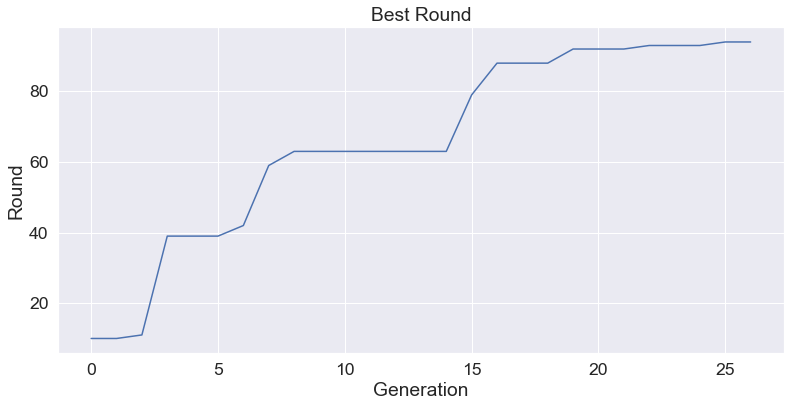

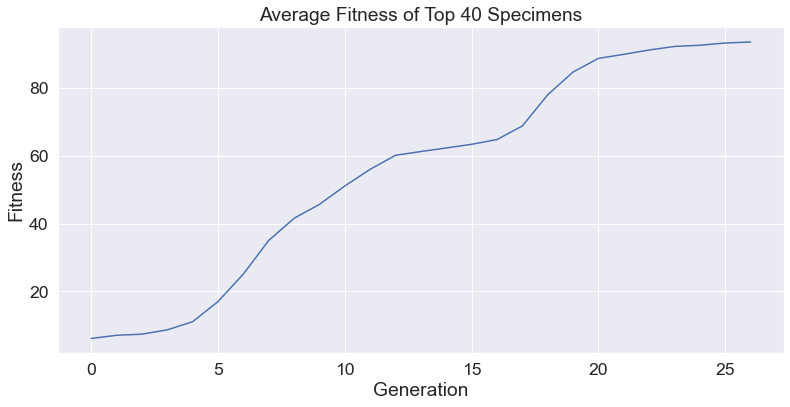

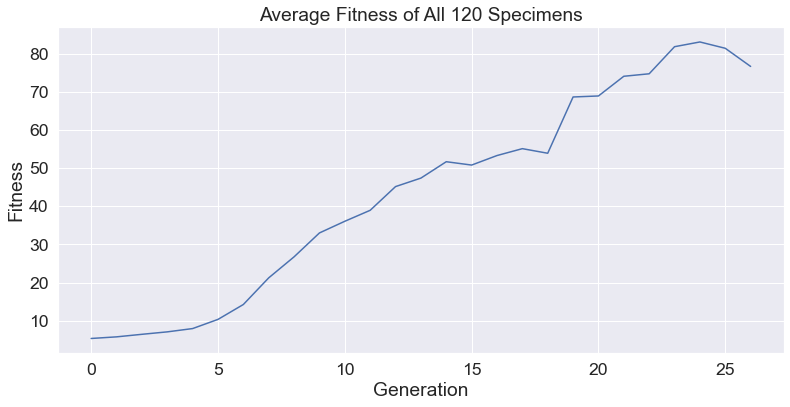

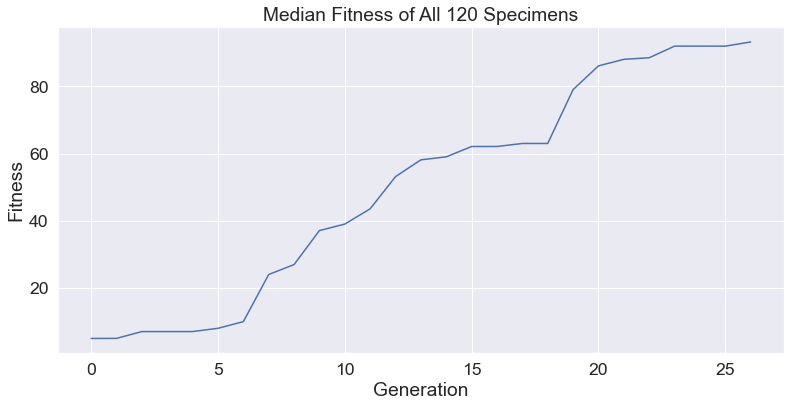

Generation  Best Round
0        0          10    
1        1          10    
2        2          11    
3        3          39    
4        4          39    
5        5          39    
6        6          42    
7        7          59    
8        8          63    
9        9          63    
10      10          63    
11      11          63    
12      12          63    
13      13          63    
14      14          63    
15      15          79    
16      16          88    
17      17          88    
18      18          88    
19      19          92    
20      20          92    
21      21          92    
22      22          93    
23      23          93    
24      24          93    
25      25          94    
26      26          94

Generation  Average Fitness of Top 40 Specimens
0        0                     6.112               
1        1                     7.052               
2        2                     7.382               
3        3                     8.654               
4        4                    11.064               
5        5                    17.004               
6        6                    25.143               
7        7                    35.056               
8        8                    41.607               
9        9                    45.712               
10      10                    51.144               
11      11                    56.067               
12      12                    60.215               
13      13                    61.323               
14      14                    62.373               
15      15                    63.453               
16      16                    64.858               
17      17                    68.872               
18      18                    78.076               
19      19                    84.804               
20      20                    88.835               
21      21                    90.024               
22      22                    91.298               
23      23                    92.357               
24      24                    92.703               
25      25                    93.366               
26      26                    93.675

Generation  Average Fitness of All Specimens
0        0                    5.372             
1        1                    5.795             
2        2                    6.463             
3        3                    7.103             
4        4                    7.967             
5        5                   10.370             
6        6                   14.273             
7        7                   21.251             
8        8                   26.760             
9        9                   33.016             
10      10                   36.073             
11      11                   38.947             
12      12                   45.157             
13      13                   47.381             
14      14                   51.672             
15      15                   50.795             
16      16                   53.289             
17      17                   55.094             
18      18                   53.891             
19      19                   68.632             
20      20                   68.895             
21      21                   74.056             
22      22                   74.707             
23      23                   81.800             
24      24                   83.041             
25      25                   81.385             
26      26                   76.632

Generation  Median Fitness of All Specimens
0        0                   5.000             
1        1                   5.032             
2        2                   7.056             
3        3                   7.061             
4        4                   7.061             
5        5                   8.029             
6        6                  10.015             
7        7                  24.043             
8        8                  27.000             
9        9                  37.121             
10      10                  39.046             
11      11                  43.597             
12      12                  53.175             
13      13                  58.170             
14      14                  59.060             
15      15                  62.130             
16      16                  62.139             
17      17                  63.040             
18      18                  63.040             
19      19                  79.065             
20      20                  86.130             
21      21                  88.080             
22      22                  88.545             
23      23                  92.006             
24      24                  92.010             
25      25                  92.010             
26      26                  93.250

In [102]:
"""Print fitness graphs"""
Print_Fitness_Graphs(generation_list, seaborn = True)

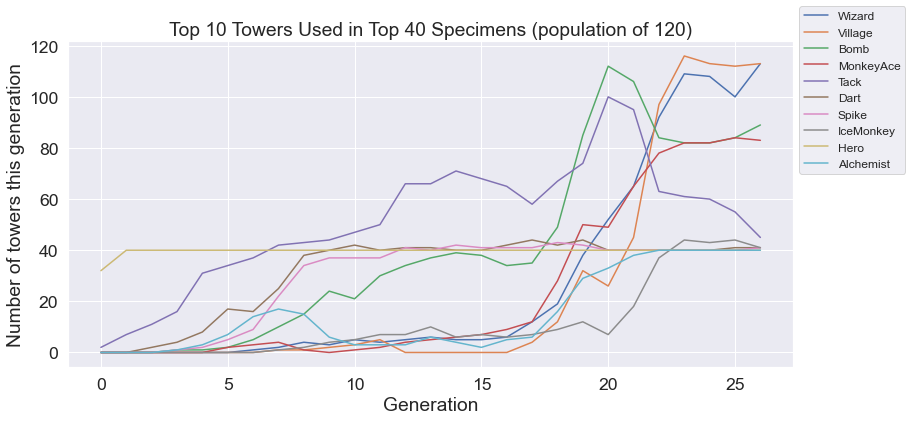

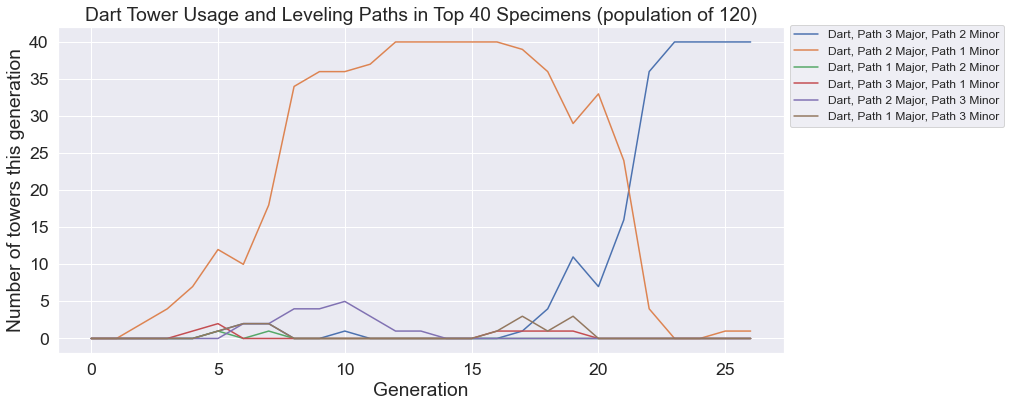

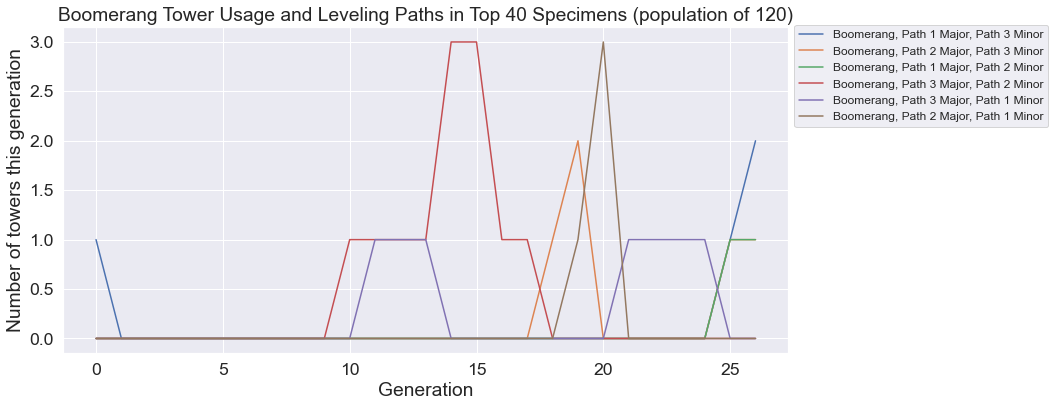

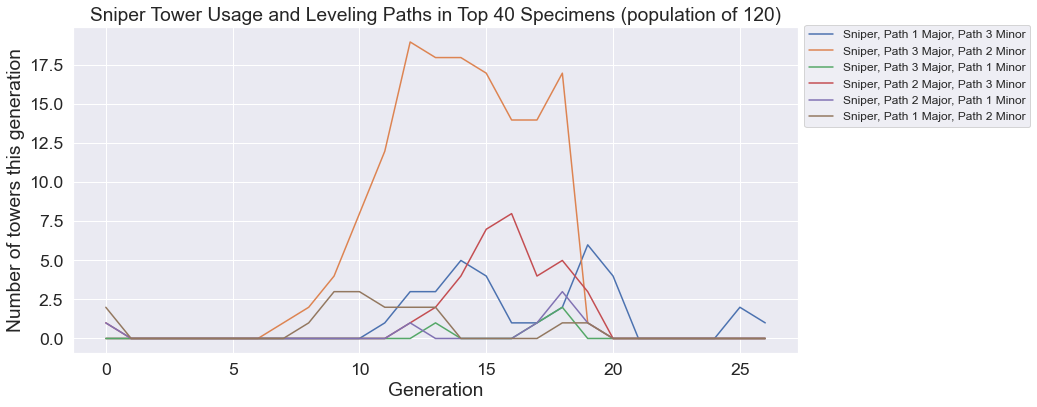

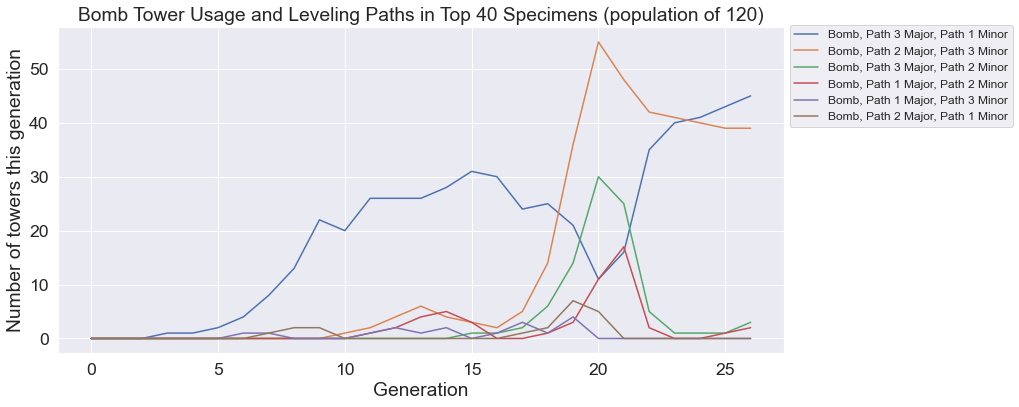

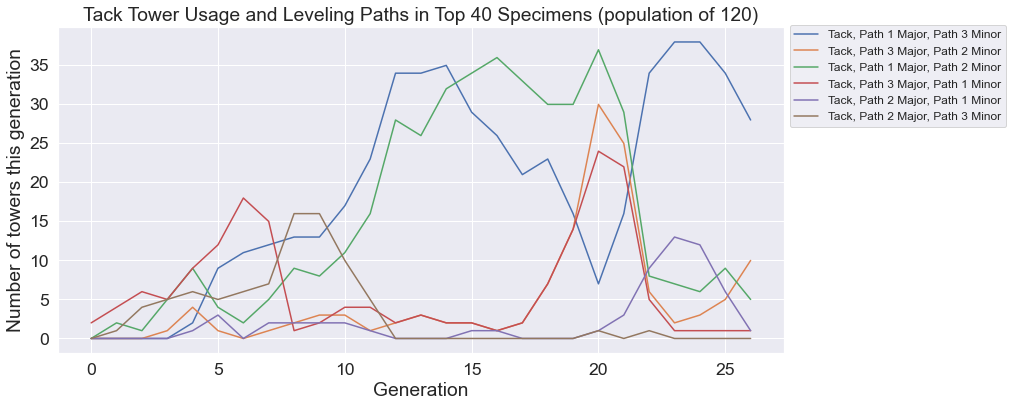

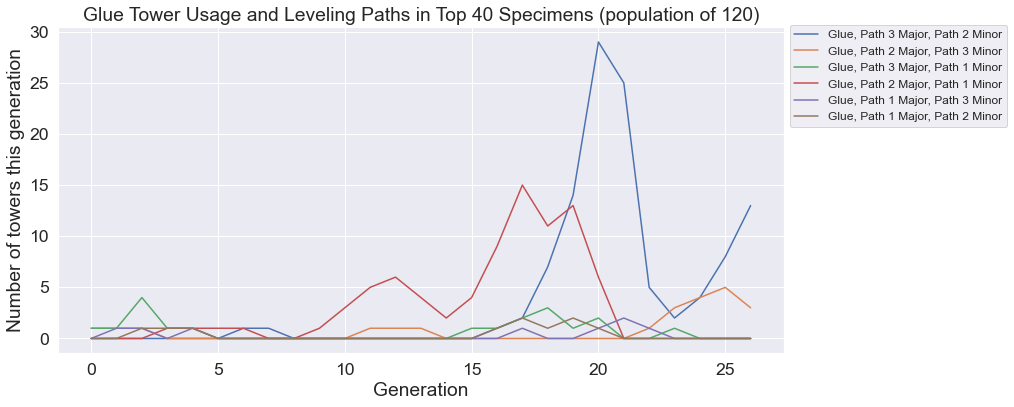

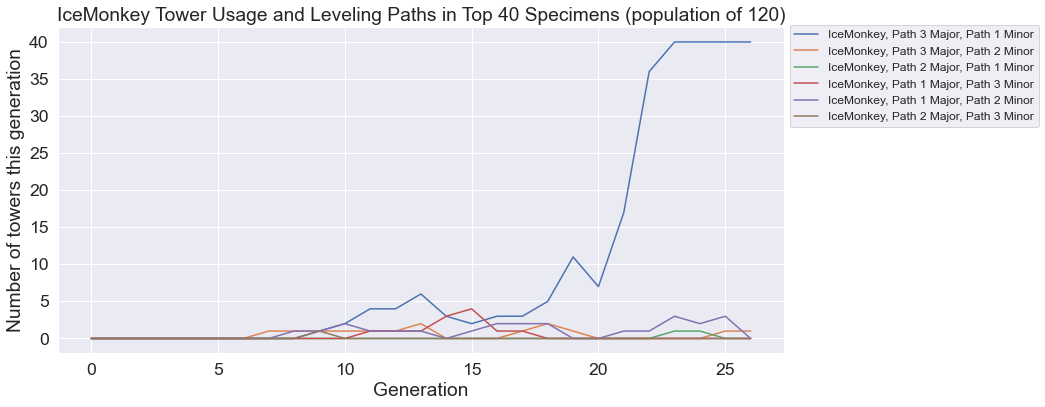

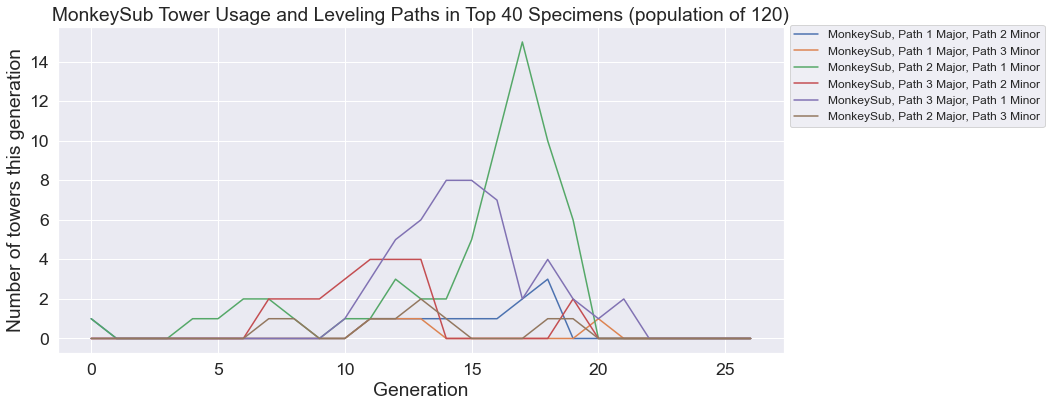

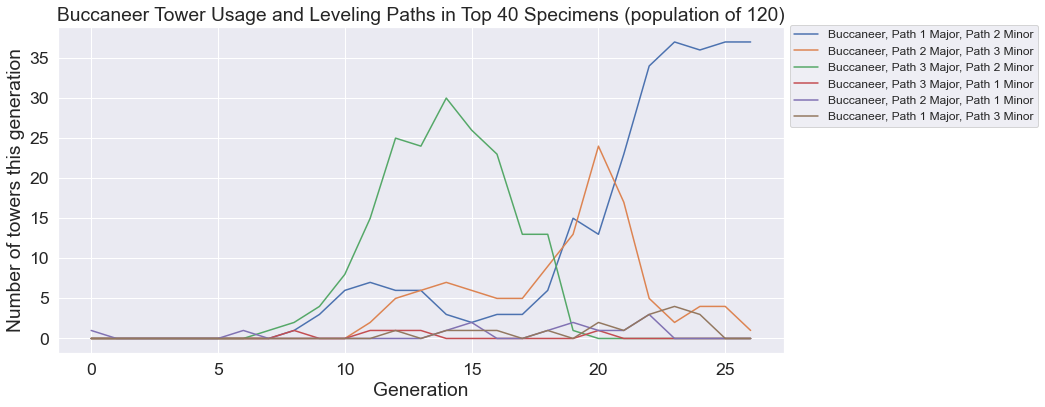

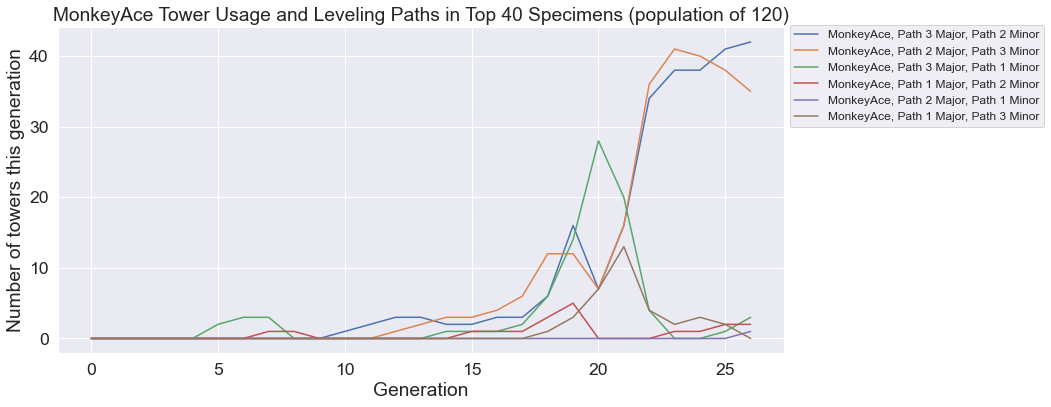

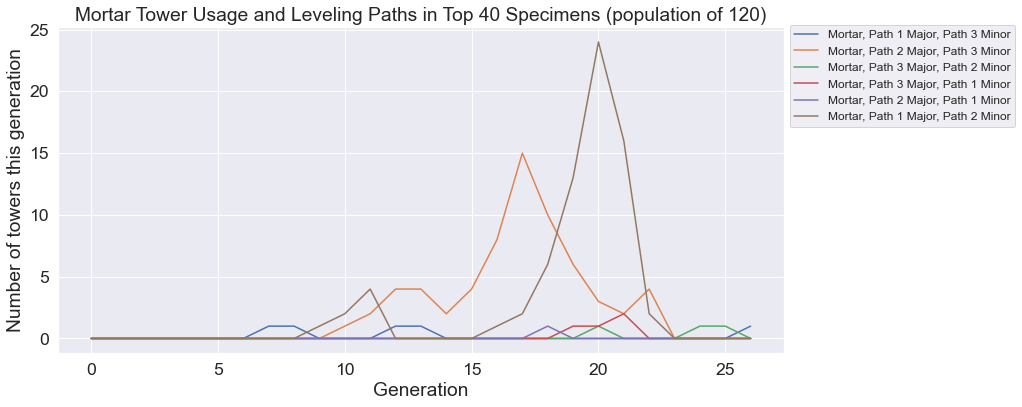

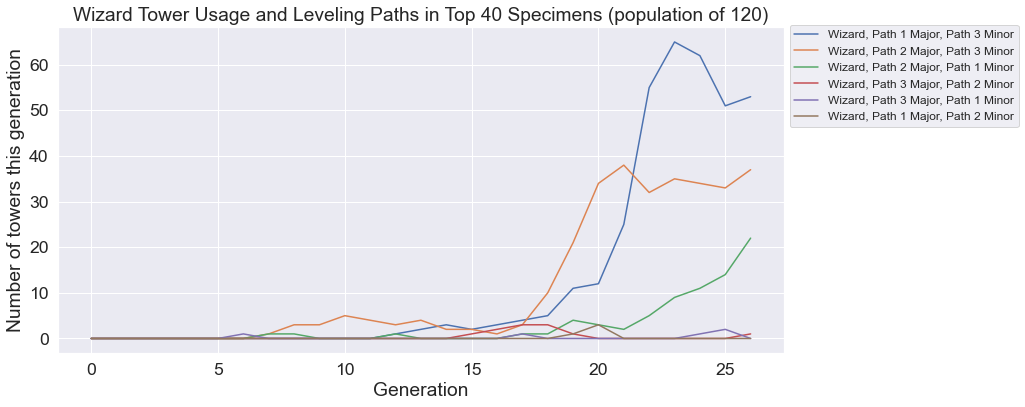

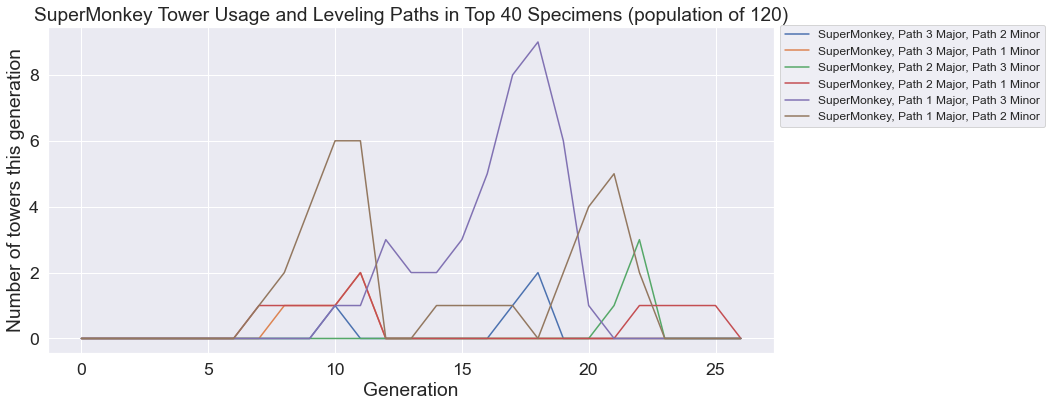

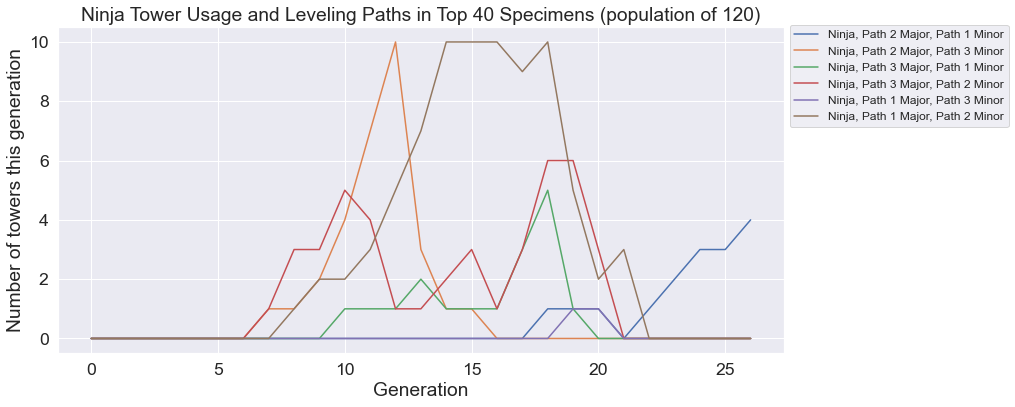

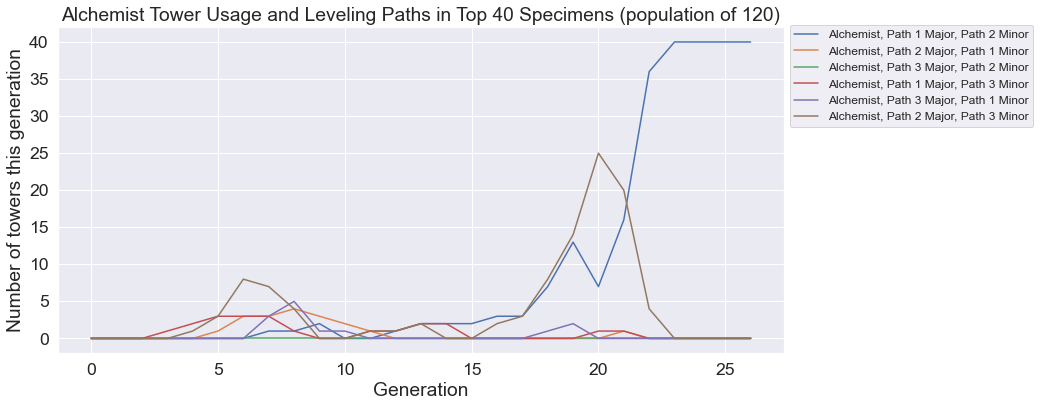

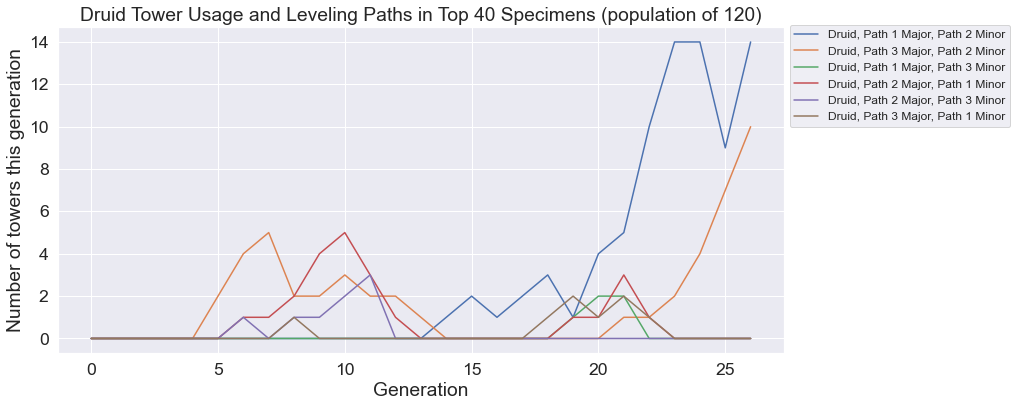

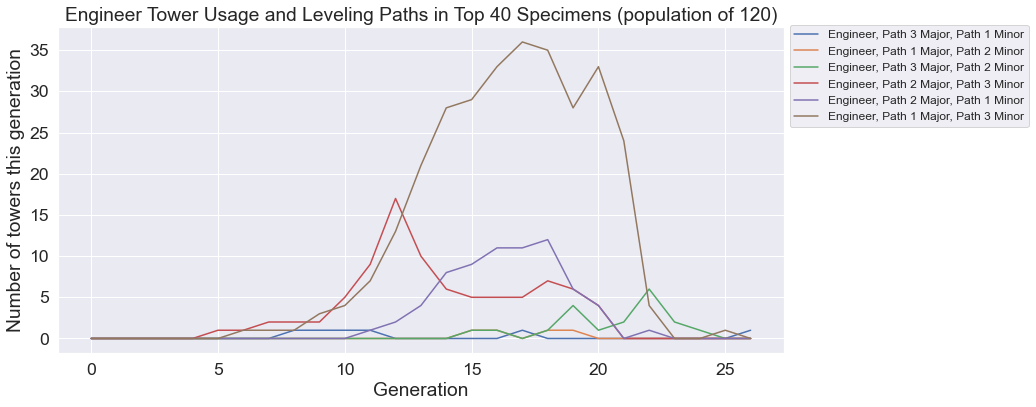

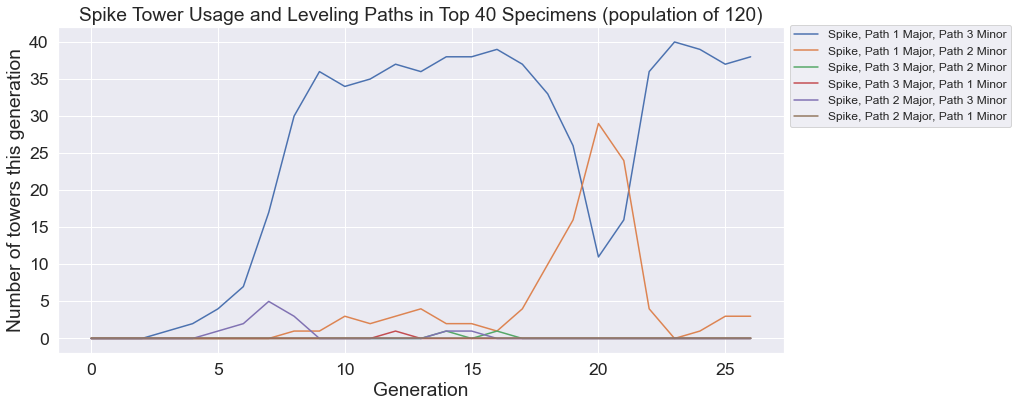

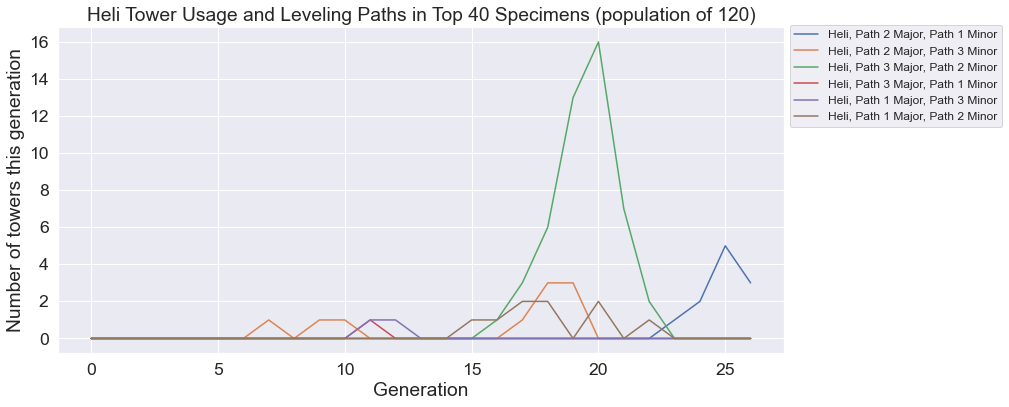

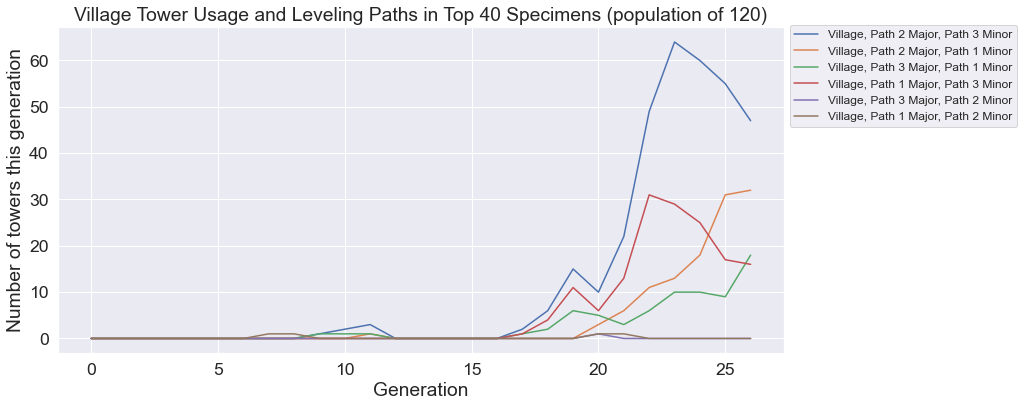

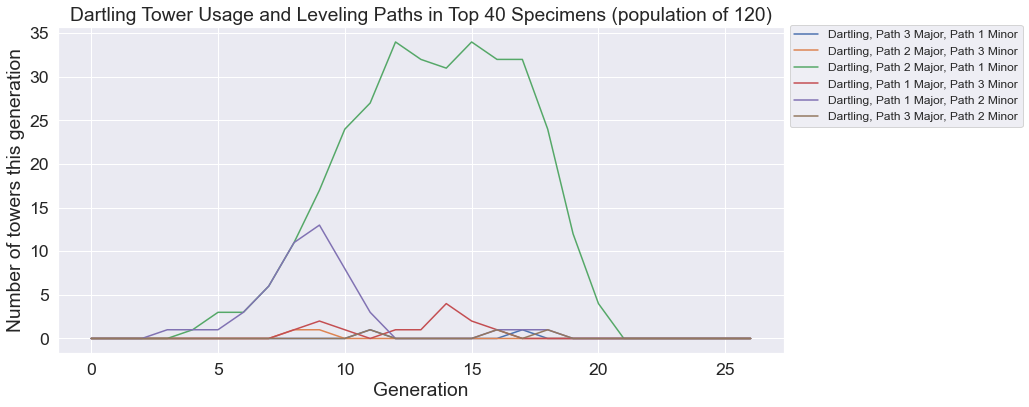

Generation    0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20   21   22  23   24   25   26   Total
Hero         32  40  40  40  40  40  40  40  40  40  40  40  40  40  40  40  40  40  40  40   40   40  40   40   40   40   40  1072 
Dart          0   0   2   4   8  17  16  25  38  40  42  40  41  41  40  40  42  44  42  44   40   40  40   40   40   41   41   848 
Boomerang     1   0   0   0   0   0   0   0   0   0   1   2   2   2   3   3   1   1   1   3    3    1   1    1    1    3    4    34 
Sniper        4   0   0   0   0   0   0   1   3   7  11  15  26  26  27  28  23  21  30  12    4    0   0    0    0    2    1   241 
Bomb          0   0   0   1   1   2   5  10  15  24  21  30  34  37  39  38  34  35  49  85  112  106  84   82   82   84   89  1099 
Tack          2   7  11  16  31  34  37  42  43  44  47  50  66  66  71  68  65  58  67  74  100   95  63   61   60   55   45  1378 
Glue          2   3   7   3   4   1   2   1   0   1   3   6   7   5   2   5  12  22  22  30   39   27   7    6    8   13   16   254 
IceMonkey     0   0   0   0   0   0   0   1   2   4   5   7   7  10   6   7   6   7   9  12    7   18  37   44   43   44   41   317 
MonkeySub     2   0   0   0   1   1   2   5   4   2   5  11  15  16  12  14  18  19  18  11    2    2   0    0    0    0    0   160 
Buccaneer     1   0   0   0   0   0   1   1   4   7  14  25  38  37  42  37  32  21  30  31   41   42  45   43   43   41   38   614 
MonkeyAce     0   0   0   0   0   2   3   4   1   0   1   2   4   5   6   7   9  12  28  50   49   65  78   82   82   84   83   657 
Mortar        0   0   0   0   0   0   0   1   1   1   3   6   5   5   2   4   9  17  17  20   29   20   6    0    1    1    1   149 
Wizard        0   0   0   0   0   0   1   2   4   3   5   4   5   6   5   5   6  12  19  38   52   65  92  109  108  100  113   754 
SuperMonkey   0   0   0   0   0   0   0   2   4   6  10  11   3   2   3   4   6  10  11   8    5    6   6    1    1    1    0   100 
Ninja         0   0   0   0   0   0   0   2   5   7  12  15  17  13  14  15  12  15  22  14    7    3   1    2    3    3    4   186 
Alchemist     0   0   0   1   3   7  14  17  15   6   3   3   3   6   4   2   5   6  16  29   33   38  40   40   40   40   40   411 
Druid         0   0   0   0   0   2   6   6   6   7  10   8   3   1   1   2   1   2   4   5    8   13  13   16   18   16   24   172 
Engineer      0   0   0   0   0   1   2   3   4   6  10  18  32  35  42  45  51  53  56  45   42   26  11    2    1    1    1   487 
Spike         0   0   0   1   2   5   9  22  34  37  37  37  41  40  42  41  41  41  43  42   40   40  40   40   40   40   41   796 
Heli          0   0   0   0   0   0   0   1   0   1   1   2   1   0   0   1   2   6  11  16   18    7   3    1    2    5    3    81 
Village       0   0   0   0   0   0   0   1   1   2   3   5   0   0   0   0   0   4  12  32   26   45  97  116  113  112  113   682 
Dartling      0   0   0   1   2   4   6  12  24  33  33  32  35  33  35  36  35  34  26  12    4    0   0    0    0    0    0   397

Generation                               0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26
Dart, Path 1 Major, Path 2 Minor          0   0   0   0   0   1   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
Dart, Path 1 Major, Path 3 Minor          0   0   0   0   0   1   2   2   0   0   0   0   0   0   0   0   1   3   1   3   0   0   0   0   0   0   0
Dart, Path 2 Major, Path 1 Minor          0   0   2   4   7  12  10  18  34  36  36  37  40  40  40  40  40  39  36  29  33  24   4   0   0   1   1
Dart, Path 2 Major, Path 3 Minor          0   0   0   0   0   0   2   2   4   4   5   3   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0
Dart, Path 3 Major, Path 1 Minor          0   0   0   0   1   2   0   0   0   0   0   0   0   0   0   0   1   1   1   1   0   0   0   0   0   0   0
Dart, Path 3 Major, Path 2 Minor          0   0   0   0   0   1   2   2   0   0   1   0   0   0   0   0   0   1   4  11   7  16  36  40  40  40  40
Boomerang, Path 1 Major, Path 2 Minor     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   1
Boomerang, Path 1 Major, Path 3 Minor     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   2
Boomerang, Path 2 Major, Path 1 Minor     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   3   0   0   0   0   0   0
Boomerang, Path 2 Major, Path 3 Minor     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   2   0   0   0   0   0   1   1
Boomerang, Path 3 Major, Path 1 Minor     0   0   0   0   0   0   0   0   0   0   0   1   1   1   0   0   0   0   0   0   0   1   1   1   1   0   0
Boomerang, Path 3 Major, Path 2 Minor     0   0   0   0   0   0   0   0   0   0   1   1   1   1   3   3   1   1   0   0   0   0   0   0   0   0   0
Sniper, Path 1 Major, Path 2 Minor        2   0   0   0   0   0   0   0   1   3   3   2   2   2   0   0   0   0   1   1   0   0   0   0   0   0   0
Sniper, Path 1 Major, Path 3 Minor        0   0   0   0   0   0   0   0   0   0   0   1   3   3   5   4   1   1   2   6   4   0   0   0   0   2   1
Sniper, Path 2 Major, Path 1 Minor        1   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   1   3   1   0   0   0   0   0   0   0
Sniper, Path 2 Major, Path 3 Minor        1   0   0   0   0   0   0   0   0   0   0   0   1   2   4   7   8   4   5   3   0   0   0   0   0   0   0
Sniper, Path 3 Major, Path 1 Minor        0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   1   2   0   0   0   0   0   0   0   0
Sniper, Path 3 Major, Path 2 Minor        0   0   0   0   0   0   0   1   2   4   8  12  19  18  18  17  14  14  17   1   0   0   0   0   0   0   0
Bomb, Path 1 Major, Path 2 Minor          0   0   0   0   0   0   0   0   0   0   0   1   2   4   5   3   0   0   1   3  11  17   2   0   0   1   2
Bomb, Path 1 Major, Path 3 Minor          0   0   0   0   0   0   1   1   0   0   0   1   2   1   2   0   1   3   1   4   0   0   0   0   0   0   0
Bomb, Path 2 Major, Path 1 Minor          0   0   0   0   0   0   0   1   2   2   0   0   0   0   0   0   0   1   2   7   5   0   0   0   0   0   0
Bomb, Path 2 Major, Path 3 Minor          0   0   0   0   0   0   0   0   0   0   1   2   4   6   4   3   2   5  14  36  55  48  42  41  40  39  39
Bomb, Path 3 Major, Path 1 Minor          0   0   0   1   1   2   4   8  13  22  20  26  26  26  28  31  30  24  25  21  11  16  35  40  41  43  45
Bomb, Path 3 Major, Path 2 Minor          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   2   6  14  30  25   5   1   1   1   3
Tack, Path 1 Major, Path 2 Minor          0   2   1   5   9   4   2   5   9   8  11  16  28  26  32  34  36  33  30  30  37  29   8   7   6   9   5
Tack, Path 1 Major, Path 3 Minor          0   0   0   0   2   9  11  12  13  13  17  23  34  34  35  29  26  21  23  16   7  16  34  38  38  34  28
Tack

In [101]:
"""
Print a summary for the towers
"""

Print_Tower_Summary(generation_list, amt_general = 10, upper_third = True, cut_factor = 3, display_table = True, seaborn = True)

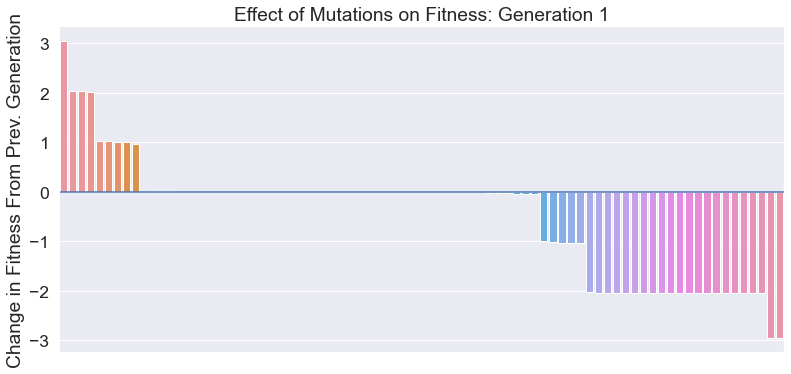

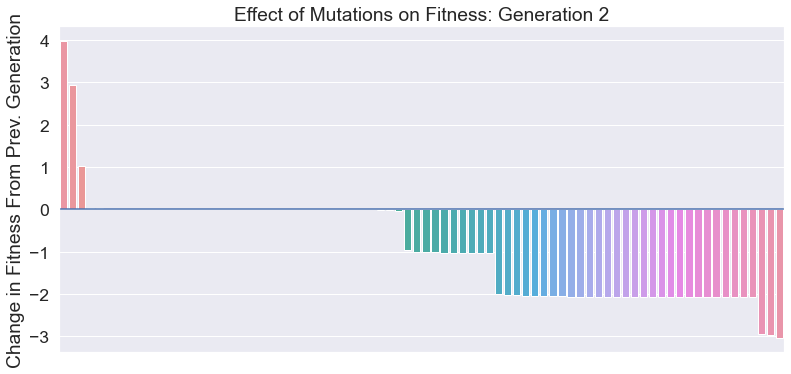

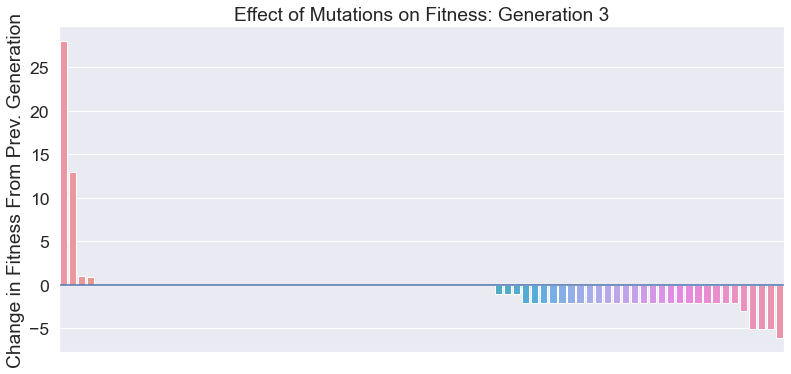

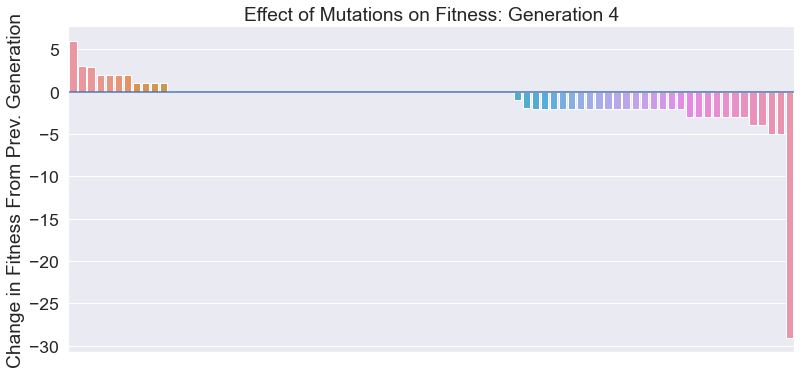

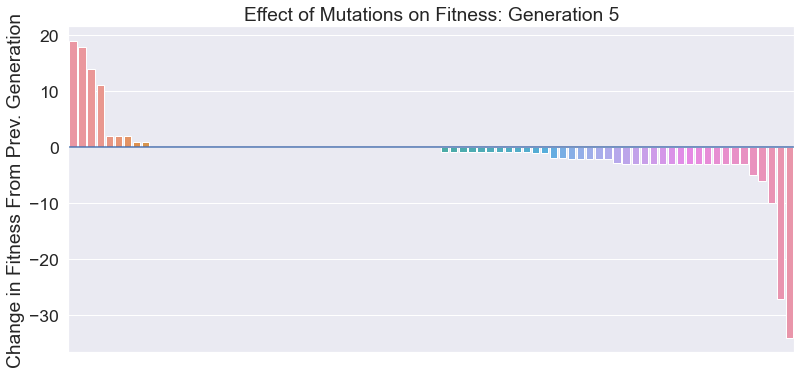

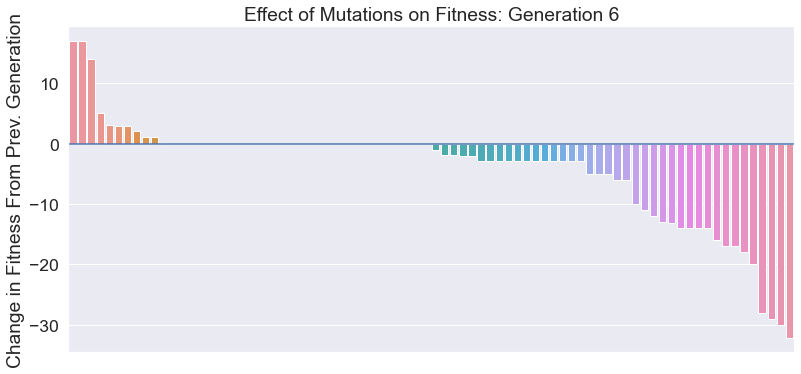

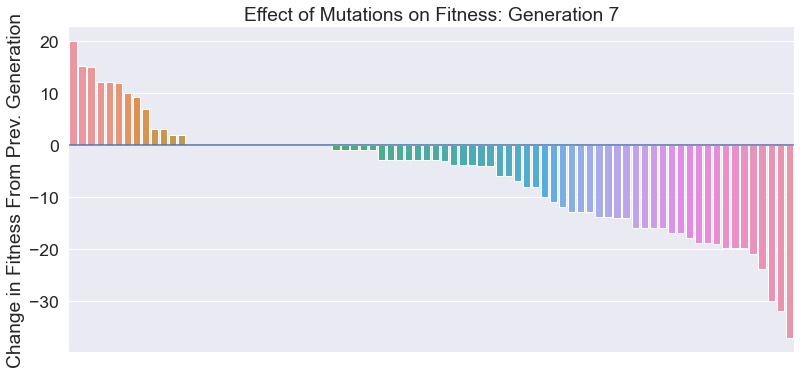

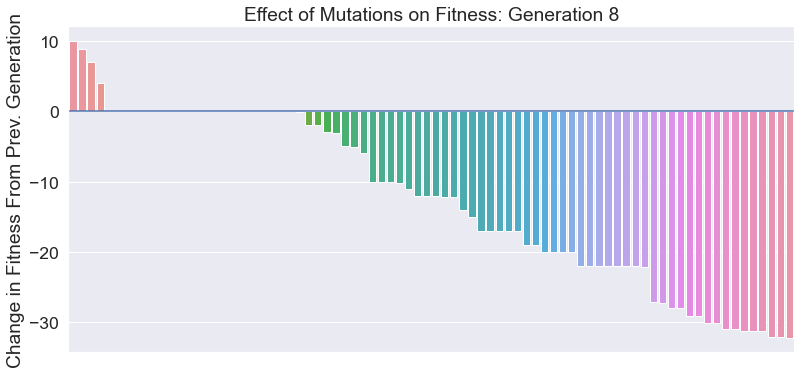

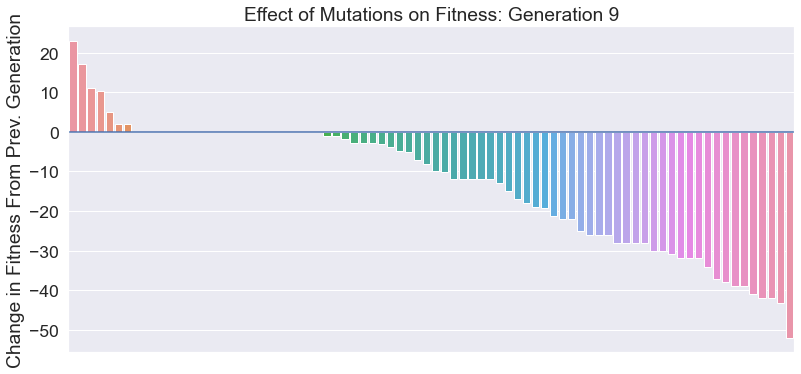

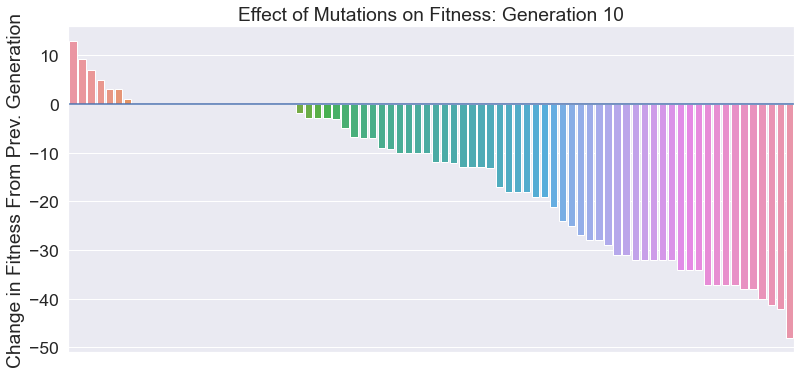

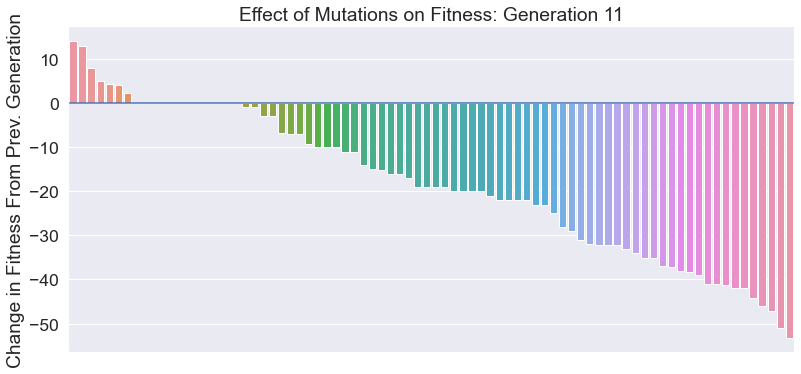

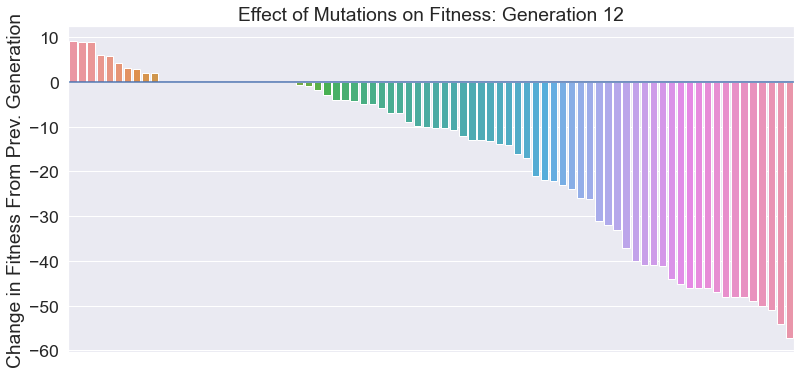

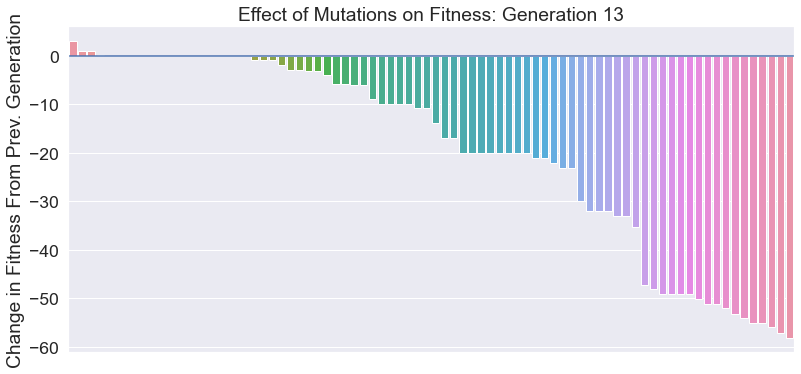

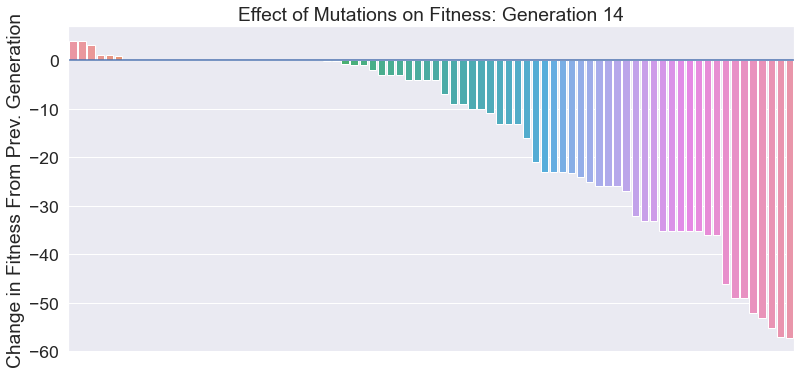

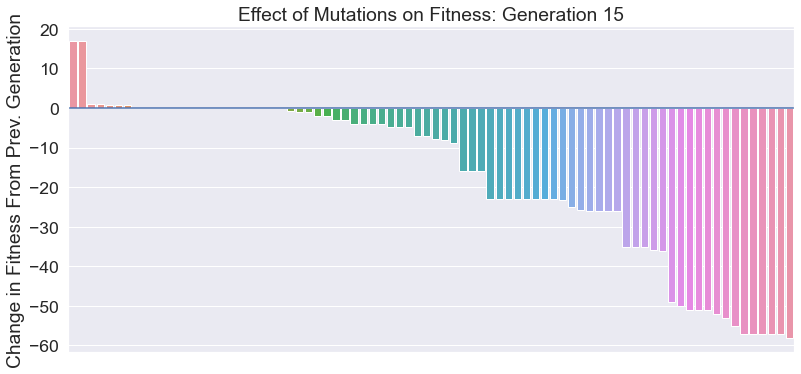

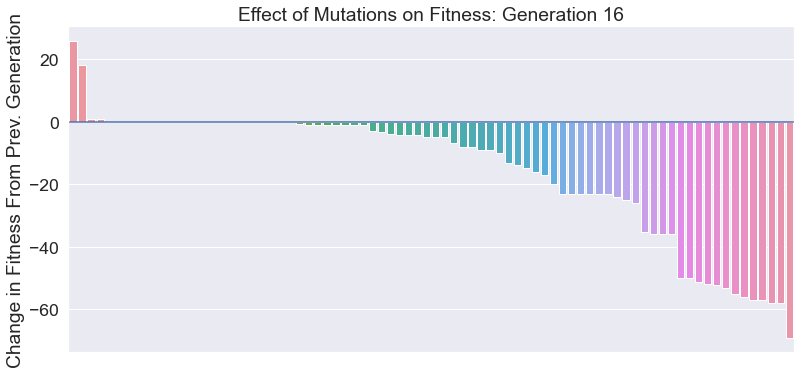

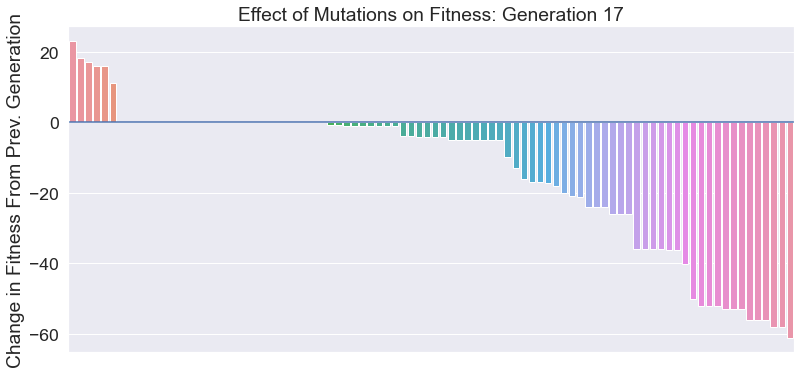

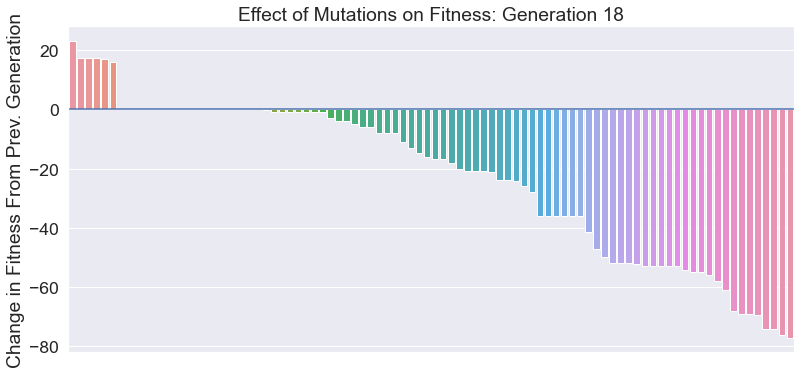

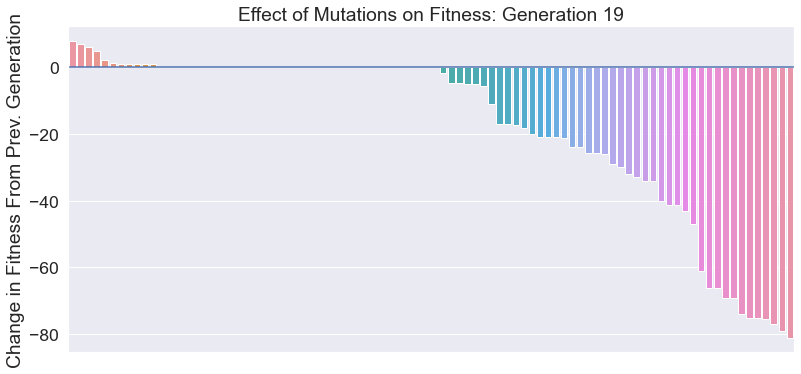

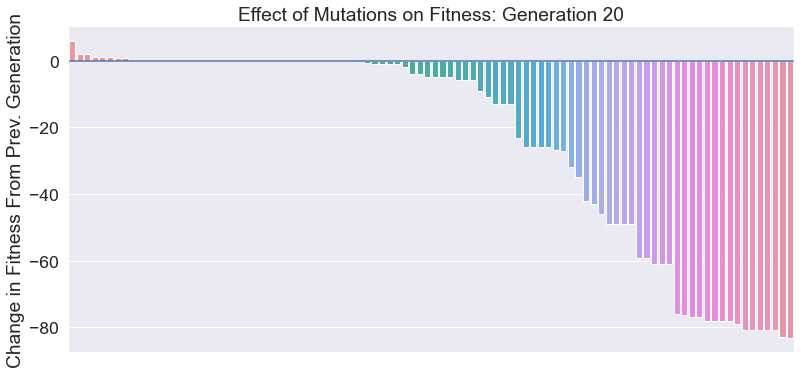

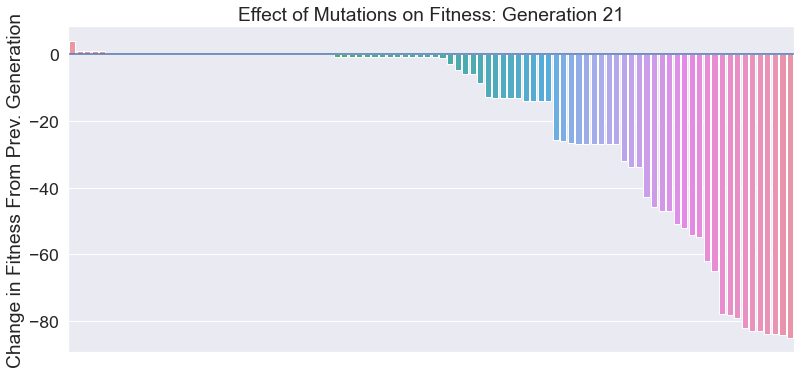

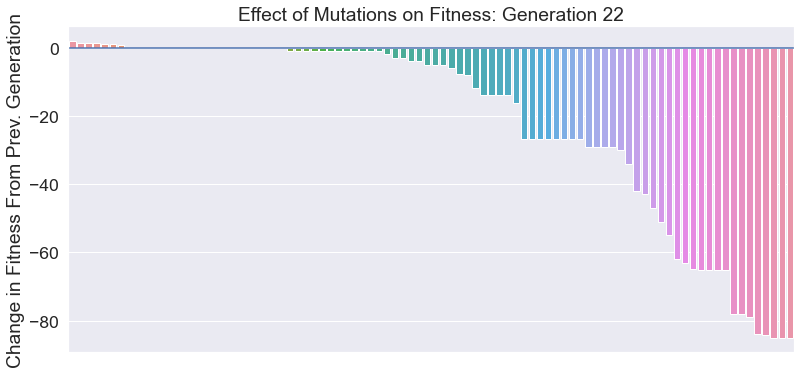

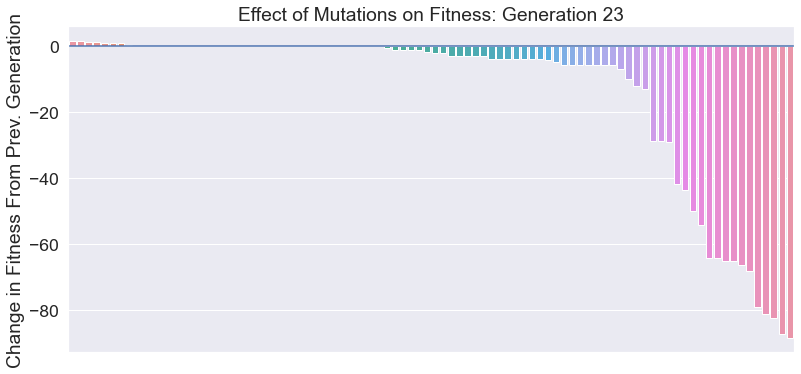

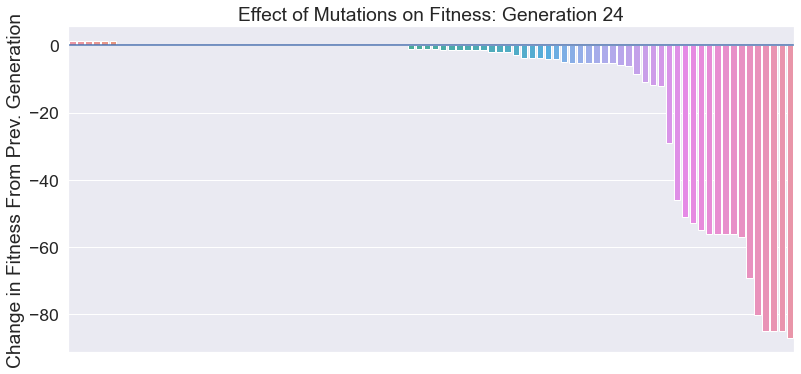

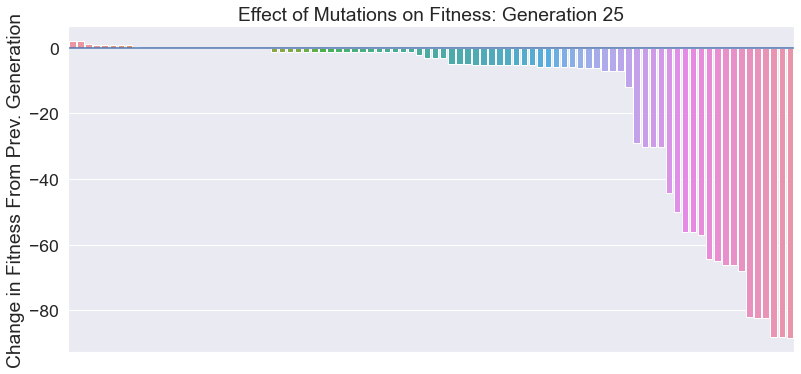

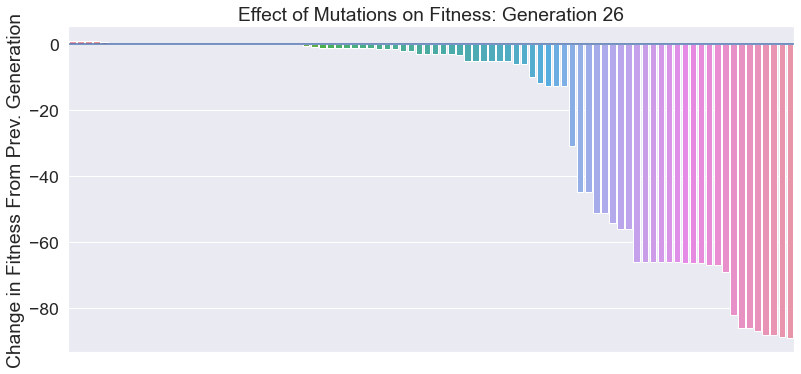

In [103]:
"""Print the mutation list, with graphs"""
Print_Mutation_List(generation_list, print_tables = False, seaborn = True)

In [96]:
"""Print the mutation table, without graphs"""
Print_Mutation_List(generation_list, print_tables = True)

Generation                             Mutation                             Old Fitness  New Fitness  Change in Fitness
0        1                                   Recombination, Swap upgrade paths      5.02        8.06            3.04       
1        1                                   Recombination, Swap upgrade paths      5.02        7.06            2.04       
2        1          Recombination, Swap upgrade paths, Changed target priority      5.03        7.06            2.03       
3        1                                              Reset tower placements      5.04        7.06            2.02       
4        1                                              Reset tower placements      6.03        7.06            1.03       
5        1        Recombination, Accelerated upgrades, Changed target priority      5.01        6.03            1.02       
6        1                                   Recombination, Swap upgrade paths      5.02        6.03            1.01       
7        1               Recombination, Remove towers, Changed target priority      5.02        6.03            1.01       
8        1                                                Accelerated upgrades      7.06        8.03            0.97       
9        1                                     Recombination, Delayed upgrades      7.03        7.06            0.02       
10       1                                              Reset tower placements      5.02        5.02            0.01       
11       1                       Accelerated upgrades, Changed target priority      5.01        5.02            0.01       
12       1                         Swap upgrade paths, Changed target priority      5.04        5.05            0.01       
13       1                                              Reset tower placements      5.01        5.01            0.00       
14       1                                 Recombination, Accelerated upgrades      5.04        5.04            0.00       
15       1                                    Recombination, Insert new towers      5.04        5.04            0.00       
16       1                                 Recombination, Accelerated upgrades      5.03        5.03            0.00       
17       1                                 Recombination, Accelerated upgrades      5.02        5.01           -0.00       
18       1      Recombination, Reset tower placements, Changed target priority      5.01        5.01            0.00       
19       1                                                    Delayed upgrades      5.02        5.02            0.00       
20       1                                   Recombination, Swap upgrade paths      5.01        5.01            0.00       
21       1                                                Accelerated upgrades      5.01        5.01            0.00       
22       1                                                   Insert new towers      5.01        5.01            0.00       
23       1                                    Recombination, Insert new towers      5.02        5.02            0.00       
24       1                                                  Swap upgrade paths      6.03        6.03            0.00       
25       1                                 Recombination, Accelerated upgrades      6.03        6.03           -0.00       
26       1                                                  Swap upgrade paths      6.03        6.03            0.00       
27       1                                                   Insert new towers      6.03        6.03            0.00       
28       1                                                   Insert new towers      7.06        7.06            0.00       
29       1                               Recombination, Reset tower placements      7.06        7.06            0.00       
30       1            Recombination, Delayed upgrades, Changed target priority      7.06        7.06            0.00       
31       1            Recombination,

Generation                             Mutation                             Old Fitness  New Fitness  Change in Fitness
0        2                                                  Swap upgrade paths      7.06        11.04           3.98       
1        2                                                  Swap upgrade paths      7.06        10.02           2.95       
2        2                                 Recombination, Accelerated upgrades      6.03         7.06           1.03       
3        2      Recombination, Reset tower placements, Changed target priority      7.03         7.06           0.03       
4        2                                   Recombination, Swap upgrade paths      7.03         7.06           0.03       
5        2                       Accelerated upgrades, Changed target priority      7.03         7.05           0.02       
6        2                                   Recombination, Swap upgrade paths      7.03         7.06           0.02       
7        2                                                  Swap upgrade paths      7.06         7.07           0.01       
8        2            Recombination, Delayed upgrades, Changed target priority      7.06         7.06          -0.00       
9        2                                                       Remove towers      7.06         7.06           0.00       
10       2                                    Recombination, Insert new towers      7.06         7.06           0.00       
11       2                                     Recombination, Delayed upgrades      7.06         7.06           0.00       
12       2                                   Recombination, Swap upgrade paths      7.06         7.06          -0.00       
13       2                                                    Delayed upgrades      7.06         7.06           0.00       
14       2                                   Recombination, Swap upgrade paths      7.06         7.06           0.00       
15       2                                                Accelerated upgrades      7.06         7.06           0.00       
16       2                                                   Insert new towers      7.06         7.06           0.00       
17       2        Recombination, Accelerated upgrades, Changed target priority      7.06         7.05          -0.00       
18       2                                                  Swap upgrade paths      7.03         7.03           0.00       
19       2                                                  Swap upgrade paths      6.03         6.03           0.00       
20       2                                                   Insert new towers      7.06         7.06           0.00       
21       2                                                   Insert new towers      6.04         6.03          -0.00       
22       2                                                   Insert new towers      7.06         7.06           0.00       
23       2          Recombination, Swap upgrade paths, Changed target priority      7.06         7.06           0.00       
24       2                                                Accelerated upgrades      8.06         8.06           0.00       
25       2                                   Recombination, Swap upgrade paths      7.06         7.06           0.00       
26       2                          Insert new towers, Changed target priority      7.06         7.06           0.00       
27       2                                                Accelerated upgrades      7.06         7.06           0.00       
28       2                                   Recombination, Swap upgrade paths      7.06         7.06           0.00       
29       2                       Accelerated upgrades, Changed target priority      7.06         7.06           0.00       
30       2                                    Recombination, Insert new towers      7.06         7.06           0.00       
31       2                       Acc

Generation                           Mutation                           Old Fitness  New Fitness  Change in Fitness
0        3                           Recombination, Reset tower placements     11.04        39.05           28.01      
1        3                                              Swap upgrade paths      8.06        21.04           12.98      
2        3       Recombination, Insert new towers, Changed target priority      7.06         8.04            0.99      
3        3                             Recombination, Accelerated upgrades      7.06         8.03            0.97      
4        3        Recombination, Delayed upgrades, Changed target priority      7.06         7.07            0.01      
5        3                               Recombination, Swap upgrade paths      7.06         7.07            0.01      
6        3                                            Accelerated upgrades      7.06         7.06           -0.00      
7        3                                            Accelerated upgrades      7.06         7.06            0.00      
8        3                      Insert new towers, Changed target priority      7.06         7.06            0.00      
9        3                                                Delayed upgrades      7.06         7.06            0.00      
10       3                                              Swap upgrade paths      7.06         7.06            0.00      
11       3                      Insert new towers, Changed target priority      7.06         7.06            0.00      
12       3                      Insert new towers, Changed target priority      7.06         7.06            0.00      
13       3       Recombination, Insert new towers, Changed target priority      7.06         7.06            0.00      
14       3      Recombination, Swap upgrade paths, Changed target priority      7.06         7.06            0.00      
15       3                           Recombination, Reset tower placements      7.06         7.06           -0.00      
16       3                             Recombination, Accelerated upgrades      7.06         7.06            0.00      
17       3                                          Reset tower placements      7.06         7.06            0.00      
18       3                 Reset tower placements, Changed target priority      7.06         7.06            0.00      
19       3                                              Swap upgrade paths      7.06         7.06            0.00      
20       3                                               Insert new towers      7.06         7.06            0.00      
21       3                      Insert new towers, Changed target priority      7.06         7.06            0.00      
22       3                               Recombination, Swap upgrade paths      7.06         7.06            0.00      
23       3                                               Insert new towers      7.06         7.06            0.00      
24       3                                                   Remove towers      7.06         7.06           -0.00      
25       3                     Swap upgrade paths, Changed target priority      7.06         7.06           -0.00      
26       3                                              Swap upgrade paths      7.06         7.06            0.00      
27       3                                              Swap upgrade paths      7.06         7.06           -0.00      
28       3                                              Swap upgrade paths      7.06         7.06            0.00      
29       3                                              Swap upgrade paths      7.06         7.06            0.00      
30       3                                 Recombination, Delayed upgrades      7.06         7.06            0.00      
31       3                                               Insert new towers      8.03         8.03            0.00      
32       3                                  

Generation                             Mutation                             Old Fitness  New Fitness  Change in Fitness
0        4                               Recombination, Reset tower placements     21.04        27.00            5.96      
1        4                                                       Remove towers     21.04        24.04            3.00      
2        4                                   Recombination, Swap upgrade paths      7.06        10.01            2.95      
3        4                                     Recombination, Delayed upgrades      8.03        10.02            1.99      
4        4                                   Recombination, Swap upgrade paths      8.03        10.02            1.98      
5        4                         Swap upgrade paths, Changed target priority      8.03        10.02            1.98      
6        4                         Swap upgrade paths, Changed target priority      8.06        10.02            1.96      
7        4                                              Reset tower placements      7.07         8.03            0.96      
8        4                                   Recombination, Swap upgrade paths      7.06         8.03            0.96      
9        4                                     Recombination, Delayed upgrades      7.07         8.03            0.96      
10       4        Recombination, Accelerated upgrades, Changed target priority      7.07         8.03            0.96      
11       4                                 Recombination, Accelerated upgrades      8.03         8.03            0.01      
12       4          Recombination, Swap upgrade paths, Changed target priority      7.06         7.06            0.00      
13       4                                                   Insert new towers      7.06         7.06            0.00      
14       4                                                   Insert new towers      7.06         7.06            0.00      
15       4                                                  Swap upgrade paths      7.06         7.06            0.00      
16       4                                     Recombination, Delayed upgrades      7.06         7.06            0.00      
17       4                                   Recombination, Swap upgrade paths      7.06         7.06           -0.00      
18       4                                   Recombination, Swap upgrade paths      7.06         7.06           -0.00      
19       4                                 Recombination, Accelerated upgrades      7.06         7.06            0.00      
20       4            Recombination, Delayed upgrades, Changed target priority      7.06         7.06            0.00      
21       4                         Swap upgrade paths, Changed target priority      7.06         7.06            0.00      
22       4                                    Recombination, Insert new towers      7.06         7.06           -0.00      
23       4            Recombination, Delayed upgrades, Changed target priority      7.06         7.06            0.00      
24       4                                                Accelerated upgrades      7.06         7.06            0.00      
25       4          Recombination, Swap upgrade paths, Changed target priority      7.06         7.06            0.00      
26       4                                                  Swap upgrade paths      7.06         7.06            0.00      
27       4        Recombination, Accelerated upgrades, Changed target priority      7.06         7.06            0.00      
28       4                         Swap upgrade paths, Changed target priority      7.06         7.06            0.00      
29       4                                 Recombination, Accelerated upgrades      7.06         7.06           -0.00      
30       4                                                Accelerated upgrades      7.06         7.06            0.00      
31       4                          

Generation                             Mutation                             Old Fitness  New Fitness  Change in Fitness
0        5                         Swap upgrade paths, Changed target priority      8.06        27.00           18.94      
1        5                                                  Swap upgrade paths     21.04        39.00           17.96      
2        5                                   Recombination, Swap upgrade paths     10.02        24.04           14.03      
3        5                                        Recombination, Remove towers     24.04        35.05           11.00      
4        5                                   Recombination, Swap upgrade paths      8.03        10.01            1.99      
5        5                                   Recombination, Swap upgrade paths      8.03        10.01            1.98      
6        5                               Recombination, Reset tower placements      8.06        10.01            1.96      
7        5                                        Recombination, Remove towers      7.07         8.04            0.97      
8        5      Recombination, Reset tower placements, Changed target priority      7.07         8.02            0.95      
9        5                                                Accelerated upgrades      8.03         8.06            0.02      
10       5                                 Recombination, Accelerated upgrades      8.04         8.04            0.01      
11       5                               Recombination, Reset tower placements     10.01        10.02            0.01      
12       5                                                Accelerated upgrades      8.04         8.04            0.00      
13       5                                                Accelerated upgrades      8.03         8.03            0.00      
14       5                                                  Swap upgrade paths      8.03         8.03            0.00      
15       5                                                Accelerated upgrades      8.03         8.03            0.00      
16       5                                                  Swap upgrade paths     39.05        39.05            0.00      
17       5        Recombination, Accelerated upgrades, Changed target priority      8.06         8.05           -0.00      
18       5                                                  Swap upgrade paths      8.03         8.03            0.00      
19       5                                                Accelerated upgrades      8.03         8.03            0.00      
20       5                                                  Swap upgrade paths      7.07         7.07            0.00      
21       5                                                Accelerated upgrades      7.07         7.07            0.00      
22       5                                                Accelerated upgrades      7.07         7.07            0.00      
23       5                                   Recombination, Swap upgrade paths      8.03         8.03            0.00      
24       5        Recombination, Accelerated upgrades, Changed target priority      8.03         8.04            0.00      
25       5                                                  Swap upgrade paths     10.02        10.02            0.00      
26       5                                                Accelerated upgrades     10.01        10.01            0.00      
27       5                                              Reset tower placements     37.15        37.15            0.00      
28       5                                 Recombination, Accelerated upgrades     24.04        24.04            0.00      
29       5                                                Accelerated upgrades     10.02        10.02            0.00      
30       5                                                  Swap upgrade paths     10.02        10.02            0.00      
31       5                          

Generation                            Mutation                            Old Fitness  New Fitness  Change in Fitness
0        6      Recombination, Accelerated upgrades, Changed target priority     10.01        27.01           17.00      
1        6                                            Reset tower placements     10.02        27.00           16.98      
2        6        Recombination, Swap upgrade paths, Changed target priority     10.02        24.04           14.03      
3        6                                 Recombination, Swap upgrade paths      8.06        13.05            5.00      
4        6                                            Reset tower placements     39.05        42.13            3.08      
5        6                        Insert new towers, Changed target priority     24.04        27.02            2.97      
6        6                                                Swap upgrade paths     24.04        27.01            2.97      
7        6                                 Recombination, Swap upgrade paths     11.04        13.05            2.02      
8        6                                   Recombination, Delayed upgrades     10.02        11.04            1.02      
9        6                   Reset tower placements, Changed target priority     10.01        11.04            1.02      
10       6                               Recombination, Accelerated upgrades     35.05        35.07            0.02      
11       6                                      Recombination, Remove towers     10.01        10.02            0.01      
12       6                                      Recombination, Remove towers     10.00        10.02            0.01      
13       6                                                Swap upgrade paths     10.01        10.02            0.01      
14       6                       Swap upgrade paths, Changed target priority     10.01        10.01            0.01      
15       6                                                Swap upgrade paths     10.01        10.01            0.00      
16       6                                                Swap upgrade paths     10.01        10.01            0.00      
17       6                               Recombination, Accelerated upgrades     10.02        10.02            0.00      
18       6                                              Accelerated upgrades     10.02        10.02            0.00      
19       6                                              Accelerated upgrades     10.02        10.02            0.00      
20       6                                                Swap upgrade paths     10.02        10.02            0.00      
21       6                               Recombination, Accelerated upgrades     10.02        10.02            0.00      
22       6                     Accelerated upgrades, Changed target priority     39.05        39.05           -0.00      
23       6                                              Accelerated upgrades     10.02        10.02            0.00      
24       6                                      Recombination, Remove towers     27.00        27.00            0.00      
25       6                                            Reset tower placements     27.00        27.00            0.00      
26       6                                                 Insert new towers     11.04        11.04            0.00      
27       6                             Recombination, Reset tower placements     10.01        10.01           -0.00      
28       6                       Swap upgrade paths, Changed target priority     10.01        10.01            0.00      
29       6                                              Accelerated upgrades     10.01        10.01            0.00      
30       6                                                Swap upgrade paths     10.01        10.01            0.00      
31       6                                              Accelerated upgrades     10.00        10.00 

Generation                             Mutation                             Old Fitness  New Fitness  Change in Fitness
0        7                                    Recombination, Insert new towers     39.05        59.05           20.00      
1        7                                 Recombination, Accelerated upgrades     21.04        36.17           15.13      
2        7          Recombination, Swap upgrade paths, Changed target priority     24.04        39.03           14.98      
3        7                                    Recombination, Insert new towers     24.04        36.17           12.13      
4        7                                                       Remove towers     24.04        36.17           12.13      
5        7                                    Recombination, Insert new towers     37.15        49.05           11.90      
6        7                              Remove towers, Changed target priority     39.05        49.05           10.01      
7        7        Recombination, Accelerated upgrades, Changed target priority     39.05        48.27            9.22      
8        7                                 Recombination, Accelerated upgrades     42.13        49.05            6.92      
9        7                                                Accelerated upgrades     24.04        27.00            2.96      
10       7      Recombination, Reset tower placements, Changed target priority     24.04        27.00            2.96      
11       7          Recombination, Swap upgrade paths, Changed target priority     37.15        39.05            1.90      
12       7                                   Recombination, Swap upgrade paths     37.15        39.02            1.87      
13       7                                                Accelerated upgrades     24.04        24.04            0.00      
14       7                                 Recombination, Accelerated upgrades     27.00        27.00            0.00      
15       7        Recombination, Accelerated upgrades, Changed target priority     27.00        27.00            0.00      
16       7                                                Accelerated upgrades     24.04        24.04            0.00      
17       7                                                   Insert new towers     21.03        21.03           -0.00      
18       7                               Recombination, Reset tower placements     24.04        24.04            0.00      
19       7                          Insert new towers, Changed target priority     11.04        11.04            0.00      
20       7                           Delayed upgrades, Changed target priority     27.00        27.00            0.00      
21       7                               Recombination, Reset tower placements     27.00        27.00            0.00      
22       7                               Recombination, Reset tower placements     13.05        13.05            0.00      
23       7                           Delayed upgrades, Changed target priority     27.00        27.00            0.00      
24       7                               Recombination, Reset tower placements     27.00        27.00            0.00      
25       7                                                       Remove towers     27.00        27.00            0.00      
26       7                                                Accelerated upgrades     27.00        27.00            0.00      
27       7                                        Recombination, Remove towers     39.05        39.05           -0.00      
28       7                                    Recombination, Insert new towers     37.12        37.11           -0.01      
29       7                       Accelerated upgrades, Changed target priority     35.07        34.15           -0.92      
30       7                         Swap upgrade paths, Changed target priority     11.04        10.02           -1.01      
31       7                       Acc

Generation                             Mutation                             Old Fitness  New Fitness  Change in Fitness
0        8           Recombination, Insert new towers, Changed target priority     39.05        49.04           10.00      
1        8                                   Recombination, Swap upgrade paths     37.15        46.08            8.93      
2        8                                        Recombination, Remove towers     27.02        34.09            7.06      
3        8                                                  Swap upgrade paths     59.05        63.04            3.99      
4        8                       Accelerated upgrades, Changed target priority     39.02        39.03            0.01      
5        8                               Recombination, Reset tower placements     27.01        27.02            0.01      
6        8                                    Recombination, Insert new towers     36.17        36.17            0.00      
7        8                                 Recombination, Accelerated upgrades     27.00        27.00            0.00      
8        8                                                   Insert new towers     49.05        49.06            0.00      
9        8          Recombination, Swap upgrade paths, Changed target priority     27.00        27.00            0.00      
10       8                                                Accelerated upgrades     27.00        27.00            0.00      
11       8                                    Recombination, Insert new towers     27.00        27.00            0.00      
12       8                                     Recombination, Delayed upgrades     27.00        27.00            0.00      
13       8                                                       Remove towers     27.00        27.00            0.00      
14       8                                    Recombination, Insert new towers     27.00        27.00            0.00      
15       8                                                    Delayed upgrades     27.00        27.00            0.00      
16       8                          Insert new towers, Changed target priority     37.11        37.11           -0.00      
17       8                                                   Insert new towers     37.12        37.12            0.00      
18       8                               Recombination, Reset tower placements     27.00        27.00            0.00      
19       8                         Swap upgrade paths, Changed target priority     39.00        39.01            0.00      
20       8                                                Accelerated upgrades     48.27        48.27            0.00      
21       8                                   Recombination, Swap upgrade paths     42.13        42.13           -0.00      
22       8                                     Recombination, Delayed upgrades     39.05        39.05            0.00      
23       8                          Insert new towers, Changed target priority     39.03        39.03            0.00      
24       8               Recombination, Remove towers, Changed target priority     39.02        39.02            0.00      
25       8      Recombination, Reset tower placements, Changed target priority     37.15        37.12           -0.02      
26       8                     Reset tower placements, Changed target priority     39.05        37.13           -1.91      
27       8                                                  Swap upgrade paths     39.05        37.12           -1.92      
28       8                                   Recombination, Swap upgrade paths     27.00        24.04           -2.96      
29       8                                              Reset tower placements     42.13        39.05           -3.09      
30       8                                   Recombination, Swap upgrade paths     27.00        22.03           -4.97      
31       8                          

Generation                             Mutation                             Old Fitness  New Fitness  Change in Fitness
0        9                                              Reset tower placements     37.15        60.08           22.93      
1        9                                                  Swap upgrade paths     39.03        56.07           17.05      
2        9           Recombination, Insert new towers, Changed target priority     39.01        50.09           11.08      
3        9                               Recombination, Reset tower placements     39.05        49.29           10.24      
4        9                                                   Insert new towers     37.12        42.11            4.98      
5        9                                              Reset tower placements     37.11        39.04            1.94      
6        9                                    Recombination, Insert new towers     37.12        39.05            1.92      
7        9                                              Reset tower placements     39.03        39.05            0.02      
8        9                                              Reset tower placements     37.11        37.13            0.02      
9        9                                                   Insert new towers     39.03        39.04            0.02      
10       9                                 Recombination, Accelerated upgrades     49.04        49.06            0.01      
11       9                                   Recombination, Swap upgrade paths     48.27        48.28            0.01      
12       9                                              Reset tower placements     37.11        37.12            0.01      
13       9                          Insert new towers, Changed target priority     36.17        36.17            0.00      
14       9                                                  Swap upgrade paths     37.12        37.11           -0.00      
15       9                         Swap upgrade paths, Changed target priority     39.02        39.02            0.00      
16       9                               Recombination, Reset tower placements     39.05        39.05           -0.00      
17       9                                                Accelerated upgrades     36.17        36.17            0.00      
18       9                                                   Insert new towers     39.05        39.05           -0.00      
19       9                       Accelerated upgrades, Changed target priority     39.05        39.05           -0.00      
20       9                                                       Remove towers     42.13        42.13            0.00      
21       9                                              Reset tower placements     39.05        39.05           -0.00      
22       9                                 Recombination, Accelerated upgrades     49.05        49.05            0.00      
23       9                                                       Remove towers     37.12        37.11           -0.01      
24       9                                                Accelerated upgrades     59.05        59.04           -0.01      
25       9                                                   Insert new towers     37.15        37.13           -0.02      
26       9                                    Recombination, Insert new towers     37.12        37.10           -0.02      
27       9                                    Recombination, Insert new towers     37.13        37.11           -0.02      
28       9                                                  Swap upgrade paths     37.12        36.15           -0.97      
29       9                                   Recombination, Swap upgrade paths     37.12        36.13           -0.98      
30       9                       Accelerated upgrades, Changed target priority     39.05        37.13           -1.91      
31       9                          

Generation                             Mutation                             Old Fitness  New Fitness  Change in Fitness
0       10                       Accelerated upgrades, Changed target priority     46.14        59.06           12.92      
1       10                               Recombination, Reset tower placements     49.04        58.17            9.13      
2       10                                    Recombination, Insert new towers     49.05        56.07            7.01      
3       10                                                Accelerated upgrades     48.28        53.16            4.88      
4       10                                                   Insert new towers     59.04        62.13            3.09      
5       10                                    Recombination, Insert new towers     39.05        42.12            3.07      
6       10                          Insert new towers, Changed target priority     59.05        60.09            1.04      
7       10                               Recombination, Reset tower placements     46.08        46.13            0.05      
8       10                                                       Remove towers     46.08        46.13            0.04      
9       10                               Recombination, Reset tower placements     59.05        59.06            0.01      
10      10                                                   Insert new towers     49.05        49.07            0.01      
11      10                                 Recombination, Accelerated upgrades     39.05        39.04           -0.00      
12      10                                                       Remove towers     39.05        39.05            0.00      
13      10                               Recombination, Reset tower placements     39.05        39.05            0.00      
14      10                                    Recombination, Insert new towers     39.05        39.05           -0.00      
15      10                                   Recombination, Swap upgrade paths     39.05        39.05            0.00      
16      10                                 Recombination, Accelerated upgrades     39.05        39.05            0.00      
17      10                                                  Swap upgrade paths     39.05        39.05            0.00      
18      10                                                   Insert new towers     39.05        39.04           -0.00      
19      10                                   Recombination, Swap upgrade paths     42.13        42.13            0.00      
20      10                                                Accelerated upgrades     39.05        39.04           -0.00      
21      10                                                  Swap upgrade paths     39.05        39.05            0.00      
22      10                                                Accelerated upgrades     49.29        49.28           -0.01      
23      10                                              Reset tower placements     39.05        39.04           -0.01      
24      10                                    Recombination, Insert new towers     39.05        39.02           -0.03      
25      10                                              Reset tower placements     39.05        37.12           -1.92      
26      10                     Reset tower placements, Changed target priority     39.05        36.15           -2.90      
27      10                               Recombination, Reset tower placements     39.05        36.13           -2.91      
28      10                                                       Remove towers     49.05        46.13           -2.93      
29      10                                   Recombination, Swap upgrade paths     42.13        39.05           -3.08      
30      10                               Recombination, Reset tower placements     42.13        37.10           -5.03      
31      10                          

Generation                             Mutation                             Old Fitness  New Fitness  Change in Fitness
0       11                                        Recombination, Remove towers     46.13        60.09           13.96      
1       11                                        Recombination, Remove towers     46.13        59.06           12.93      
2       11                                                       Remove towers     48.27        56.14            7.87      
3       11                                    Recombination, Insert new towers     58.17        63.05            4.88      
4       11                                                  Swap upgrade paths     49.05        53.19            4.13      
5       11                                                    Delayed upgrades     49.06        53.18            4.12      
6       11                                                  Swap upgrade paths     60.09        62.19            2.10      
7       11                                   Recombination, Swap upgrade paths     48.27        48.28            0.01      
8       11                                 Recombination, Accelerated upgrades     49.04        49.05            0.01      
9       11                                   Recombination, Swap upgrade paths     59.04        59.05            0.01      
10      11                                                  Swap upgrade paths     49.06        49.05           -0.00      
11      11                                                   Insert new towers     49.28        49.28            0.00      
12      11          Recombination, Swap upgrade paths, Changed target priority     49.05        49.04           -0.00      
13      11                           Delayed upgrades, Changed target priority     59.05        59.05            0.00      
14      11                                   Recombination, Swap upgrade paths     59.06        59.06            0.00      
15      11                                              Reset tower placements     49.29        49.28           -0.01      
16      11                                                       Remove towers     59.06        59.05           -0.01      
17      11                                                       Remove towers     49.07        49.06           -0.01      
18      11                          Insert new towers, Changed target priority     60.08        60.06           -0.02      
19      11                                                  Swap upgrade paths     63.04        62.13           -0.91      
20      11                                    Recombination, Insert new towers     63.04        62.13           -0.91      
21      11                                                       Remove towers     42.13        39.05           -3.08      
22      11                                                   Insert new towers     42.13        39.04           -3.09      
23      11                                        Recombination, Remove towers     60.08        53.19           -6.89      
24      11                                                   Insert new towers     56.07        49.06           -7.01      
25      11                                    Recombination, Insert new towers     53.18        46.13           -7.05      
26      11                                                    Delayed upgrades     48.28        39.04           -9.24      
27      11                                                   Insert new towers     49.05        39.05          -10.00      
28      11                                        Recombination, Remove towers     49.05        39.04          -10.01      
29      11                              Remove towers, Changed target priority     49.07        39.05          -10.02      
30      11                                   Recombination, Swap upgrade paths     50.09        39.03          -11.05      
31      11                          

Generation                             Mutation                             Old Fitness  New Fitness  Change in Fitness
0       12                               Recombination, Reset tower placements     49.06        58.17            9.11      
1       12               Recombination, Remove towers, Changed target priority     53.19        62.11            8.92      
2       12                                        Recombination, Remove towers     49.28        58.15            8.87      
3       12      Recombination, Reset tower placements, Changed target priority     56.07        62.13            6.06      
4       12                                    Recombination, Insert new towers     53.18        59.06            5.88      
5       12                                                   Insert new towers     49.06        53.18            4.12      
6       12                               Recombination, Reset tower placements     59.06        62.13            3.07      
7       12                                   Recombination, Swap upgrade paths     60.09        63.03            2.94      
8       12                                        Recombination, Remove towers     56.14        58.16            2.02      
9       12                                                       Remove towers     53.18        55.06            1.88      
10      12                                   Recombination, Swap upgrade paths     49.28        49.29            0.01      
11      12                                   Recombination, Swap upgrade paths     62.19        62.20            0.01      
12      12                         Swap upgrade paths, Changed target priority     53.16        53.17            0.01      
13      12               Recombination, Remove towers, Changed target priority     59.05        59.06            0.01      
14      12                                              Reset tower placements     59.05        59.06            0.01      
15      12                                              Reset tower placements     59.04        59.04            0.00      
16      12                                   Recombination, Swap upgrade paths     59.06        59.06            0.00      
17      12                       Accelerated upgrades, Changed target priority     49.06        49.06            0.00      
18      12                                                   Insert new towers     59.06        59.05           -0.01      
19      12                                                  Swap upgrade paths     59.06        59.05           -0.01      
20      12                               Recombination, Reset tower placements     59.05        59.04           -0.01      
21      12                                              Reset tower placements     62.13        62.12           -0.01      
22      12                              Remove towers, Changed target priority     59.05        59.04           -0.01      
23      12                                    Recombination, Insert new towers     58.17        58.14           -0.03      
24      12                                 Recombination, Accelerated upgrades     62.19        62.14           -0.05      
25      12                                   Recombination, Swap upgrade paths     49.07        48.28           -0.79      
26      12                       Accelerated upgrades, Changed target priority     63.05        62.13           -0.92      
27      12                                                   Insert new towers     56.07        54.19           -1.88      
28      12                          Insert new towers, Changed target priority     59.05        56.14           -2.91      
29      12                                 Recombination, Accelerated upgrades     62.13        58.14           -3.99      
30      12          Recombination, Swap upgrade paths, Changed target priority     53.18        49.06           -4.12      
31      12      Recombination, Reset

Generation                             Mutation                             Old Fitness  New Fitness  Change in Fitness
0       13                                              Reset tower placements     59.06        62.05            2.99      
1       13                                        Recombination, Remove towers     59.06        60.07            1.01      
2       13                                                    Delayed upgrades     62.11        63.04            0.93      
3       13                               Recombination, Reset tower placements     60.06        60.08            0.02      
4       13                                              Reset tower placements     63.03        63.04            0.01      
5       13                                                Accelerated upgrades     62.13        62.14            0.01      
6       13                                                Accelerated upgrades     59.05        59.06            0.01      
7       13                                                Accelerated upgrades     59.05        59.06            0.01      
8       13      Recombination, Reset tower placements, Changed target priority     59.05        59.06            0.01      
9       13                                        Recombination, Remove towers     62.12        62.12            0.01      
10      13                                                    Delayed upgrades     58.16        58.16            0.00      
11      13                                                   Insert new towers     59.04        59.04            0.00      
12      13                                                   Insert new towers     59.05        59.05            0.00      
13      13          Recombination, Swap upgrade paths, Changed target priority     59.05        59.05            0.00      
14      13                                              Reset tower placements     62.13        62.13            0.00      
15      13                                 Recombination, Accelerated upgrades     62.13        62.14            0.00      
16      13                                     Recombination, Delayed upgrades     62.13        62.12           -0.01      
17      13                                              Reset tower placements     62.13        62.13           -0.01      
18      13        Recombination, Accelerated upgrades, Changed target priority     58.17        58.16           -0.01      
19      13                               Recombination, Reset tower placements     58.17        58.15           -0.02      
20      13                                                Accelerated upgrades     63.04        62.14           -0.90      
21      13                         Swap upgrade paths, Changed target priority     63.04        62.13           -0.91      
22      13                                                Accelerated upgrades     63.05        62.14           -0.91      
23      13                                   Recombination, Swap upgrade paths     58.17        56.15           -2.02      
24      13        Recombination, Accelerated upgrades, Changed target priority     59.04        56.14           -2.90      
25      13                               Recombination, Reset tower placements     62.13        59.06           -3.07      
26      13                                              Reset tower placements     62.14        59.06           -3.08      
27      13                              Remove towers, Changed target priority     62.19        59.06           -3.13      
28      13                                                Accelerated upgrades     58.17        54.20           -3.97      
29      13                                                       Remove towers     59.05        53.19           -5.86      
30      13                                                   Insert new towers     59.05        53.19           -5.86      
31      13                          

Generation                             Mutation                             Old Fitness  New Fitness  Change in Fitness
0       14                                        Recombination, Remove towers     59.06        63.05            3.99      
1       14                       Accelerated upgrades, Changed target priority     59.06        63.05            3.99      
2       14                                     Recombination, Delayed upgrades     59.06        62.21            3.15      
3       14                               Recombination, Reset tower placements     60.07        61.10            1.03      
4       14                                                       Remove towers     60.08        61.10            1.02      
5       14                                    Recombination, Insert new towers     62.13        63.04            0.91      
6       14                                                Accelerated upgrades     62.14        62.21            0.07      
7       14                                 Recombination, Accelerated upgrades     62.13        62.20            0.07      
8       14                                    Recombination, Insert new towers     62.05        62.06            0.02      
9       14                                    Recombination, Insert new towers     62.11        62.13            0.02      
10      14                                                  Swap upgrade paths     62.13        62.14            0.01      
11      14                                                       Remove towers     60.06        60.07            0.01      
12      14                                 Recombination, Accelerated upgrades     63.04        63.05            0.01      
13      14                                                       Remove towers     62.19        62.20            0.01      
14      14                                     Recombination, Delayed upgrades     63.03        63.04            0.01      
15      14                                                  Swap upgrade paths     62.13        62.14            0.01      
16      14                               Recombination, Reset tower placements     59.06        59.06            0.00      
17      14                                   Recombination, Swap upgrade paths     59.06        59.06            0.00      
18      14                                                       Remove towers     62.13        62.13           -0.00      
19      14                           Delayed upgrades, Changed target priority     59.06        59.06            0.00      
20      14                                        Recombination, Remove towers     62.13        62.13           -0.00      
21      14                          Insert new towers, Changed target priority     62.14        62.13           -0.00      
22      14               Recombination, Remove towers, Changed target priority     62.13        62.13            0.00      
23      14                                   Recombination, Swap upgrade paths     62.13        62.14            0.00      
24      14                                                       Remove towers     62.13        62.13           -0.01      
25      14                              Remove towers, Changed target priority     59.06        59.05           -0.01      
26      14                                              Reset tower placements     59.06        59.05           -0.01      
27      14                                                       Remove towers     59.06        59.04           -0.02      
28      14                                 Recombination, Accelerated upgrades     62.19        62.12           -0.06      
29      14                                                Accelerated upgrades     62.20        62.13           -0.07      
30      14                               Recombination, Reset tower placements     63.04        62.21           -0.83      
31      14                          

Generation                             Mutation                             Old Fitness  New Fitness  Change in Fitness
0       15                               Recombination, Reset tower placements     62.14        79.05           16.91      
1       15                       Accelerated upgrades, Changed target priority     62.14        79.05           16.91      
2       15                                   Recombination, Swap upgrade paths     62.13        63.04            0.91      
3       15                                                  Swap upgrade paths     62.14        63.04            0.90      
4       15                       Accelerated upgrades, Changed target priority     62.21        63.05            0.84      
5       15                               Recombination, Reset tower placements     62.21        63.04            0.83      
6       15                                   Recombination, Swap upgrade paths     62.21        63.03            0.82      
7       15                                                    Delayed upgrades     62.13        62.20            0.07      
8       15                                    Recombination, Insert new towers     62.14        62.20            0.06      
9       15                                                   Insert new towers     62.13        62.14            0.01      
10      15           Recombination, Insert new towers, Changed target priority     63.05        63.05            0.00      
11      15                                   Recombination, Swap upgrade paths     62.14        62.14            0.00      
12      15                               Recombination, Reset tower placements     62.14        62.13           -0.00      
13      15                                              Reset tower placements     62.13        62.13            0.00      
14      15                                        Recombination, Remove towers     63.05        63.05            0.00      
15      15                                                   Insert new towers     62.13        62.14            0.00      
16      15                                    Recombination, Insert new towers     62.14        62.13           -0.00      
17      15                                   Recombination, Swap upgrade paths     63.04        63.04            0.00      
18      15                                    Recombination, Insert new towers     62.20        62.19           -0.01      
19      15               Recombination, Remove towers, Changed target priority     63.05        63.04           -0.01      
20      15                                   Recombination, Swap upgrade paths     62.13        62.13           -0.01      
21      15                          Insert new towers, Changed target priority     63.05        63.04           -0.01      
22      15                                              Reset tower placements     62.19        62.12           -0.07      
23      15                                                   Insert new towers     62.20        62.13           -0.07      
24      15                                                Accelerated upgrades     63.03        62.20           -0.83      
25      15                                 Recombination, Accelerated upgrades     63.04        62.13           -0.91      
26      15                                   Recombination, Swap upgrade paths     63.04        62.13           -0.91      
27      15                                                       Remove towers     62.14        60.08           -2.06      
28      15                                    Recombination, Insert new towers     62.21        60.07           -2.14      
29      15                               Recombination, Reset tower placements     62.13        59.06           -3.07      
30      15                               Recombination, Reset tower placements     62.14        59.06           -3.08      
31      15                          

Generation                             Mutation                             Old Fitness  New Fitness  Change in Fitness
0       16                                    Recombination, Insert new towers     62.14        88.03           25.89      
1       16                                 Recombination, Accelerated upgrades     62.20        80.32           18.12      
2       16                                              Reset tower placements     62.14        63.03            0.89      
3       16                                   Recombination, Swap upgrade paths     62.20        63.03            0.83      
4       16                                                   Insert new towers     62.14        62.20            0.06      
5       16                                                  Swap upgrade paths     62.19        62.20            0.01      
6       16                                                  Swap upgrade paths     63.04        63.05            0.01      
7       16                                        Recombination, Remove towers     63.04        63.04            0.00      
8       16                                                   Insert new towers     62.21        62.21            0.00      
9       16                                                       Remove towers     63.04        63.04            0.00      
10      16                                                   Insert new towers     63.04        63.04            0.00      
11      16                          Insert new towers, Changed target priority     62.21        62.21            0.00      
12      16                                    Recombination, Insert new towers     63.04        63.04            0.00      
13      16                                        Recombination, Remove towers     63.05        63.05            0.00      
14      16                                                       Remove towers     63.04        63.04            0.00      
15      16                                                    Delayed upgrades     63.04        63.04            0.00      
16      16                                                       Remove towers     63.05        63.05            0.00      
17      16                                    Recombination, Insert new towers     63.05        63.05            0.00      
18      16                                   Recombination, Swap upgrade paths     63.05        63.04           -0.01      
19      16                                    Recombination, Insert new towers     62.14        62.13           -0.01      
20      16          Recombination, Swap upgrade paths, Changed target priority     62.14        62.13           -0.01      
21      16                                   Recombination, Swap upgrade paths     62.19        62.13           -0.06      
22      16                                              Reset tower placements     62.20        62.13           -0.07      
23      16                                   Recombination, Swap upgrade paths     62.21        62.13           -0.08      
24      16                                 Recombination, Accelerated upgrades     62.20        62.11           -0.09      
25      16                                                Accelerated upgrades     63.03        62.21           -0.82      
26      16                                              Reset tower placements     63.04        62.21           -0.83      
27      16               Recombination, Remove towers, Changed target priority     63.04        62.21           -0.83      
28      16                                                       Remove towers     63.03        62.13           -0.90      
29      16                                    Recombination, Insert new towers     63.03        62.13           -0.90      
30      16                                                   Insert new towers     63.04        62.13           -0.91      
31      16                          

Generation                             Mutation                             Old Fitness  New Fitness  Change in Fitness
0       17                         Swap upgrade paths, Changed target priority     63.05        86.14           23.09      
1       17                                        Recombination, Remove towers     63.05        81.26           18.21      
2       17               Recombination, Remove towers, Changed target priority     63.04        80.23           17.19      
3       17                                              Reset tower placements     63.05        79.05           16.00      
4       17                                                  Swap upgrade paths     63.05        79.04           15.99      
5       17                                    Recombination, Insert new towers     63.05        74.16           11.11      
6       17                                              Reset tower placements     88.03        88.10            0.07      
7       17                                              Reset tower placements     63.04        63.05            0.01      
8       17            Recombination, Delayed upgrades, Changed target priority     63.04        63.05            0.01      
9       17                                                  Swap upgrade paths     63.04        63.05            0.01      
10      17                                                  Swap upgrade paths     63.04        63.05            0.01      
11      17                                              Reset tower placements     63.04        63.05            0.01      
12      17                                                  Swap upgrade paths     63.04        63.05            0.01      
13      17                                   Recombination, Swap upgrade paths     63.04        63.05            0.01      
14      17                                                       Remove towers     63.05        63.05            0.00      
15      17                                                    Delayed upgrades     63.05        63.05            0.00      
16      17                                                  Swap upgrade paths     63.05        63.05            0.00      
17      17                                              Reset tower placements     63.05        63.05            0.00      
18      17                     Reset tower placements, Changed target priority     63.05        63.05            0.00      
19      17                                        Recombination, Remove towers     63.05        63.05            0.00      
20      17                                                   Insert new towers     63.05        63.05            0.00      
21      17                                                    Delayed upgrades     63.05        63.05            0.00      
22      17                                   Recombination, Swap upgrade paths     63.04        63.04            0.00      
23      17                                                Accelerated upgrades     79.05        79.05            0.00      
24      17                                                   Insert new towers     79.05        79.05            0.00      
25      17                                                   Insert new towers     63.05        63.05            0.00      
26      17                                              Reset tower placements     63.04        63.04            0.00      
27      17                                                    Delayed upgrades     63.05        63.04           -0.01      
28      17                                                    Delayed upgrades     63.04        63.03           -0.01      
29      17                                                Accelerated upgrades     63.05        63.04           -0.01      
30      17                                 Recombination, Accelerated upgrades     63.05        63.04           -0.01      
31      17                          

Generation                             Mutation                             Old Fitness  New Fitness  Change in Fitness
0       18                                    Recombination, Insert new towers     63.05        86.13           23.08      
1       18                                        Recombination, Remove towers     63.05        80.32           17.27      
2       18               Recombination, Remove towers, Changed target priority     63.05        80.29           17.24      
3       18                                                    Delayed upgrades     63.05        80.25           17.20      
4       18                                        Recombination, Remove towers     63.05        80.22           17.17      
5       18                                                  Swap upgrade paths     63.05        79.04           15.99      
6       18                                   Recombination, Swap upgrade paths     88.03        88.10            0.07      
7       18                                              Reset tower placements     80.23        80.26            0.03      
8       18                                                       Remove towers     80.23        80.25            0.02      
9       18          Recombination, Swap upgrade paths, Changed target priority     79.05        79.07            0.02      
10      18                                        Recombination, Remove towers     79.04        79.06            0.02      
11      18                                   Recombination, Swap upgrade paths     63.05        63.05            0.00      
12      18                                                    Delayed upgrades     88.03        88.03            0.00      
13      18                                                    Delayed upgrades     63.05        63.05            0.00      
14      18                     Reset tower placements, Changed target priority     63.05        63.04           -0.01      
15      18                                                   Insert new towers     63.05        63.04           -0.01      
16      18                                                Accelerated upgrades     63.05        63.04           -0.01      
17      18                                   Recombination, Swap upgrade paths     63.05        63.04           -0.01      
18      18                                 Recombination, Accelerated upgrades     63.05        63.04           -0.01      
19      18                                              Reset tower placements     63.05        63.04           -0.01      
20      18                                     Recombination, Delayed upgrades     63.05        63.04           -0.01      
21      18                                    Recombination, Insert new towers     86.14        86.13           -0.01      
22      18                                                       Remove towers     79.05        79.03           -0.02      
23      18                                                Accelerated upgrades     79.05        79.02           -0.03      
24      18                                   Recombination, Swap upgrade paths     88.10        88.03           -0.07      
25      18                                                  Swap upgrade paths     63.05        62.21           -0.84      
26      18                                                   Insert new towers     63.05        62.20           -0.85      
27      18                                                   Insert new towers     63.05        62.13           -0.91      
28      18                                        Recombination, Remove towers     63.05        62.13           -0.91      
29      18                                                Accelerated upgrades     63.05        62.14           -0.91      
30      18                                                    Delayed upgrades     63.05        62.13           -0.92      
31      18                          

Generation                             Mutation                             Old Fitness  New Fitness  Change in Fitness
0       19                               Recombination, Reset tower placements     80.26        88.03            7.77      
1       19      Recombination, Reset tower placements, Changed target priority     81.26        88.03            6.77      
2       19                     Reset tower placements, Changed target priority     86.14        92.01            5.87      
3       19                                                  Swap upgrade paths     81.26        86.10            4.84      
4       19                                   Recombination, Swap upgrade paths     79.04        81.23            2.19      
5       19                               Recombination, Reset tower placements     79.05        80.20            1.15      
6       19                                                    Delayed upgrades     88.03        89.00            0.97      
7       19                                   Recombination, Swap upgrade paths     80.26        81.23            0.97      
8       19                       Accelerated upgrades, Changed target priority     80.32        81.26            0.94      
9       19                                   Recombination, Swap upgrade paths     88.10        89.00            0.90      
10      19                              Remove towers, Changed target priority     88.10        89.00            0.90      
11      19                                    Recombination, Insert new towers     88.03        88.11            0.08      
12      19                                                    Delayed upgrades     80.28        80.32            0.04      
13      19                                                  Swap upgrade paths     79.05        79.08            0.03      
14      19                                                       Remove towers     80.23        80.26            0.03      
15      19                                   Recombination, Swap upgrade paths     80.26        80.29            0.03      
16      19                                    Recombination, Insert new towers     80.25        80.27            0.02      
17      19                                                Accelerated upgrades     79.04        79.06            0.02      
18      19                                              Reset tower placements     79.04        79.05            0.01      
19      19                                              Reset tower placements     80.25        80.26            0.01      
20      19                          Insert new towers, Changed target priority     88.03        88.03            0.01      
21      19                                 Recombination, Accelerated upgrades     80.25        80.26            0.01      
22      19                         Swap upgrade paths, Changed target priority     79.04        79.05            0.01      
23      19                                              Reset tower placements     88.03        88.04            0.01      
24      19                       Accelerated upgrades, Changed target priority     79.04        79.04            0.00      
25      19                                                       Remove towers     80.23        80.23            0.00      
26      19      Recombination, Reset tower placements, Changed target priority     79.05        79.05            0.00      
27      19          Recombination, Swap upgrade paths, Changed target priority     79.05        79.05            0.00      
28      19                                                   Insert new towers     79.03        79.03            0.00      
29      19                                                    Delayed upgrades     79.04        79.04            0.00      
30      19                                     Recombination, Delayed upgrades     86.13        86.13           -0.00      
31      19          Recombination, S

Generation                             Mutation                             Old Fitness  New Fitness  Change in Fitness
0       20                                   Recombination, Swap upgrade paths     86.14        92.01            5.87      
1       20                                 Recombination, Accelerated upgrades     86.10        88.04            1.94      
2       20                                   Recombination, Swap upgrade paths     86.11        88.04            1.92      
3       20                                                  Swap upgrade paths     86.11        87.18            1.07      
4       20          Recombination, Swap upgrade paths, Changed target priority     88.03        89.00            0.98      
5       20                                   Recombination, Swap upgrade paths     88.03        89.00            0.97      
6       20                                   Recombination, Swap upgrade paths     88.10        89.00            0.90      
7       20                          Insert new towers, Changed target priority     88.11        89.00            0.89      
8       20                                        Recombination, Remove towers     88.03        88.08            0.05      
9       20                     Reset tower placements, Changed target priority     86.11        86.12            0.01      
10      20                                 Recombination, Accelerated upgrades     88.03        88.04            0.01      
11      20                                                  Swap upgrade paths     88.03        88.03            0.01      
12      20                                        Recombination, Remove towers     88.03        88.04            0.01      
13      20                                                   Insert new towers     88.03        88.04            0.01      
14      20                                                  Swap upgrade paths     88.03        88.03            0.00      
15      20                                                Accelerated upgrades     88.03        88.03           -0.00      
16      20            Recombination, Delayed upgrades, Changed target priority     88.03        88.02           -0.00      
17      20                                                  Swap upgrade paths     88.03        88.03            0.00      
18      20                                                    Delayed upgrades     88.03        88.03            0.00      
19      20      Recombination, Reset tower placements, Changed target priority     92.01        92.01            0.00      
20      20                                                Accelerated upgrades     86.13        86.13            0.00      
21      20                                        Recombination, Remove towers     88.03        88.03           -0.00      
22      20                                        Recombination, Remove towers     89.00        89.00            0.00      
23      20                               Recombination, Reset tower placements     89.00        89.00            0.00      
24      20           Recombination, Insert new towers, Changed target priority     89.00        89.00           -0.00      
25      20                                                       Remove towers     89.00        89.00            0.00      
26      20                                              Reset tower placements     89.00        89.00            0.00      
27      20                                                  Swap upgrade paths     89.00        89.00            0.00      
28      20                                                  Swap upgrade paths     92.01        92.01            0.00      
29      20                     Reset tower placements, Changed target priority     88.03        88.03           -0.00      
30      20                                                       Remove towers     86.13        86.12           -0.01      
31      20                          

Generation                             Mutation                             Old Fitness  New Fitness  Change in Fitness
0       21                                 Recombination, Accelerated upgrades     88.10        92.01            3.91      
1       21      Recombination, Reset tower placements, Changed target priority     88.10        89.00            0.90      
2       21                                                       Remove towers     88.11        89.00            0.89      
3       21                                                    Delayed upgrades     88.11        89.00            0.89      
4       21                              Remove towers, Changed target priority     88.11        89.00            0.89      
5       21                                                       Remove towers     88.08        88.10            0.02      
6       21                                                    Delayed upgrades     89.00        89.00            0.00      
7       21                         Swap upgrade paths, Changed target priority     89.00        89.00            0.00      
8       21                               Recombination, Reset tower placements     89.00        89.00            0.00      
9       21      Recombination, Reset tower placements, Changed target priority     88.04        88.04           -0.00      
10      21                                                   Insert new towers     89.00        89.00            0.00      
11      21                                     Recombination, Delayed upgrades     89.00        89.00            0.00      
12      21           Recombination, Insert new towers, Changed target priority     89.00        89.00            0.00      
13      21                                 Recombination, Accelerated upgrades     89.00        89.00            0.00      
14      21                                                  Swap upgrade paths     89.00        89.00            0.00      
15      21                                        Recombination, Remove towers     89.00        89.00            0.00      
16      21                                 Recombination, Accelerated upgrades     89.00        89.00            0.00      
17      21                                                Accelerated upgrades     92.01        92.01            0.00      
18      21                                     Recombination, Delayed upgrades     89.00        89.00            0.00      
19      21                                    Recombination, Insert new towers     92.01        92.01           -0.00      
20      21                                                  Swap upgrade paths     89.00        89.00            0.00      
21      21                         Swap upgrade paths, Changed target priority     89.00        89.00            0.00      
22      21                                              Reset tower placements     89.00        89.00            0.00      
23      21                               Recombination, Reset tower placements     89.00        89.00            0.00      
24      21                           Delayed upgrades, Changed target priority     89.00        89.00            0.00      
25      21                                                    Delayed upgrades     92.01        92.01            0.00      
26      21           Recombination, Insert new towers, Changed target priority     92.01        92.01            0.00      
27      21                                              Reset tower placements     89.00        89.00            0.00      
28      21                                    Recombination, Insert new towers     92.01        92.01            0.00      
29      21                               Recombination, Reset tower placements     92.01        92.01           -0.00      
30      21                                                Accelerated upgrades     88.10        88.09           -0.01      
31      21                          

Generation                             Mutation                             Old Fitness  New Fitness  Change in Fitness
0       22      Recombination, Reset tower placements, Changed target priority     91.22        93.19            1.97      
1       22                                    Recombination, Insert new towers     92.01        93.32            1.31      
2       22                               Recombination, Reset tower placements     92.01        93.30            1.29      
3       22                               Recombination, Reset tower placements     92.01        93.27            1.26      
4       22                                                       Remove towers     92.01        93.22            1.21      
5       22                                                       Remove towers     90.18        91.23            1.05      
6       22                                        Recombination, Remove towers     91.19        92.01            0.81      
7       22                         Swap upgrade paths, Changed target priority     89.01        89.01            0.00      
8       22                                                  Swap upgrade paths     89.00        89.00           -0.00      
9       22                                              Reset tower placements     89.00        89.00           -0.00      
10      22                                              Reset tower placements     89.00        89.00            0.00      
11      22                                                   Insert new towers     89.00        89.00            0.00      
12      22                                              Reset tower placements     89.00        89.00            0.00      
13      22                     Reset tower placements, Changed target priority     89.00        89.00            0.00      
14      22                                                    Delayed upgrades     89.00        89.00            0.00      
15      22                                                Accelerated upgrades     89.00        89.00            0.00      
16      22                                                  Swap upgrade paths     89.01        89.01            0.00      
17      22                                                Accelerated upgrades     89.00        89.00            0.00      
18      22                              Remove towers, Changed target priority     89.00        89.00            0.00      
19      22                                                Accelerated upgrades     92.01        92.01           -0.00      
20      22                                   Recombination, Swap upgrade paths     92.01        92.01            0.00      
21      22                                   Recombination, Swap upgrade paths     92.01        92.01            0.00      
22      22                                                    Delayed upgrades     92.01        92.01            0.00      
23      22                                    Recombination, Insert new towers     92.01        92.01            0.00      
24      22                                   Recombination, Swap upgrade paths     92.01        92.01           -0.00      
25      22                              Remove towers, Changed target priority     92.01        92.01           -0.00      
26      22                                                    Delayed upgrades     91.22        91.21           -0.00      
27      22                                              Reset tower placements     89.00        88.09           -0.91      
28      22                                     Recombination, Delayed upgrades     89.00        88.04           -0.96      
29      22                                                       Remove towers     89.00        88.03           -0.97      
30      22                                        Recombination, Remove towers     89.00        88.03           -0.97      
31      22                          

Generation                             Mutation                             Old Fitness  New Fitness  Change in Fitness
0       23                                                   Insert new towers     92.01        93.40            1.39      
1       23                                        Recombination, Remove towers     92.01        93.30            1.29      
2       23                                    Recombination, Insert new towers     92.01        93.25            1.24      
3       23                                        Recombination, Remove towers     92.01        93.23            1.22      
4       23                                 Recombination, Accelerated upgrades     91.19        92.01            0.82      
5       23                               Recombination, Reset tower placements     91.19        92.01            0.82      
6       23                                                       Remove towers     91.20        92.01            0.81      
7       23                                                   Insert new towers     93.19        93.25            0.06      
8       23                                   Recombination, Swap upgrade paths     91.21        91.24            0.03      
9       23                                                   Insert new towers     91.22        91.23            0.02      
10      23          Recombination, Swap upgrade paths, Changed target priority     91.22        91.23            0.02      
11      23                               Recombination, Reset tower placements     91.22        91.22            0.01      
12      23                                              Reset tower placements     92.01        92.01           -0.00      
13      23                                        Recombination, Remove towers     92.01        92.01            0.00      
14      23                                 Recombination, Accelerated upgrades     92.01        92.01            0.00      
15      23            Recombination, Delayed upgrades, Changed target priority     92.01        92.01            0.00      
16      23                              Remove towers, Changed target priority     92.01        92.01           -0.00      
17      23                                              Reset tower placements     92.01        92.01           -0.00      
18      23           Recombination, Insert new towers, Changed target priority     92.01        92.01            0.00      
19      23                                     Recombination, Delayed upgrades     92.01        92.01           -0.00      
20      23                                     Recombination, Delayed upgrades     92.01        92.01           -0.00      
21      23                       Accelerated upgrades, Changed target priority     92.01        92.01            0.00      
22      23                                                   Insert new towers     91.23        91.23           -0.00      
23      23                                                  Swap upgrade paths     92.01        92.01           -0.00      
24      23                                                       Remove towers     92.01        92.01           -0.00      
25      23                                                   Insert new towers     92.01        92.01           -0.00      
26      23                                                Accelerated upgrades     92.01        92.01            0.00      
27      23                                 Recombination, Accelerated upgrades     92.01        92.01           -0.00      
28      23                                                   Insert new towers     92.01        92.01            0.00      
29      23                                                       Remove towers     92.01        92.01            0.00      
30      23                               Recombination, Reset tower placements     92.01        92.01            0.00      
31      23                          

Generation                             Mutation                             Old Fitness  New Fitness  Change in Fitness
0       24                               Recombination, Reset tower placements     92.01        93.29            1.28      
1       24                                                       Remove towers     92.01        93.27            1.26      
2       24                                        Recombination, Remove towers     92.01        93.27            1.26      
3       24                                        Recombination, Remove towers     92.01        93.25            1.24      
4       24                                                    Delayed upgrades     92.01        93.23            1.22      
5       24                               Recombination, Reset tower placements     92.01        93.22            1.21      
6       24                                    Recombination, Insert new towers     93.25        93.32            0.07      
7       24      Recombination, Reset tower placements, Changed target priority     92.01        92.01            0.00      
8       24                                                  Swap upgrade paths     92.01        92.01           -0.00      
9       24                               Recombination, Reset tower placements     92.01        92.01            0.00      
10      24                                     Recombination, Delayed upgrades     92.01        92.01            0.00      
11      24                                                  Swap upgrade paths     92.01        92.01            0.00      
12      24                                   Recombination, Swap upgrade paths     92.01        92.01            0.00      
13      24                                     Recombination, Delayed upgrades     92.01        92.01            0.00      
14      24                                                   Insert new towers     92.01        92.01           -0.00      
15      24        Recombination, Accelerated upgrades, Changed target priority     92.01        92.01           -0.00      
16      24                                              Reset tower placements     92.01        92.01           -0.00      
17      24        Recombination, Accelerated upgrades, Changed target priority     92.01        92.01           -0.00      
18      24                                                  Swap upgrade paths     92.01        92.01           -0.00      
19      24                                              Reset tower placements     92.01        92.01           -0.00      
20      24                                   Recombination, Swap upgrade paths     92.01        92.01            0.00      
21      24                                                       Remove towers     92.01        92.01           -0.00      
22      24                                                       Remove towers     92.01        92.01           -0.00      
23      24            Recombination, Delayed upgrades, Changed target priority     92.01        92.01           -0.00      
24      24                                    Recombination, Insert new towers     92.01        92.01           -0.00      
25      24                                 Recombination, Accelerated upgrades     92.01        92.01           -0.00      
26      24                                                   Insert new towers     92.01        92.01           -0.00      
27      24                                    Recombination, Insert new towers     92.01        92.01            0.00      
28      24                                                       Remove towers     92.01        92.01           -0.00      
29      24                                                  Swap upgrade paths     92.01        92.01            0.00      
30      24                               Recombination, Reset tower placements     92.01        92.01            0.00      
31      24                          

Generation                             Mutation                             Old Fitness  New Fitness  Change in Fitness
0       25                                   Recombination, Swap upgrade paths     92.01        94.08            2.06      
1       25                                    Recombination, Insert new towers     92.01        94.06            2.05      
2       25                                                       Remove towers     92.09        93.39            1.30      
3       25                                                   Insert new towers     93.22        94.08            0.86      
4       25                                                  Swap upgrade paths     93.27        94.08            0.81      
5       25               Recombination, Remove towers, Changed target priority     93.27        94.07            0.80      
6       25                                                  Swap upgrade paths     93.32        94.11            0.79      
7       25                       Accelerated upgrades, Changed target priority     93.32        94.08            0.76      
8       25                                   Recombination, Swap upgrade paths     93.29        93.40            0.11      
9       25                                              Reset tower placements     93.30        93.39            0.09      
10      25                               Recombination, Reset tower placements     93.30        93.39            0.09      
11      25                                                  Swap upgrade paths     93.25        93.33            0.08      
12      25                                              Reset tower placements     93.25        93.32            0.07      
13      25                                   Recombination, Swap upgrade paths     93.25        93.32            0.07      
14      25                                                       Remove towers     93.23        93.30            0.07      
15      25                                                       Remove towers     93.25        93.31            0.06      
16      25               Recombination, Remove towers, Changed target priority     92.01        92.01           -0.00      
17      25                                     Recombination, Delayed upgrades     92.01        92.01            0.00      
18      25                                              Reset tower placements     92.01        92.01            0.00      
19      25                               Recombination, Reset tower placements     92.01        92.01            0.00      
20      25      Recombination, Reset tower placements, Changed target priority     92.01        92.01           -0.00      
21      25                                 Recombination, Accelerated upgrades     92.08        92.08            0.00      
22      25                                                  Swap upgrade paths     92.08        92.07           -0.01      
23      25                                                   Insert new towers     92.08        92.01           -0.07      
24      25                                                       Remove towers     92.09        92.01           -0.08      
25      25               Recombination, Remove towers, Changed target priority     93.27        92.08           -1.19      
26      25                         Swap upgrade paths, Changed target priority     93.23        92.01           -1.22      
27      25                                     Recombination, Delayed upgrades     93.23        92.01           -1.22      
28      25                                                  Swap upgrade paths     93.23        92.01           -1.22      
29      25                                                    Delayed upgrades     93.25        92.01           -1.24      
30      25                                                Accelerated upgrades     93.25        92.01           -1.24      
31      25                          

Generation                             Mutation                             Old Fitness  New Fitness  Change in Fitness
0       26                                              Reset tower placements     93.25        94.14            0.89      
1       26                                              Reset tower placements     93.25        94.13            0.88      
2       26                     Reset tower placements, Changed target priority     93.27        94.10            0.83      
3       26                               Recombination, Reset tower placements     93.30        94.08            0.78      
4       26                                   Recombination, Swap upgrade paths     93.40        94.14            0.74      
5       26                                              Reset tower placements     93.27        93.37            0.10      
6       26                                              Reset tower placements     93.30        93.39            0.09      
7       26                                                       Remove towers     93.30        93.38            0.08      
8       26                                              Reset tower placements     93.32        93.39            0.07      
9       26                                                Accelerated upgrades     93.29        93.36            0.07      
10      26                                   Recombination, Swap upgrade paths     93.30        93.36            0.06      
11      26        Recombination, Accelerated upgrades, Changed target priority     93.32        93.36            0.04      
12      26                                              Reset tower placements     93.29        93.33            0.04      
13      26               Recombination, Remove towers, Changed target priority     94.06        94.08            0.03      
14      26                                 Recombination, Accelerated upgrades     94.08        94.11            0.02      
15      26      Recombination, Reset tower placements, Changed target priority     94.11        94.13            0.02      
16      26               Recombination, Remove towers, Changed target priority     93.32        93.33            0.01      
17      26                                                       Remove towers     93.31        93.32            0.01      
18      26                                              Reset tower placements     93.29        93.30            0.01      
19      26                     Reset tower placements, Changed target priority     93.40        93.40           -0.00      
20      26                                                Accelerated upgrades     94.08        94.08            0.00      
21      26                                                   Insert new towers     93.32        93.31           -0.00      
22      26                                              Reset tower placements     94.08        94.08           -0.01      
23      26                     Reset tower placements, Changed target priority     93.39        93.36           -0.02      
24      26                                 Recombination, Accelerated upgrades     93.30        93.28           -0.03      
25      26                                                Accelerated upgrades     93.39        93.36           -0.03      
26      26        Recombination, Accelerated upgrades, Changed target priority     93.40        93.35           -0.05      
27      26                                                  Swap upgrade paths     93.39        93.33           -0.06      
28      26                     Reset tower placements, Changed target priority     93.39        93.28           -0.11      
29      26                              Remove towers, Changed target priority     94.08        93.37           -0.72      
30      26                                                       Remove towers     94.07        93.29           -0.78      
31      26                          

In [106]:
Print_Generation_List(generation_list)

Generation 26:
Specimen 1 has a fitness of 94.14 (prev: 93.25)
Used 19 towers: Hero, Dart(0,2,5), Spike(4,0,2), Tack(4,0,2), Bomb(2,0,4), IceMonkey(2,0,4), Buccaneer(4,2,0), Wizard(2,4,0), Wizard(4,0,2), MonkeyAce(0,3,2), Tack(0,2,4), MonkeyAce(0,2,3), Alchemist(4,2,0), Bomb(0,4,2), Village(2,2,0), Village(0,2,2), Wizard(0,3,2), Village(0,2,2), Tack(2,2,0)
Mutations: Reset tower placements for ['Tack 4']
Survived till Round 94

Specimen 2 has a fitness of 94.138 (prev: 93.4)
Used 18 towers: Hero, Dart(0,2,5), Spike(4,0,2), Bomb(2,0,4), IceMonkey(2,0,4), Buccaneer(4,2,0), Wizard(4,0,2), MonkeyAce(0,2,3), MonkeyAce(0,2,3), Wizard(4,0,2), Alchemist(4,2,0), Village(4,0,2), Buccaneer(0,4,2), Bomb(0,4,2), Village(0,2,2), Wizard(0,2,2), Village(2,0,2), Druid(0,0,0)
Mutations: Specimen with fitness 93.4 has recombined towers with specimen with fitness 94.056 --> ['Wizard 6', 'Bomb 8']
           Swapped upgrade paths for ['Buccaneer 8']
Survived till Round 94

Specimen 3 has a fitness of 94.13

In [ ]:
"""Manage deletion options"""
Manage_Generation_List() 

In [ ]:
"""Save dataframes to desktop as excel file"""
export_graphs()

In [ ]:
"""Finish unfinished generation"""
Finish_Generation()
Multi_Loop(7500, mail_results = True, speed_input = False)